In [6]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [7]:
listeners =[] 
strings = """ [
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]"""

In [8]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.2,
    risk_tolerance_stdev = 0.01,
    #herding_behavior_mean = 0.7,
    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.01,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
#    spreading_rate = normal_ci(0.5, 1.5, 20)
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


In [9]:
from platform import python_version

print(python_version())

3.6.8


Save these seeds if you want to rerun a scenario
[4651, 82, 6776, 1237, 2351, 486, 8491, 4051, 7447, 5669, 4360, 944, 1492, 3116, 4449, 2247, 1902, 6240, 4726, 5805, 9492, 3425, 1129, 1677, 2010, 4727, 2143, 7774, 5796, 8351]
Average similarity between family members is 0.98564204001478 at temperature -1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 62
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 

tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
Average similarity between family and home is 0.9919274574296434 at temperature -1
Average similarity between students and their classroom is 0.7238309800450355 at temperature -1
Average similarity between workers is 0.746901665071089 at temperature -1
Average friend similarity for adults: 0.9804736809501465 for kids: 0.9701478992345496
run with seed 4651:
avg restaurant similarity 0.24052708483782373
avg restaurant similarity 0.2745079408174291
avg restaurant similarity 0.2678102929288114
avg restaurant similarity 0.16628650072371323
avg restaurant similarity 0.39870830264155405
avg restaurant similarity 0.17796114718402392
avg restaurant similarity 0.22941686843689651
avg restaurant similarity 0.2385274951856539
avg restaurant similarity 0.21005401495580345
avg restaurant similarity 0.2565877556867451
avg restaurant similarity 0.2860581863598983


avg restaurant similarity 0.18304444865222202
avg restaurant similarity 0.11509456023927002
avg restaurant similarity 0.18403861729559842
avg restaurant similarity 0.15080308339027212
avg restaurant similarity 0.058209810538159594
avg restaurant similarity 0.30062410663208117
avg restaurant similarity 0.15289898860778853
avg restaurant similarity 0.1286527915735875
avg restaurant similarity 0.18745232743177392
avg restaurant similarity 0.18807675965415374
avg restaurant similarity 0.27700650915561725
avg restaurant similarity 0.2911810081489885
avg restaurant similarity 0.26733024107264736
avg restaurant similarity 0.22440470927371262
avg restaurant similarity 0.24408120347772336
avg restaurant similarity 0.2730590261779848
avg restaurant similarity 0.3225834288057557
avg restaurant similarity 0.14922801727598844
avg restaurant similarity 0.142160749673119
avg restaurant similarity 0.18586117973537405
avg restaurant similarity 0.3021820189327243
avg restaurant similarity 0.191123524728

tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset 

avg restaurant similarity 0.048728889517254625
avg restaurant similarity 0.06596902775385254
avg restaurant similarity 0.1298360140050255
avg restaurant similarity 0.2963241869451972
avg restaurant similarity 0.040591306744160116
avg restaurant similarity 0.08585556127325351
avg restaurant similarity 0.1941217876993508
avg restaurant similarity 0.18815404401710073
avg restaurant similarity 0.0281377581597912
avg restaurant similarity 0.08212685858209677
avg restaurant similarity 0.20416099299613777
avg restaurant similarity 0.2273028438505291
avg restaurant similarity 0.22930850879240763
avg restaurant similarity 0.38506460404705806
avg restaurant similarity 0.3169567815373671
avg restaurant similarity 0.2902652405094613
avg restaurant similarity 0.17885859289924466
avg restaurant similarity 0.352601486673365
avg restaurant similarity 0.18438179089922424
avg restaurant similarity 0.2684556530676128
avg restaurant similarity 0.2465679725021877
avg restaurant similarity -0.02217397206958

avg restaurant similarity 0.26924947155811757
avg restaurant similarity 0.051187253415659245
avg restaurant similarity 0.25956498245261794
avg restaurant similarity 0.17068079352871757
avg restaurant similarity 0.1549324645256528
avg restaurant similarity 0.26112416052188897
avg restaurant similarity 0.21584074391337993
avg restaurant similarity 0.08604500719105426
avg restaurant similarity 0.16832755560856913
avg restaurant similarity 0.3228412115321477
avg restaurant similarity 0.11876818326134797
avg restaurant similarity 0.20612248145952453
avg restaurant similarity 0.21245368159466183
avg restaurant similarity 0.2572201693770376
avg restaurant similarity 0.18526953940014593
avg restaurant similarity 0.1878656431417746
avg restaurant similarity 0.15783153404786487
avg restaurant similarity 0.29224566508153027
avg restaurant similarity 0.16335779662493197
avg restaurant similarity 0.2045634148265343
avg restaurant similarity 0.29815348837002026
avg restaurant similarity 0.1266412721

tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset

avg restaurant similarity 0.426542579187872
avg restaurant similarity 0.2940083547963149
avg restaurant similarity 0.22213382075910515
avg restaurant similarity 0.26434817458078363
avg restaurant similarity 0.3159884074275898
avg restaurant similarity 0.2533213384708563
avg restaurant similarity 0.37803421788391556
avg restaurant similarity 0.21034050068681145
avg restaurant similarity 0.36884235950611677
avg restaurant similarity 0.2301020425169827
avg restaurant similarity 0.0890761383658431
avg restaurant similarity 0.2193813449698709
avg restaurant similarity 0.2978494629635017
avg restaurant similarity 0.16205890326516492
avg restaurant similarity 0.1273672606222396
avg restaurant similarity 0.31137581028308586
avg restaurant similarity 0.2517196129360517
avg restaurant similarity 0.27291598688402907
avg restaurant similarity 0.21577582421979308
avg restaurant similarity 0.23320837921558482
avg restaurant similarity 0.21168331400848026
avg restaurant similarity 0.2456409189407689


avg restaurant similarity 0.13240539782186164
avg restaurant similarity 0.21917655132538588
avg restaurant similarity 0.22941253228208272
avg restaurant similarity 0.2642570682714294
avg restaurant similarity 0.20103914806650336
avg restaurant similarity 0.07338459462322194
avg restaurant similarity 0.21554803491056942
avg restaurant similarity 0.23562250902163862
avg restaurant similarity 0.22562377502216374
avg restaurant similarity 0.1667069548351312
avg restaurant similarity 0.13886750777036733
avg restaurant similarity 0.27341966376024446
avg restaurant similarity 0.28789087940824787
avg restaurant similarity 0.2709488729994883
avg restaurant similarity 0.21458542151519186
avg restaurant similarity 0.20779412627730512
avg restaurant similarity 0.2055246437858326
avg restaurant similarity 0.1507552861629589
avg restaurant similarity 0.14226045301927087
avg restaurant similarity 0.21341405774089972
avg restaurant similarity 0.11192392438537552
avg restaurant similarity 0.19355057294

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
Average similarity between family and home is 0.9918466340658245 at temperature -1
Average similarity between students and their classroom is 0.6977480901541709 at temperature -1
Average similarity between workers is 0.8390551363851646 at temperature -1
Average friend similarity for adults: 0.9801256573556785 for kids: 0.97161221495778

avg restaurant similarity 0.19909905461082636
avg restaurant similarity 0.21969062653750296
avg restaurant similarity 0.33541180957168965
avg restaurant similarity 0.30898981467753633
avg restaurant similarity 0.24485550742370182
avg restaurant similarity 0.19686265043116688
avg restaurant similarity 0.16745052711765043
avg restaurant similarity 0.2611942654643186
avg restaurant similarity 0.33445832005202153
avg restaurant similarity 0.34276165602410297
avg restaurant similarity 0.18967872436340036
avg restaurant similarity 0.24044839686616332
avg restaurant similarity 0.3106838801861922
avg restaurant similarity 0.25945413512577836
avg restaurant similarity 0.400039696355069
avg restaurant similarity 0.27859530969035995
avg restaurant similarity 0.3859326677928125
avg restaurant similarity 0.2461164939667265
avg restaurant similarity 0.3495935496128055
avg restaurant similarity 0.14613031710830038
avg restaurant similarity 0.2776117904169921
avg restaurant similarity 0.07126869334085

tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset

avg restaurant similarity 0.24448405801446363
avg restaurant similarity 0.21450548348991327
avg restaurant similarity 0.24465803875667655
avg restaurant similarity 0.38178053306322113
avg restaurant similarity 0.2771711839883153
avg restaurant similarity 0.22705779603428336
avg restaurant similarity 0.3333358717176679
avg restaurant similarity 0.18551167525591847
avg restaurant similarity 0.4015702100303695
avg restaurant similarity 0.44195448070338056
avg restaurant similarity 0.3521433735591918
avg restaurant similarity 0.10224820342772499
avg restaurant similarity 0.3415777782436214
avg restaurant similarity 0.4278619299366144
avg restaurant similarity 0.3165207664554221
avg restaurant similarity 0.332312568134765
avg restaurant similarity 0.38437294448864784
avg restaurant similarity 0.4944945090839175
avg restaurant similarity 0.35464730521966836
avg restaurant similarity 0.4468730954152374
avg restaurant similarity 0.5158698847003108
avg restaurant similarity 0.4014657243313326
a

avg restaurant similarity 0.4394505085336578
avg restaurant similarity 0.45879742605866974
avg restaurant similarity 0.22973227171681665
avg restaurant similarity 0.35998195913730746
avg restaurant similarity 0.23317855484677627
avg restaurant similarity 0.3307453291862543
avg restaurant similarity 0.2808221460591936
avg restaurant similarity 0.38945348335808677
avg restaurant similarity 0.31293860298280596
avg restaurant similarity 0.4754723544232686
avg restaurant similarity 0.1640779353592062
avg restaurant similarity 0.20055241485202044
avg restaurant similarity 0.3065801331079668
avg restaurant similarity 0.279037885021014
avg restaurant similarity 0.2802197996379074
avg restaurant similarity 0.3809470383951082
avg restaurant similarity 0.35764720213727413
avg restaurant similarity 0.18824936622491398
avg restaurant similarity 0.4347068010389473
avg restaurant similarity 0.17641146352391301
avg restaurant similarity 0.32595893242593027
avg restaurant similarity 0.20330563093418424

tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset o

avg restaurant similarity 0.13712372978046858
avg restaurant similarity 0.17409584691251603
avg restaurant similarity 0.16692033767405368
avg restaurant similarity 0.10954336936958924
avg restaurant similarity 0.11900353937793101
avg restaurant similarity 0.13978916851217568
avg restaurant similarity 0.22356537914003566
avg restaurant similarity 0.06832243559422652
avg restaurant similarity 0.13521449967185017
avg restaurant similarity 0.1155178293429754
avg restaurant similarity 0.16354705108409406
avg restaurant similarity 0.22654126338600997
avg restaurant similarity 0.04889530625607862
avg restaurant similarity 0.029571909170557572
avg restaurant similarity 0.09387355089473175
avg restaurant similarity 0.2305594754407454
avg restaurant similarity 0.1894036457413923
avg restaurant similarity 0.03549183355839743
avg restaurant similarity 0.16852885918096727
avg restaurant similarity 0.15905308946475893
avg restaurant similarity 0.19773683080382207
avg restaurant similarity 0.08982941

avg restaurant similarity 0.05267847248166378
avg restaurant similarity 0.21440019689100082
avg restaurant similarity 0.17098903002489016
avg restaurant similarity 0.1733873292494892
avg restaurant similarity 0.20742444735789747
avg restaurant similarity 0.17174707248743232
avg restaurant similarity 0.14881411972946904
avg restaurant similarity 0.2167189274081014
avg restaurant similarity 0.1668602138194793
avg restaurant similarity 0.16054874748614484
avg restaurant similarity 0.17100422162384654
avg restaurant similarity 0.11571374314496102
avg restaurant similarity 0.0014269451369775404
avg restaurant similarity 0.03513268887591048
avg restaurant similarity 0.14409609288629474
avg restaurant similarity 0.05773235913012073
avg restaurant similarity 0.1330207578490603
avg restaurant similarity 0.16865153931711663
avg restaurant similarity 0.10293574449272383
avg restaurant similarity 0.11292840820871144
avg restaurant similarity 0.16941594213661937
avg restaurant similarity 0.12301581

tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset 

avg restaurant similarity 0.314864115037322
avg restaurant similarity 0.28978711263443435
avg restaurant similarity 0.3175440386204436
avg restaurant similarity 0.24851837187239
avg restaurant similarity 0.3137034531692502
avg restaurant similarity 0.37915416176003375
avg restaurant similarity 0.2435814881538644
avg restaurant similarity 0.35508191467338285
avg restaurant similarity 0.4029614693614031
avg restaurant similarity 0.4214815327774059
avg restaurant similarity 0.3790264215387
avg restaurant similarity 0.38981941665220815
avg restaurant similarity 0.34782308600751494
avg restaurant similarity 0.23878664994947135
avg restaurant similarity 0.24026636004201396
avg restaurant similarity 0.26359410434113334
avg restaurant similarity 0.347581730083523
avg restaurant similarity 0.22292103576924574
avg restaurant similarity 0.36173238885690784
avg restaurant similarity 0.2635599354677483
avg restaurant similarity 0.377478963091618
avg restaurant similarity 0.4305963339711541
avg rest

avg restaurant similarity 0.3604582755632807
avg restaurant similarity 0.12068582102094591
avg restaurant similarity 0.3840608781151524
avg restaurant similarity 0.37595879862984344
avg restaurant similarity 0.34106434010080566
avg restaurant similarity 0.42127961784589957
avg restaurant similarity 0.2960186328366207
avg restaurant similarity 0.37973832330931373
avg restaurant similarity 0.2698325337454857
avg restaurant similarity 0.2638245345506341
avg restaurant similarity 0.30212060645014294
avg restaurant similarity 0.33379151292411074
avg restaurant similarity 0.2896333033334398
avg restaurant similarity 0.36692807461394383
avg restaurant similarity 0.19407161581367077
avg restaurant similarity 0.262665761935402
avg restaurant similarity 0.33804033118452514
avg restaurant similarity 0.36761942341559045
avg restaurant similarity 0.34651580543991506
avg restaurant similarity 0.3957182051668034
avg restaurant similarity 0.35809629296096745
avg restaurant similarity 0.286460433183868

tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
Average similarity between family and home is 0.9914620742120797 at temperature -1
Average similarity between students and their classroom is 0.6532715628712314 at temperature -1
Average similarity between workers is 0.7514257612312607 at temperature -1
Average friend similarity for adults: 0.9750832952157726 for kids: 0.9682554733024259
run with seed 4051:
avg restaurant similarity 0.4427291517427584
avg restaurant similarity 0.4289139870793404
avg restaurant similarity 0

avg restaurant similarity 0.46658378562383945
avg restaurant similarity 0.4591483396248535
avg restaurant similarity 0.44169783700814697
avg restaurant similarity 0.35870586643196556
avg restaurant similarity 0.5321456412952034
avg restaurant similarity 0.4233346414146884
avg restaurant similarity 0.5015189406920785
avg restaurant similarity 0.39663207513298865
avg restaurant similarity 0.4712541988879051
avg restaurant similarity 0.4937048584632448
avg restaurant similarity 0.32567110269327787
avg restaurant similarity 0.39047565733832196
avg restaurant similarity 0.37369793409364416
avg restaurant similarity 0.4499825417315059
avg restaurant similarity 0.5065951304337138
avg restaurant similarity 0.43201862591400186
avg restaurant similarity 0.5260722408302325
avg restaurant similarity 0.4447611755825452
avg restaurant similarity 0.47957932162080896
avg restaurant similarity 0.5840667052603188
avg restaurant similarity 0.3827055975826761
avg restaurant similarity 0.44736327473832493


tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset o

avg restaurant similarity 0.19620489529863466
avg restaurant similarity 0.23198934239986588
avg restaurant similarity 0.518138038295124
avg restaurant similarity 0.3546489986479417
avg restaurant similarity 0.34930947935335827
avg restaurant similarity 0.2760647895599506
avg restaurant similarity 0.20602959001220086
avg restaurant similarity 0.3895080938460549
avg restaurant similarity 0.3567989583992455
avg restaurant similarity 0.28449278080496654
avg restaurant similarity 0.3253884406818442
avg restaurant similarity 0.3616801828172651
avg restaurant similarity 0.21350074337374386
avg restaurant similarity 0.3734614772456727
avg restaurant similarity 0.3779540021343657
avg restaurant similarity 0.34925314718151157
avg restaurant similarity 0.21626960535424775
avg restaurant similarity 0.3564681199454304
avg restaurant similarity 0.3767791612641485
avg restaurant similarity 0.31252240434094564
avg restaurant similarity 0.3800637231049043
avg restaurant similarity 0.5310337448013338
av

avg restaurant similarity 0.3726152818371999
avg restaurant similarity 0.340596639376911
avg restaurant similarity 0.33073376281866046
avg restaurant similarity 0.28797703874848496
avg restaurant similarity 0.2162885562528455
avg restaurant similarity 0.2907966119615987
avg restaurant similarity 0.19457082921832175
avg restaurant similarity 0.3909914871644156
avg restaurant similarity 0.2721825067505543
avg restaurant similarity 0.35458524900253113
avg restaurant similarity 0.3954031207814673
avg restaurant similarity 0.4197807189131679
avg restaurant similarity 0.2618621022765387
avg restaurant similarity 0.3284568254459571
avg restaurant similarity 0.29611202142747894
avg restaurant similarity 0.28886439703097766
avg restaurant similarity 0.30464687245216704
avg restaurant similarity 0.18464338429330876
avg restaurant similarity 0.3995443750575883
avg restaurant similarity 0.34536972062154225
avg restaurant similarity 0.1816025203567937
avg restaurant similarity 0.3837793256285373
av

tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset 

avg restaurant similarity 0.41446327700459823
avg restaurant similarity 0.3371627104417677
avg restaurant similarity 0.3991762231293648
avg restaurant similarity 0.31479085999078854
avg restaurant similarity 0.5449099386374593
avg restaurant similarity 0.3022828003766985
avg restaurant similarity 0.3474217585588239
avg restaurant similarity 0.30374976490109795
avg restaurant similarity 0.39642469538407404
avg restaurant similarity 0.38489066602515803
avg restaurant similarity 0.3552995982415873
avg restaurant similarity 0.4535376313562007
avg restaurant similarity 0.3167119171874975
avg restaurant similarity 0.3778214613443604
avg restaurant similarity 0.41354403013134966
avg restaurant similarity 0.31958307042751266
avg restaurant similarity 0.29123112395689194
avg restaurant similarity 0.32706158920913575
avg restaurant similarity 0.37376667032069544
avg restaurant similarity 0.45060003495251993
avg restaurant similarity 0.3723928666362055
avg restaurant similarity 0.4435262683882038

tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset 

avg restaurant similarity 0.29203552429493046
avg restaurant similarity 0.11640349858715181
avg restaurant similarity 0.34352944288114123
avg restaurant similarity 0.29350460745394563
avg restaurant similarity 0.3152359562714715
avg restaurant similarity 0.44115134276709744
avg restaurant similarity 0.2211662984474143
avg restaurant similarity 0.44678908438975695
avg restaurant similarity 0.3210947459813577
avg restaurant similarity 0.3607922368777728
avg restaurant similarity 0.4137128774643637
avg restaurant similarity 0.5055747776708177
avg restaurant similarity 0.41546839718426376
avg restaurant similarity 0.11836372423217507
avg restaurant similarity 0.1594231374744256
avg restaurant similarity 0.37623538728886685
avg restaurant similarity 0.4144550859822229
avg restaurant similarity 0.33760291922508073
avg restaurant similarity 0.3690162777359659
avg restaurant similarity 0.33537071954263764
avg restaurant similarity 0.29822359832510115
avg restaurant similarity 0.317639136047571

avg restaurant similarity 0.33442013018648503
avg restaurant similarity 0.1742730314867643
avg restaurant similarity 0.19880181761442234
avg restaurant similarity 0.3193759967672576
avg restaurant similarity 0.1399792170859686
avg restaurant similarity 0.4338689802053228
avg restaurant similarity 0.22695849328036927
avg restaurant similarity 0.35145235492151833
avg restaurant similarity 0.3353380881841884
avg restaurant similarity 0.33574621280511724
avg restaurant similarity 0.25411364218433496
avg restaurant similarity 0.24850406827984456
avg restaurant similarity 0.2170601290655141
avg restaurant similarity 0.32218171170947457
avg restaurant similarity 0.3135223881283802
avg restaurant similarity 0.23811316128903476
avg restaurant similarity 0.1682938248982313
avg restaurant similarity 0.3470148114620546
avg restaurant similarity 0.34528804537360813
avg restaurant similarity 0.18414129766727305
avg restaurant similarity 0.40652733578498174
avg restaurant similarity 0.289721032324179

tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset 

avg restaurant similarity 0.2351677555283076
avg restaurant similarity 0.325867776375432
avg restaurant similarity 0.214155077680823
avg restaurant similarity 0.21526163518323393
avg restaurant similarity 0.36145386895817316
avg restaurant similarity 0.3556266417979737
avg restaurant similarity 0.3546428147605356
avg restaurant similarity 0.16014257773827625
avg restaurant similarity 0.34739471819603357
avg restaurant similarity 0.171401872427402
avg restaurant similarity 0.2489067827207541
avg restaurant similarity 0.224978470921711
avg restaurant similarity 0.38012840586392965
avg restaurant similarity 0.3747637947960318
avg restaurant similarity 0.2955229730865003
avg restaurant similarity 0.37463017590973824
avg restaurant similarity 0.3927108003188689
avg restaurant similarity 0.31504462744656214
avg restaurant similarity 0.2930472933985955
avg restaurant similarity 0.3108147446337964
avg restaurant similarity 0.33734096387751655
avg restaurant similarity 0.24610050026566094
avg r

avg restaurant similarity 0.26385797093524865
avg restaurant similarity 0.2635406306145776
avg restaurant similarity 0.36885299767222923
avg restaurant similarity 0.3137751587467064
avg restaurant similarity 0.33187019678889834
avg restaurant similarity 0.29884942029714245
avg restaurant similarity 0.34841562664341413
avg restaurant similarity 0.1578060371775279
avg restaurant similarity 0.2952307701066773
avg restaurant similarity 0.3493985348619923
avg restaurant similarity 0.1661569882372643
avg restaurant similarity 0.21302967520973237
avg restaurant similarity 0.35104117482270175
avg restaurant similarity 0.27488263031415733
avg restaurant similarity 0.2576534062551786
avg restaurant similarity 0.21161305884902995
avg restaurant similarity 0.2886512023576818
avg restaurant similarity 0.31071591449146524
avg restaurant similarity 0.3659736189109243
avg restaurant similarity 0.3445811927980029
avg restaurant similarity 0.2681556811296524
avg restaurant similarity 0.2510333839587614


tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
Average similarity between family and home is 0.9929989807292329 at temperature -1
Average similarity between students and their classroom is 0.8292422545168752 at temperature -1
Average similarity between workers is 0.8207334958656118 at temperature -1
Average friend similarity for adults: 0.9813211447941338 for kids: 0.9824670793446046
run with seed 1492:
avg restaurant similarity 0.40227170482264185
avg restaurant similarity 0.49533987268986357
avg restaurant similarity 0.5162288802661263
avg restaurant s

avg restaurant similarity 0.1932744567511936
avg restaurant similarity 0.48721506898724387
avg restaurant similarity 0.4254862479084374
avg restaurant similarity 0.4275466678654122
avg restaurant similarity 0.3596067592204525
avg restaurant similarity 0.2283808638497186
avg restaurant similarity 0.29899236924599476
avg restaurant similarity 0.3501905080407272
avg restaurant similarity 0.31356706883192487
avg restaurant similarity 0.5137821044296917
avg restaurant similarity 0.6447552841906906
avg restaurant similarity 0.43613267580021864
avg restaurant similarity 0.24027481550555171
avg restaurant similarity 0.40930278916636964
avg restaurant similarity 0.42364299385450577
avg restaurant similarity 0.32383881065447434
avg restaurant similarity 0.42957788664011337
avg restaurant similarity 0.2878604182034463
avg restaurant similarity 0.435057698534723
avg restaurant similarity 0.26434246577812454
avg restaurant similarity 0.3841991088933445
avg restaurant similarity 0.03581358465049062


tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset o

avg restaurant similarity 0.22178110961530065
avg restaurant similarity 0.16935084821962051
avg restaurant similarity 0.4632832892472448
avg restaurant similarity 0.3710883989974327
avg restaurant similarity 0.42169524256278657
avg restaurant similarity 0.3828587380599092
avg restaurant similarity 0.34180837409148235
avg restaurant similarity 0.34764433032793446
avg restaurant similarity 0.18868238737947596
avg restaurant similarity 0.3640397031459708
avg restaurant similarity 0.3220757828566924
avg restaurant similarity 0.29931020250956647
avg restaurant similarity 0.3152631813006001
avg restaurant similarity 0.3175444418283285
avg restaurant similarity 0.2530615421967525
avg restaurant similarity 0.3786339376267593
avg restaurant similarity 0.24059152641850645
avg restaurant similarity 0.39638395209207694
avg restaurant similarity 0.19582421677060052
avg restaurant similarity 0.27121574451066083
avg restaurant similarity 0.46830696692658574
avg restaurant similarity 0.260722465430865

avg restaurant similarity 0.3617870036934838
avg restaurant similarity 0.34367728852120866
avg restaurant similarity 0.23181266464322955
avg restaurant similarity 0.29964543977022867
avg restaurant similarity 0.3551165269087378
avg restaurant similarity 0.3685614278468447
avg restaurant similarity 0.22749742041461013
avg restaurant similarity 0.27257310454568645
avg restaurant similarity 0.30722492061642204
avg restaurant similarity 0.20126034409354454
avg restaurant similarity 0.2702820619080641
avg restaurant similarity 0.37893153896257314
avg restaurant similarity 0.34941929052226667
avg restaurant similarity 0.2266101209214485
avg restaurant similarity 0.2770261321191222
avg restaurant similarity 0.37116406139342056
avg restaurant similarity 0.33164000604461136
avg restaurant similarity 0.3740441283122496
avg restaurant similarity 0.30450760843810115
avg restaurant similarity 0.30561751635311324
avg restaurant similarity 0.36846938618688696
avg restaurant similarity 0.2853482492925

tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset o

avg restaurant similarity 0.5388304972147522
avg restaurant similarity 0.32692088704784017
avg restaurant similarity 0.3453369886388564
avg restaurant similarity 0.463995143683084
avg restaurant similarity 0.5825953268135413
avg restaurant similarity 0.4939328030889392
avg restaurant similarity 0.4908395403834644
avg restaurant similarity 0.4394030705281466
avg restaurant similarity 0.6019171063132143
avg restaurant similarity 0.5194605632650292
avg restaurant similarity 0.4717977290600575
avg restaurant similarity 0.40376004243583313
avg restaurant similarity 0.37024960949503644
avg restaurant similarity 0.40836873980974925
avg restaurant similarity 0.4316705935576248
avg restaurant similarity 0.46745903227927416
avg restaurant similarity 0.4204036032656635
avg restaurant similarity 0.5630279355945655
avg restaurant similarity 0.42821978068246225
avg restaurant similarity 0.47895644122595943
avg restaurant similarity 0.35635286911540415
avg restaurant similarity 0.4467633023116672
avg

tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of 

avg restaurant similarity 0.15012759993785646
avg restaurant similarity 0.0762037205783062
avg restaurant similarity 0.21470465240335396
avg restaurant similarity 0.24285658511994584
avg restaurant similarity 0.2456302362490404
avg restaurant similarity 0.17644553270034855
avg restaurant similarity 0.2307953778968308
avg restaurant similarity 0.12123523067025588
avg restaurant similarity 0.24848974557273906
avg restaurant similarity 0.09839338708523138
avg restaurant similarity 0.14569517969696627
avg restaurant similarity 0.07643082423463735
avg restaurant similarity 0.3562993904768852
avg restaurant similarity 0.20106300339980018
avg restaurant similarity 0.12840280411351754
avg restaurant similarity 0.11187320997857983
avg restaurant similarity 0.12103554896214744
avg restaurant similarity 0.178762558649789
avg restaurant similarity 0.14842951422790765
avg restaurant similarity 0.2214534331261848
avg restaurant similarity 0.17911564132691798
avg restaurant similarity 0.1590755856855

avg restaurant similarity 0.19164255643665715
avg restaurant similarity 0.21606730661603543
avg restaurant similarity 0.2540282564071957
avg restaurant similarity 0.33702026283115644
avg restaurant similarity 0.17461941369706144
avg restaurant similarity 0.0873375999640513
avg restaurant similarity 0.14286554520735803
avg restaurant similarity 0.1551067094774357
avg restaurant similarity 0.24401751872988803
avg restaurant similarity 0.09950770032351267
avg restaurant similarity 0.16557183396122677
avg restaurant similarity 0.2984931751868842
avg restaurant similarity 0.14324620691970794
avg restaurant similarity 0.12889485292820868
avg restaurant similarity 0.16374380687024645
avg restaurant similarity 0.2575576702579284
avg restaurant similarity 0.0746199955453934
avg restaurant similarity 0.17108592098893363
avg restaurant similarity 0.3271690862311884
avg restaurant similarity 0.1109129268311987
avg restaurant similarity 0.2331688611311481
avg restaurant similarity 0.225921869749861

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset o

avg restaurant similarity 0.4940445433962773
avg restaurant similarity 0.7666890113833202
avg restaurant similarity 0.7827214772721752
avg restaurant similarity 0.2846585654365368
avg restaurant similarity 0.6100147012840448
avg restaurant similarity 0.7575824215793846
avg restaurant similarity 0.5873029028553491
avg restaurant similarity 0.5565820767271912
avg restaurant similarity 0.6583278851589768
avg restaurant similarity 0.6301287063118101
avg restaurant similarity 0.3590386376476679
avg restaurant similarity 0.5761753902653383
avg restaurant similarity 0.3927781481064423
avg restaurant similarity 0.6050823445727942
avg restaurant similarity 0.6691071713472923
avg restaurant similarity 0.588425637777927
avg restaurant similarity 0.7519967921570543
avg restaurant similarity 0.6340848134433094
avg restaurant similarity 0.6083998672025961
avg restaurant similarity 0.569021569433819
avg restaurant similarity 0.582769013439506
avg restaurant similarity 0.5169187176485883
avg restauran

avg restaurant similarity 0.7751192129165658
avg restaurant similarity 0.6983700814119104
avg restaurant similarity 0.5358878031720403
avg restaurant similarity 0.7161471983786769
avg restaurant similarity 0.43159215406601376
avg restaurant similarity 0.6301359004322771
avg restaurant similarity 0.7969890989937932
avg restaurant similarity 0.6467965757407519
avg restaurant similarity 0.5924044374261673
avg restaurant similarity 0.4313627846987541
avg restaurant similarity 0.6848664787180145
avg restaurant similarity 0.6109959998670296
avg restaurant similarity 0.7871322195693319
avg restaurant similarity 0.6424481508620724
avg restaurant similarity 0.5702508465821597
avg restaurant similarity 0.6471029591380424
avg restaurant similarity 0.7562198081193406
avg restaurant similarity 0.6197033076815849
avg restaurant similarity 0.7166752495607215
avg restaurant similarity 0.6499467047831124
avg restaurant similarity 0.7133883003500011
avg restaurant similarity 0.7139034394927551
avg resta

tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset o

avg restaurant similarity 0.32656519821050956
avg restaurant similarity 0.298458240080974
avg restaurant similarity 0.2883443446726986
avg restaurant similarity 0.3538096187506616
avg restaurant similarity 0.33812554189103844
avg restaurant similarity 0.36976647855402156
avg restaurant similarity 0.42451817891809024
avg restaurant similarity 0.4506389861246947
avg restaurant similarity 0.3407924991469414
avg restaurant similarity 0.3483066341795494
avg restaurant similarity 0.3572458095357088
avg restaurant similarity 0.4237460218724195
avg restaurant similarity 0.3834423225122865
avg restaurant similarity 0.3716202184006359
avg restaurant similarity 0.30457563168176277
avg restaurant similarity 0.43036685386744244
avg restaurant similarity 0.47216702009037026
avg restaurant similarity 0.2206827507523181
avg restaurant similarity 0.4608390807745068
avg restaurant similarity 0.3204289141026771
avg restaurant similarity 0.2636185726667012
avg restaurant similarity 0.4831807432471417
avg 

tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 76
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 62
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of 

avg restaurant similarity 0.3501951079919899
avg restaurant similarity 0.452140165371683
avg restaurant similarity 0.2961127271830315
avg restaurant similarity 0.336743213543022
avg restaurant similarity 0.36203041147555254
avg restaurant similarity 0.3654277050597545
avg restaurant similarity 0.19414857560776444
avg restaurant similarity 0.2524672301321277
avg restaurant similarity 0.3163492398143502
avg restaurant similarity 0.4257203414630102
avg restaurant similarity 0.35693393146668084
avg restaurant similarity 0.3198450444146786
avg restaurant similarity 0.36171827654691713
avg restaurant similarity 0.3125419265489403
avg restaurant similarity 0.27031327948848344
avg restaurant similarity 0.25381363554191755
avg restaurant similarity 0.33693927509672617
avg restaurant similarity 0.23976776572257635
avg restaurant similarity 0.33686923789757095
avg restaurant similarity 0.3160677419262907
avg restaurant similarity 0.4466563304145134
avg restaurant similarity 0.2654913202905136
avg

avg restaurant similarity 0.1791538294924192
avg restaurant similarity 0.27665172508602803
avg restaurant similarity 0.33116637645015584
avg restaurant similarity 0.32324191868256574
avg restaurant similarity 0.4927129321751141
avg restaurant similarity 0.27151931635724513
avg restaurant similarity 0.2638723917735929
avg restaurant similarity 0.3069031483852971
avg restaurant similarity 0.3270953412283612
avg restaurant similarity 0.20370483152881513
avg restaurant similarity 0.23532813365988403
avg restaurant similarity 0.2177909454757132
avg restaurant similarity 0.25077564376440553
avg restaurant similarity 0.3935596264343651
avg restaurant similarity 0.46025318277182736
avg restaurant similarity 0.3322706586006462
avg restaurant similarity 0.2654589818212822
avg restaurant similarity 0.3002766310950447
avg restaurant similarity 0.2926499166953256
avg restaurant similarity 0.35677945090677204
avg restaurant similarity 0.35794187702282904
avg restaurant similarity 0.3989216069740612


tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset o

avg restaurant similarity 0.34022450007661403
avg restaurant similarity 0.2664445667926142
avg restaurant similarity 0.5155482345975627
avg restaurant similarity 0.4247629652843712
avg restaurant similarity 0.21521864909648802
avg restaurant similarity 0.33734291212965395
avg restaurant similarity 0.2177600395112174
avg restaurant similarity 0.20564109424384353
avg restaurant similarity 0.37946373474080103
avg restaurant similarity 0.4078940957412318
avg restaurant similarity 0.24241155053127622
avg restaurant similarity 0.4494364080977106
avg restaurant similarity 0.32069532439152254
avg restaurant similarity 0.3770771072740324
avg restaurant similarity 0.27228683345048005
avg restaurant similarity 0.2916986997139794
avg restaurant similarity 0.47421759147901227
avg restaurant similarity 0.5094307611511647
avg restaurant similarity 0.4480900971024755
avg restaurant similarity 0.39824770227961154
avg restaurant similarity 0.3940652027186738
avg restaurant similarity 0.35922966033628173

avg restaurant similarity 0.3323592612764918
avg restaurant similarity 0.5197063028671348
avg restaurant similarity 0.3870771580102422
avg restaurant similarity 0.24590538118315874
avg restaurant similarity 0.25385812578377054
avg restaurant similarity 0.33663257094236915
avg restaurant similarity 0.48852841061574576
avg restaurant similarity 0.21464595037294734
avg restaurant similarity 0.40269378907632997
avg restaurant similarity 0.5266085125013741
avg restaurant similarity 0.3066261270843366
avg restaurant similarity 0.33866321717093234
avg restaurant similarity 0.33294532199761884
avg restaurant similarity 0.445805986172743
avg restaurant similarity 0.36724993848264686
avg restaurant similarity 0.23969802757054534
avg restaurant similarity 0.3285905213769179
avg restaurant similarity 0.20421646819306952
avg restaurant similarity 0.36951212224719987
avg restaurant similarity 0.4886804239919769
avg restaurant similarity 0.33500004935897193
avg restaurant similarity 0.327311511904324

tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 76
tup_vec1 not in keepset of size 17
Average similarity between family and home is 0.9906150927450186 at temperature -1
Average similarity between students and their classroom is 0.6619832595831895 at temperature -1
Average similarity between workers is 0.7527267594419095 at temperature -1
Average friend similarity for adults: 0.9756973507683386 for kids: 0.9694131893971049
run with seed 9492:
avg restaurant similarity 0.19296126352037143
avg restaurant similarity 0.15168061085575255
avg restaurant similarity 0.09868588949716284
avg restaurant similarity 0.21175301516235726
avg restaurant similarity 0.07499333664

avg restaurant similarity 0.13029222544844427
avg restaurant similarity 0.14559597349221332
avg restaurant similarity 0.18972286694705426
avg restaurant similarity 0.20790139016930892
avg restaurant similarity 0.30637078336545603
avg restaurant similarity 0.19923071453723834
avg restaurant similarity 0.15792134853076553
avg restaurant similarity 0.1481470047420225
avg restaurant similarity 0.17302449352609797
avg restaurant similarity 0.2213650394745537
avg restaurant similarity 0.23310285953779963
avg restaurant similarity 0.20413661744816122
avg restaurant similarity 0.24248558115493998
avg restaurant similarity 0.1688489546339049
avg restaurant similarity 0.27723388220560835
avg restaurant similarity 0.16770279613789615
avg restaurant similarity 0.2241961484701817
avg restaurant similarity 0.1627802573103667
avg restaurant similarity 0.2264244258266736
avg restaurant similarity 0.08045957654181043
avg restaurant similarity 0.16740999360016037
avg restaurant similarity 0.328568050972

tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of

avg restaurant similarity 0.4060193091998232
avg restaurant similarity 0.3518550632284647
avg restaurant similarity 0.38361113534973307
avg restaurant similarity 0.32588317216322754
avg restaurant similarity 0.16366939572889228
avg restaurant similarity 0.17433035568969493
avg restaurant similarity 0.10487897783563041
avg restaurant similarity 0.2858763051884374
avg restaurant similarity 0.21462718461375024
avg restaurant similarity 0.4294474705747416
avg restaurant similarity 0.12328173360975206
avg restaurant similarity 0.16565600191490573
avg restaurant similarity 0.28483851337105676
avg restaurant similarity 0.17765995226298054
avg restaurant similarity 0.2705531071592578
avg restaurant similarity 0.23145099966977914
avg restaurant similarity 0.34462005000526763
avg restaurant similarity 0.31584089414414335
avg restaurant similarity 0.2203669885780329
avg restaurant similarity 0.049252019092945
avg restaurant similarity 0.1822308350704969
avg restaurant similarity 0.537445998248358

avg restaurant similarity 0.1311075804037873
avg restaurant similarity 0.1550805231109846
avg restaurant similarity 0.3100078692886875
avg restaurant similarity 0.23625088127790525
avg restaurant similarity 0.3102577789596222
avg restaurant similarity 0.08186924492846476
avg restaurant similarity 0.3271220676764686
avg restaurant similarity 0.17591282273572242
avg restaurant similarity 0.2573774077841488
avg restaurant similarity 0.1374262945971419
avg restaurant similarity 0.45709604364709683
avg restaurant similarity 0.31305378896986635
avg restaurant similarity 0.3239421339846714
avg restaurant similarity 0.2558807250448735
avg restaurant similarity 0.21876798862455418
avg restaurant similarity 0.36285944533940595
avg restaurant similarity 0.2114896214732249
avg restaurant similarity 0.22376736890747795
avg restaurant similarity 0.16415098531302735
avg restaurant similarity 0.14087463361382008
avg restaurant similarity 0.20125681238035095
avg restaurant similarity 0.1585746189438146

tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset

avg restaurant similarity 0.2791093096936178
avg restaurant similarity 0.21611993229601573
avg restaurant similarity 0.16649719540745797
avg restaurant similarity 0.15739306441444062
avg restaurant similarity 0.27542793403030347
avg restaurant similarity 0.2990398324179209
avg restaurant similarity 0.23869871900877251
avg restaurant similarity 0.1339338616639557
avg restaurant similarity 0.3188204568648207
avg restaurant similarity 0.19578097664678304
avg restaurant similarity 0.29889103424434094
avg restaurant similarity 0.2373803496215065
avg restaurant similarity 0.2320300982735502
avg restaurant similarity 0.21388504649871173
avg restaurant similarity 0.37373271286130133
avg restaurant similarity 0.3367332269268663
avg restaurant similarity 0.09852469175018472
avg restaurant similarity 0.20055318648336923
avg restaurant similarity 0.24953071417409997
avg restaurant similarity 0.306054179560043
avg restaurant similarity 0.18850305110139084
avg restaurant similarity 0.115145568732406

avg restaurant similarity 0.26850489632790997
avg restaurant similarity 0.1764023796087956
avg restaurant similarity 0.30062213531900245
avg restaurant similarity 0.29295545250862337
avg restaurant similarity 0.0861559598839125
avg restaurant similarity 0.2070343027518721
avg restaurant similarity 0.023426703818400056
avg restaurant similarity 0.12696631796598704
avg restaurant similarity 0.18399239845550897
avg restaurant similarity 0.23370952943342357
avg restaurant similarity 0.40403504259541906
avg restaurant similarity 0.4879154346473413
avg restaurant similarity 0.2830498206516341
avg restaurant similarity 0.2685053524467709
avg restaurant similarity 0.172822707659459
avg restaurant similarity 0.36127904755921303
avg restaurant similarity 0.2583658723427939
avg restaurant similarity 0.1709597036824127
avg restaurant similarity 0.4456463769625909
avg restaurant similarity 0.3307001046811117
avg restaurant similarity 0.27608875353938334
avg restaurant similarity 0.22583475165910596

tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
Average similarity between family and home is 0.9914556943733751 at temperature -1
Average similarity between students and their classroom is 0.8505079082351 at temperature -1
Average similarity between workers is 0.792351011806227 at temperature -1
Average friend similarity for adults: 0.9743210887666103 for kids: 0.9759998042123652
run with seed 1677:
avg restaurant similarity 0.4805559249695856
avg restaurant similarity 0.4507074295832483
avg restaurant similarity 0.4881175738949204
avg restaurant similarity 0.5503624789080397
avg restaurant similarity 0.5261557060955036
avg restaurant similarity 0.4634076123384235
avg restaurant similarity 0.1920536794047264
avg restaurant similarity 0.4093304701970145
avg re

avg restaurant similarity 0.4266175070143833
avg restaurant similarity 0.4653329311477478
avg restaurant similarity 0.4195655908822515
avg restaurant similarity 0.33372927955841036
avg restaurant similarity 0.6034392856160423
avg restaurant similarity 0.5369985394755872
avg restaurant similarity 0.5218733870302753
avg restaurant similarity 0.38352085036027084
avg restaurant similarity 0.45116689777477226
avg restaurant similarity 0.6735051505059786
avg restaurant similarity 0.44454279368814675
avg restaurant similarity 0.4079981345900015
avg restaurant similarity 0.5203817533052689
avg restaurant similarity 0.6121028943603197
avg restaurant similarity 0.36135147559051106
avg restaurant similarity 0.35431832455798673
avg restaurant similarity 0.5645150612894513
avg restaurant similarity 0.4775526213554695
avg restaurant similarity 0.5107597875947607
avg restaurant similarity 0.4339340550309651
avg restaurant similarity 0.5180417634127226
avg restaurant similarity 0.3628202428245678
avg 

tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 62
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset 

avg restaurant similarity 0.3529307108466251
avg restaurant similarity 0.3035272481440783
avg restaurant similarity 0.21103925360243425
avg restaurant similarity 0.33315725595357826
avg restaurant similarity 0.26176714834965076
avg restaurant similarity 0.24986554814401052
avg restaurant similarity 0.21762402853687599
avg restaurant similarity 0.22958172761097193
avg restaurant similarity 0.3600170235306925
avg restaurant similarity 0.21410061644809206
avg restaurant similarity 0.39516145603047265
avg restaurant similarity 0.3123116671520981
avg restaurant similarity 0.23885846787571752
avg restaurant similarity 0.4748151215520814
avg restaurant similarity 0.37031919196748375
avg restaurant similarity 0.2057946959342275
avg restaurant similarity 0.19868995265215478
avg restaurant similarity 0.3631319090801962
avg restaurant similarity 0.42413044962746305
avg restaurant similarity 0.2659549996086926
avg restaurant similarity 0.4223670961453471
avg restaurant similarity 0.272625445291694

avg restaurant similarity 0.6041019958570685
avg restaurant similarity 0.43414877615270464
avg restaurant similarity 0.24282362594393728
avg restaurant similarity 0.28403401421334606
avg restaurant similarity 0.3113818073560975
avg restaurant similarity 0.4201894357146138
avg restaurant similarity 0.20491264079365146
avg restaurant similarity 0.23790703126628351
avg restaurant similarity 0.33354580899853964
avg restaurant similarity 0.3257361351354047
avg restaurant similarity 0.26260387183303724
avg restaurant similarity 0.3249661724011689
avg restaurant similarity 0.19645244537985837
avg restaurant similarity 0.26272363941427895
avg restaurant similarity 0.22536729109302464
avg restaurant similarity 0.3300265463692029
avg restaurant similarity 0.354254453757968
avg restaurant similarity 0.37817020710810584
avg restaurant similarity 0.2203745901645139
avg restaurant similarity 0.35885997426697924
avg restaurant similarity 0.17399436397379694
avg restaurant similarity 0.457680164740111

tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of s

avg restaurant similarity 0.41958899865803007
avg restaurant similarity 0.4078072364800417
avg restaurant similarity 0.5095336425308497
avg restaurant similarity 0.5054926176233745
avg restaurant similarity 0.3068280987075196
avg restaurant similarity 0.3354694470198579
avg restaurant similarity 0.5006748596409917
avg restaurant similarity 0.3309492994587711
avg restaurant similarity 0.4114866771197045
avg restaurant similarity 0.27915815830566243
avg restaurant similarity 0.4687626586601131
avg restaurant similarity 0.48541266748297324
avg restaurant similarity 0.44534766666072406
avg restaurant similarity 0.40769184255787255
avg restaurant similarity 0.3006061116502035
avg restaurant similarity 0.3844244977657022
avg restaurant similarity 0.3615385600669427
avg restaurant similarity 0.36228049879412233
avg restaurant similarity 0.35862923975655503
avg restaurant similarity 0.5603281497238815
avg restaurant similarity 0.328853828287445
avg restaurant similarity 0.3926509499872732
avg 

avg restaurant similarity 0.3822526483662403
avg restaurant similarity 0.3163835661593486
avg restaurant similarity 0.2504042833191596
avg restaurant similarity 0.4281071393620736
avg restaurant similarity 0.3968565843805608
avg restaurant similarity 0.3631270619710054
avg restaurant similarity 0.43704367387823984
avg restaurant similarity 0.29239398356178153
avg restaurant similarity 0.3750020901796119
avg restaurant similarity 0.4531448004429889
avg restaurant similarity 0.36772770442536556
avg restaurant similarity 0.4961784721650618
avg restaurant similarity 0.43059934399363137
avg restaurant similarity 0.3836177723335464
avg restaurant similarity 0.3597158599152393
avg restaurant similarity 0.46491734351016173
avg restaurant similarity 0.31417566095875776
avg restaurant similarity 0.4282405369170394
avg restaurant similarity 0.40795984055145085
avg restaurant similarity 0.441702206696855
avg restaurant similarity 0.3169094121296784
avg restaurant similarity 0.35911674498180346
avg

tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
Average similarity between family and home is 0.9923435934889743 at temperature -1
Average similarity between students and their classroom is 0.6449768334661723 at temperature -1
Average similarity between workers is 0.8288073531613628 at temperature -1
Average friend similarity for adults: 0.9820683608587449 for kids: 0.9748057283330044
run with seed 2143:
avg restaurant similarity 0.11466049356841328
avg restaurant similarity 0.29941663538244656
avg restaurant similarity 0.2899518718361249
avg restaurant similarity 0.25580219482972727
avg 

avg restaurant similarity 0.38502700290547826
avg restaurant similarity 0.3855842858450316
avg restaurant similarity 0.3487824088974826
avg restaurant similarity 0.3994196887958259
avg restaurant similarity 0.20569137179637195
avg restaurant similarity 0.46553667560284473
avg restaurant similarity 0.18375110169983494
avg restaurant similarity 0.2247164329545473
avg restaurant similarity 0.44501095467875135
avg restaurant similarity 0.27699522369949203
avg restaurant similarity 0.36948385002118384
avg restaurant similarity 0.3154637796090461
avg restaurant similarity 0.0959628869425676
avg restaurant similarity 0.24731127716554802
avg restaurant similarity 0.18704483199858019
avg restaurant similarity 0.2710952765465627
avg restaurant similarity 0.49017612143261113
avg restaurant similarity 0.2824916316291472
avg restaurant similarity 0.38042002220360105
avg restaurant similarity 0.27050424123995304
avg restaurant similarity 0.28943119600649525
avg restaurant similarity 0.36688429833376

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of 

avg restaurant similarity 0.16723468125446758
avg restaurant similarity 0.44530869345199886
avg restaurant similarity 0.14926732270850088
avg restaurant similarity 0.1543306409443102
avg restaurant similarity 0.18051225646269645
avg restaurant similarity 0.29729517741482053
avg restaurant similarity 0.09884350496868523
avg restaurant similarity 0.2665005297631367
avg restaurant similarity 0.1228089067287075
avg restaurant similarity 0.00623018252238967
avg restaurant similarity 0.17782131548138805
avg restaurant similarity 0.10458380747725772
avg restaurant similarity 0.13252030246864271
avg restaurant similarity 0.140153865283354
avg restaurant similarity 0.3852308333207017
avg restaurant similarity 0.1428234320748816
avg restaurant similarity 0.16825399424875173
avg restaurant similarity 0.17080563545998825
avg restaurant similarity 0.1395936011264124
avg restaurant similarity 0.1918107035162168
avg restaurant similarity 0.27908247918001405
avg restaurant similarity 0.305951404161450

avg restaurant similarity 0.19523402722480598
avg restaurant similarity 0.16935411196701775
avg restaurant similarity 0.24611919172177624
avg restaurant similarity 0.20879862521791043
avg restaurant similarity 0.04346470855114973
avg restaurant similarity 0.11962483064982801
avg restaurant similarity 0.17166620823240095
avg restaurant similarity 0.22033097357806258
avg restaurant similarity 0.09994968814449251
avg restaurant similarity 0.3108532539318579
avg restaurant similarity 0.4078362090654513
avg restaurant similarity 0.20411744481493496
avg restaurant similarity 0.14491508148985435
avg restaurant similarity 0.30425747777764645
avg restaurant similarity 0.1890565745483119
avg restaurant similarity 0.12682128341500662
avg restaurant similarity 0.15575619662575468
avg restaurant similarity 0.26708711666743906
avg restaurant similarity 0.1614956246424405
avg restaurant similarity 0.24290427127647937
avg restaurant similarity 0.08514500625601874
avg restaurant similarity 0.2448415104

tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 76
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset o

avg restaurant similarity 0.3004768477444125
avg restaurant similarity 0.49112319159521756
avg restaurant similarity 0.3795406466376164
avg restaurant similarity 0.2796528432042877
avg restaurant similarity 0.3199992087182077
avg restaurant similarity 0.41523851356796554
avg restaurant similarity 0.27087741984182856
avg restaurant similarity 0.3486737138704578
avg restaurant similarity 0.11450983885437624
avg restaurant similarity 0.48605786958207087
avg restaurant similarity 0.30357060761268645
avg restaurant similarity 0.29422147256611486
avg restaurant similarity 0.21048490136164716
avg restaurant similarity 0.23469847320325016
avg restaurant similarity 0.20715449909431763
avg restaurant similarity 0.4242124797969143
avg restaurant similarity 0.4778690208847875
avg restaurant similarity 0.24319277837333766
avg restaurant similarity 0.28862332936762763
avg restaurant similarity 0.264372534186527
avg restaurant similarity 0.35513667482784783
avg restaurant similarity 0.263326848140359

avg restaurant similarity 0.3450255501848795
avg restaurant similarity 0.2428698814716192
avg restaurant similarity 0.31716198382465005
avg restaurant similarity 0.25274180175742206
avg restaurant similarity 0.4091594881219347
Average similarity between family members is 0.9832401428673231 at temperature -1
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of si

tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
Average similarity between family and home is 0.992362490688571 at temperature -1
Average similarity between students and their classroom is 0.720276833548623 at temperature -1
Average similarity between workers is 0.7606594907045331 at temperature -1
Average friend similarity for adults: 0.9759759750276882 for kids: 0.9792079149893971
run with seed 8351:
avg restaurant similarity 0.2379031808479788
avg restaurant similarity 0.2412326231892351
avg restaurant similarity 0.26239987085040933
avg restaurant similarity 0.12368433331540828
avg restaurant similarity 0.23720176161651038
avg restaurant similarity 0.3135946251887683
avg restaurant similarity 0.1822169908185971
avg restaurant similarity 0.19001801738190743
avg restaurant similarity 0.2530809277218729
avg restaurant similarity 0.28234263498441736
avg restaurant similarity 0.19761875143234434
av

avg restaurant similarity 0.29539272041533293
avg restaurant similarity 0.22005895798329453
avg restaurant similarity 0.1339376544872954
avg restaurant similarity 0.2392295755217415
avg restaurant similarity 0.24184213708763963
avg restaurant similarity 0.15727443756583945
avg restaurant similarity 0.24220342690475086
avg restaurant similarity 0.17254511492673258
avg restaurant similarity 0.24194237459836712
avg restaurant similarity 0.23241511988031485
avg restaurant similarity 0.23203084966556922
avg restaurant similarity 0.3399080447645344
avg restaurant similarity 0.21626143210569587
avg restaurant similarity 0.3291912460776357
avg restaurant similarity 0.17272357710498487
avg restaurant similarity 0.25813939618196136
avg restaurant similarity 0.24606143352174234
avg restaurant similarity 0.29873965699226623
avg restaurant similarity 0.17445527301750902
avg restaurant similarity 0.07921332446635326
avg restaurant similarity 0.22687406412968644
avg restaurant similarity 0.2008121689

(<function dict.items>, <function dict.items>, <function dict.items>)

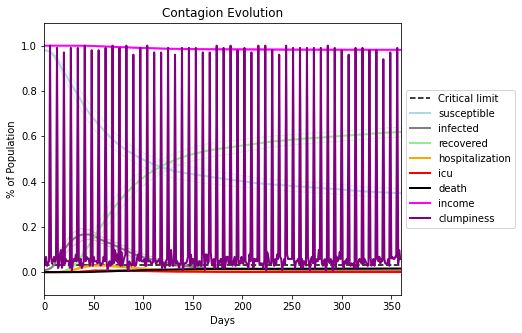

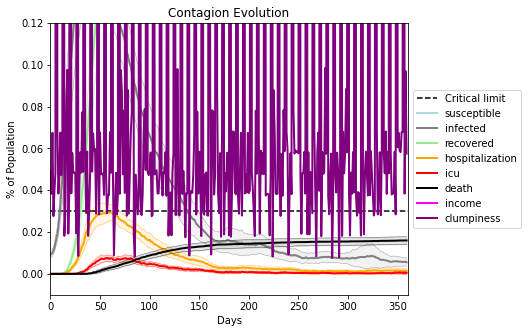

In [10]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[5138, 1279, 4650, 7513, 1286, 9905, 1662, 9885, 2027, 8835, 3811, 4630, 4972, 6169, 9133, 9945, 6139, 8131, 2998, 4267, 450, 4411, 3366, 7114, 9616, 7458, 3888, 9004, 4488, 823]
Average similarity between family members is 0.9807616934649841 at temperature -0.999
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset 

Average similarity between family and home is 0.9923887786375517 at temperature -1
Average similarity between students and their classroom is 0.7525842667235169 at temperature -0.999
Average similarity between workers is 0.7543241050866945 at temperature -0.999
Average friend similarity for adults: 0.9727167630005292 for kids: 0.965579022805653
run with seed 5138:
avg restaurant similarity 0.4082991214117529
avg restaurant similarity 0.33667133755416406
avg restaurant similarity 0.31666631172831894
avg restaurant similarity 0.3766941432595094
avg restaurant similarity 0.42566950284017074
avg restaurant similarity 0.3855680143679317
avg restaurant similarity 0.38112693689248867
avg restaurant similarity 0.37789308356210544
avg restaurant similarity 0.5126349355084084
avg restaurant similarity 0.41577279520135607
avg restaurant similarity 0.3487285964016065
avg restaurant similarity 0.42895030475817264
avg restaurant similarity 0.2662943110016137
avg restaurant similarity 0.3539250066430

avg restaurant similarity 0.3666802831295842
avg restaurant similarity 0.24020372973681564
avg restaurant similarity 0.3179500387837952
avg restaurant similarity 0.3415173071666205
avg restaurant similarity 0.3685756270763903
avg restaurant similarity 0.5172580703013929
avg restaurant similarity 0.4739306675897536
avg restaurant similarity 0.20013993447172823
avg restaurant similarity 0.4329760234038347
avg restaurant similarity 0.41894201003772885
avg restaurant similarity 0.44930635823971915
avg restaurant similarity 0.3864956903946085
avg restaurant similarity 0.4774917660213078
avg restaurant similarity 0.4639361825621009
avg restaurant similarity 0.32261153279365884
avg restaurant similarity 0.40341603317247526
avg restaurant similarity 0.35495550398080605
avg restaurant similarity 0.3109230462582846
avg restaurant similarity 0.36097821363685106
avg restaurant similarity 0.44436165194617927
avg restaurant similarity 0.43435125771975486
avg restaurant similarity 0.38505524655768647

tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 62
tup_vec1 not in keepset of

avg restaurant similarity 0.20533005278219685
avg restaurant similarity 0.04881655296506261
avg restaurant similarity 0.0776629166721402
avg restaurant similarity 0.08494261273070111
avg restaurant similarity 0.19336922490336944
avg restaurant similarity 0.1844868371870439
avg restaurant similarity 0.18896695410025233
avg restaurant similarity -0.013131065107014879
avg restaurant similarity 0.20540351130017126
avg restaurant similarity 0.16584995219384846
avg restaurant similarity 0.22671098769293835
avg restaurant similarity 0.1639748974271805
avg restaurant similarity 0.1805820273110881
avg restaurant similarity 0.19501198137452985
avg restaurant similarity 0.08551910342702385
avg restaurant similarity 0.21197620799823277
avg restaurant similarity 0.1814983792335714
avg restaurant similarity 0.2892021083634928
avg restaurant similarity 0.23293424820534175
avg restaurant similarity 0.09469707762216728
avg restaurant similarity 0.07537253063221715
avg restaurant similarity 0.1265005789

avg restaurant similarity 0.08770597342678185
avg restaurant similarity 0.1543403324560792
avg restaurant similarity 0.1785473454659306
avg restaurant similarity 0.07130706269455694
avg restaurant similarity 0.21516525160136987
avg restaurant similarity 0.12283460152605187
avg restaurant similarity 0.1736380836353044
avg restaurant similarity 0.16335624215499525
avg restaurant similarity 0.18337803343967596
avg restaurant similarity 0.07940416360604066
avg restaurant similarity 0.12045466798534321
avg restaurant similarity 0.1612565877746558
avg restaurant similarity 0.2111559257864654
avg restaurant similarity 0.1122974185210105
avg restaurant similarity 0.24616410395602603
avg restaurant similarity 0.19312435678918247
avg restaurant similarity 0.096620998239186
avg restaurant similarity 0.12005789764350701
avg restaurant similarity 0.215084633644786
avg restaurant similarity 0.16205449156559626
avg restaurant similarity 0.078628135268181
avg restaurant similarity 0.18439915981066707


tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset o

avg restaurant similarity 0.22577186673304153
avg restaurant similarity 0.27744454874273566
avg restaurant similarity 0.15909219132481375
avg restaurant similarity 0.3535852627527341
avg restaurant similarity 0.26978861401787163
avg restaurant similarity 0.4183219178236609
avg restaurant similarity 0.41528107080063725
avg restaurant similarity 0.2891183039997623
avg restaurant similarity 0.39063576624717244
avg restaurant similarity 0.3780296416037815
avg restaurant similarity 0.22963209280306188
avg restaurant similarity 0.3326289986603788
avg restaurant similarity 0.33192663501410535
avg restaurant similarity 0.2969751916371074
avg restaurant similarity 0.29418525863378975
avg restaurant similarity 0.1840625493323775
avg restaurant similarity 0.3787963498325154
avg restaurant similarity 0.17175544521919855
avg restaurant similarity 0.34948367431788036
avg restaurant similarity 0.323919488880806
avg restaurant similarity 0.3011646803157528
avg restaurant similarity 0.3439410779365935


Average similarity between family members is 0.9777944033548767 at temperature -0.999
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 76
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 62
tup_vec1 

avg restaurant similarity 0.22409931769589297
avg restaurant similarity 0.445620753494278
avg restaurant similarity 0.3505270637208879
avg restaurant similarity 0.34146783101007433
avg restaurant similarity 0.2980568411224551
avg restaurant similarity 0.3213649148962439
avg restaurant similarity 0.3556386703560876
avg restaurant similarity 0.27541738556822987
avg restaurant similarity 0.38954140527508807
avg restaurant similarity 0.3839369000063122
avg restaurant similarity 0.3019137432666322
avg restaurant similarity 0.23534210403625386
avg restaurant similarity 0.32846570872194214
avg restaurant similarity 0.28917613774125556
avg restaurant similarity 0.33446892390781324
avg restaurant similarity 0.38061507768062947
avg restaurant similarity 0.29289945031195447
avg restaurant similarity 0.31720562749453196
avg restaurant similarity 0.2738493454461657
avg restaurant similarity 0.2583102212809998
avg restaurant similarity 0.31839955272789616
avg restaurant similarity 0.3095977259966331

avg restaurant similarity 0.5049592396361301
avg restaurant similarity 0.2997374300856152
avg restaurant similarity 0.3409577470915216
avg restaurant similarity 0.365698625431888
avg restaurant similarity 0.24400367997087152
avg restaurant similarity 0.3634899824815901
avg restaurant similarity 0.37975272527481563
avg restaurant similarity 0.38136675981217194
avg restaurant similarity 0.204150953778036
avg restaurant similarity 0.3192015662142846
avg restaurant similarity 0.36954921769946725
avg restaurant similarity 0.3229966653046986
avg restaurant similarity 0.28510246290532215
avg restaurant similarity 0.3411845033214049
avg restaurant similarity 0.28848600733580554
avg restaurant similarity 0.36658562379261733
avg restaurant similarity 0.3769032848242976
avg restaurant similarity 0.30921599319079307
avg restaurant similarity 0.32863484000043275
avg restaurant similarity 0.335136027067205
avg restaurant similarity 0.3534422099436546
avg restaurant similarity 0.3253237435934887
avg 

tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset 

avg restaurant similarity 0.3736494688344106
avg restaurant similarity 0.4464151556775136
avg restaurant similarity 0.48163780995927663
avg restaurant similarity 0.3086442137846991
avg restaurant similarity 0.42687773817189995
avg restaurant similarity 0.34245486186904084
avg restaurant similarity 0.21516541274020373
avg restaurant similarity 0.29328551774698763
avg restaurant similarity 0.29731752222706115
avg restaurant similarity 0.28472826779568006
avg restaurant similarity 0.30055165699714514
avg restaurant similarity 0.47050925161837676
avg restaurant similarity 0.26558816824619413
avg restaurant similarity 0.3691772801860814
avg restaurant similarity 0.2921739917956582
avg restaurant similarity 0.15700563733452416
avg restaurant similarity 0.29839863327248595
avg restaurant similarity 0.32162183698595687
avg restaurant similarity 0.4544226993165583
avg restaurant similarity 0.36778122889410747
avg restaurant similarity 0.3820092059039541
avg restaurant similarity 0.4115721082717

avg restaurant similarity 0.31403443460698194
avg restaurant similarity 0.23149634229682073
avg restaurant similarity 0.43617481956849574
avg restaurant similarity 0.17621154933494976
avg restaurant similarity 0.31047136499697686
avg restaurant similarity 0.20834202635484533
avg restaurant similarity 0.1817081896712342
avg restaurant similarity 0.3123760601771118
avg restaurant similarity 0.2590829560947124
avg restaurant similarity 0.37675001337003927
avg restaurant similarity 0.49491654311337624
avg restaurant similarity 0.3479611503999704
avg restaurant similarity 0.3134822718249214
avg restaurant similarity 0.27184245228045373
avg restaurant similarity 0.374394506568274
avg restaurant similarity 0.2897020384771679
avg restaurant similarity 0.22506955061732
avg restaurant similarity 0.3528200710814257
avg restaurant similarity 0.32560792722280585
avg restaurant similarity 0.3889115323555531
avg restaurant similarity 0.4191537673182956
avg restaurant similarity 0.3542524172806329
avg

tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of

avg restaurant similarity 0.19311814847525086
avg restaurant similarity 0.19954630430570608
avg restaurant similarity 0.21873595666306533
avg restaurant similarity 0.1874724804458804
avg restaurant similarity 0.17936705818053417
avg restaurant similarity 0.2982714598893545
avg restaurant similarity 0.09515072583155193
avg restaurant similarity 0.20076828651936396
avg restaurant similarity 0.17465148676064302
avg restaurant similarity 0.2089707607992215
avg restaurant similarity 0.22404323365476236
avg restaurant similarity 0.0937116744252514
avg restaurant similarity 0.15399691003126328
avg restaurant similarity 0.3520783733908896
avg restaurant similarity 0.20821581174498766
avg restaurant similarity 0.10683680782012311
avg restaurant similarity 0.09305661182786078
avg restaurant similarity 0.18720988473411163
avg restaurant similarity 0.15147322531175197
avg restaurant similarity 0.24853522320729593
avg restaurant similarity 0.17439372197896036
avg restaurant similarity 0.18502298516

tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 80
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset 

avg restaurant similarity 0.38933827336860183
avg restaurant similarity 0.2339989095573094
avg restaurant similarity 0.24180725919488122
avg restaurant similarity 0.33987730938003274
avg restaurant similarity 0.3825822313739663
avg restaurant similarity 0.4082853643193311
avg restaurant similarity 0.42392996772813674
avg restaurant similarity 0.3631217490157829
avg restaurant similarity 0.47447079961354444
avg restaurant similarity 0.43285732257664583
avg restaurant similarity 0.3541095943606959
avg restaurant similarity 0.3689822851432281
avg restaurant similarity 0.409965116030609
avg restaurant similarity 0.40740260669827183
avg restaurant similarity 0.37441643551817866
avg restaurant similarity 0.30984908418293405
avg restaurant similarity 0.2921852608185326
avg restaurant similarity 0.4125418291004821
avg restaurant similarity 0.40023532766981157
avg restaurant similarity 0.4008297136651393
avg restaurant similarity 0.4956888806819856
avg restaurant similarity 0.4132563743850699
a

avg restaurant similarity 0.24163953746998823
avg restaurant similarity 0.27066979764659205
avg restaurant similarity 0.35726104885804777
avg restaurant similarity 0.3389268271644914
avg restaurant similarity 0.2783592924045382
avg restaurant similarity 0.3709516248293929
avg restaurant similarity 0.412654012502626
avg restaurant similarity 0.3094234640535035
avg restaurant similarity 0.31273294279263925
avg restaurant similarity 0.31306965569956696
avg restaurant similarity 0.3599603936715049
avg restaurant similarity 0.4969836312870528
avg restaurant similarity 0.3529915833453412
avg restaurant similarity 0.28703089563663015
avg restaurant similarity 0.48377112913673725
avg restaurant similarity 0.43499815539791886
avg restaurant similarity 0.44475550666238994
avg restaurant similarity 0.2887430477934069
avg restaurant similarity 0.2958816611680966
avg restaurant similarity 0.30107536713783795
avg restaurant similarity 0.381715110533868
avg restaurant similarity 0.3035772362290051
av

tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 62
tup_vec1 not in keepset o

avg restaurant similarity 0.33273135372738755
avg restaurant similarity 0.4957655045983731
avg restaurant similarity 0.20215367727520556
avg restaurant similarity 0.2862998331855626
avg restaurant similarity 0.32562714635434237
avg restaurant similarity 0.5325892913072214
avg restaurant similarity 0.27143372707266644
avg restaurant similarity 0.30326243949504056
avg restaurant similarity 0.3552188800077236
avg restaurant similarity 0.5617439376741533
avg restaurant similarity 0.412523583780305
avg restaurant similarity 0.17299322386208724
avg restaurant similarity 0.44957533420654966
avg restaurant similarity 0.22838531463742012
avg restaurant similarity 0.22901089665144378
avg restaurant similarity 0.22359711271776841
avg restaurant similarity 0.2856975108770108
avg restaurant similarity 0.2474503083032608
avg restaurant similarity 0.46183856380895455
avg restaurant similarity 0.2908113963447948
avg restaurant similarity 0.47333113896881657
avg restaurant similarity 0.0791846708275417

avg restaurant similarity 0.2010251093489785
avg restaurant similarity 0.22679457959157742
avg restaurant similarity 0.17213251050835213
avg restaurant similarity 0.2916866900673535
avg restaurant similarity 0.34802265048137193
avg restaurant similarity 0.2782610403654203
avg restaurant similarity 0.22902506352680496
avg restaurant similarity 0.33124116999960684
avg restaurant similarity 0.29752152219029226
avg restaurant similarity 0.22053768655026637
avg restaurant similarity 0.13141009181286137
avg restaurant similarity 0.3872139772183634
avg restaurant similarity 0.2343059478755359
avg restaurant similarity 0.2615643445452141
avg restaurant similarity 0.24845039912261346
avg restaurant similarity 0.3475654924718966
avg restaurant similarity 0.10856730149306128
avg restaurant similarity 0.33423013557840714
avg restaurant similarity 0.14734142383171595
avg restaurant similarity 0.2280029026564421
avg restaurant similarity 0.3370833935324607
avg restaurant similarity 0.448360341692909

tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of

avg restaurant similarity 0.28314481789176493
avg restaurant similarity 0.34729760338700616
avg restaurant similarity 0.29880844804361456
avg restaurant similarity 0.41105417871364686
avg restaurant similarity 0.3711514756396668
avg restaurant similarity 0.30813924101504897
avg restaurant similarity 0.3192111180100495
avg restaurant similarity 0.1718077252696133
avg restaurant similarity 0.40689503964299323
avg restaurant similarity 0.28266668966135705
avg restaurant similarity 0.35304843586360257
avg restaurant similarity 0.29372948063078036
avg restaurant similarity 0.4578955507615935
avg restaurant similarity 0.2954771980092616
avg restaurant similarity 0.4997289895219916
avg restaurant similarity 0.39193486284279877
avg restaurant similarity 0.30253541682551566
avg restaurant similarity 0.44665019234132897
avg restaurant similarity 0.3334600312614485
avg restaurant similarity 0.37567554351449145
avg restaurant similarity 0.40490034109354317
avg restaurant similarity 0.2642708865317

tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 81
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of

avg restaurant similarity 0.3327125435281481
avg restaurant similarity 0.4326388030804417
avg restaurant similarity 0.437164469306595
avg restaurant similarity 0.3461144491586113
avg restaurant similarity 0.37719203273868923
avg restaurant similarity 0.49154412395400054
avg restaurant similarity 0.39331745299410065
avg restaurant similarity 0.3789617410416714
avg restaurant similarity 0.3514325167396893
avg restaurant similarity 0.44968256254098066
avg restaurant similarity 0.4363691124787632
avg restaurant similarity 0.37213000898678833
avg restaurant similarity 0.6191122485515896
avg restaurant similarity 0.5209221962593907
avg restaurant similarity 0.4473745790755154
avg restaurant similarity 0.36846394396743537
avg restaurant similarity 0.4436884706472377
avg restaurant similarity 0.31887949053938397
avg restaurant similarity 0.39315805128179543
avg restaurant similarity 0.39565539416574885
avg restaurant similarity 0.44610873137055057
avg restaurant similarity 0.4410265745410879
a

avg restaurant similarity 0.48171048250866144
avg restaurant similarity 0.43331057665038575
avg restaurant similarity 0.384627654344179
avg restaurant similarity 0.3636268112036177
avg restaurant similarity 0.32242429276090584
avg restaurant similarity 0.2899898211816102
avg restaurant similarity 0.3975912780276918
avg restaurant similarity 0.286378371283742
avg restaurant similarity 0.35173195560476345
avg restaurant similarity 0.4454846992455109
avg restaurant similarity 0.3677050972963098
avg restaurant similarity 0.35527247022095376
avg restaurant similarity 0.437115433219758
avg restaurant similarity 0.3338533211033023
avg restaurant similarity 0.41561699005267644
avg restaurant similarity 0.4690188692189125
avg restaurant similarity 0.41901840318355055
avg restaurant similarity 0.38902393193781426
avg restaurant similarity 0.38506545511913115
avg restaurant similarity 0.3791934469977002
avg restaurant similarity 0.44027035156054783
avg restaurant similarity 0.409419917911057
avg 

tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of 

avg restaurant similarity 0.47976062952101783
avg restaurant similarity 0.36303713927737447
avg restaurant similarity 0.34789362214614933
avg restaurant similarity 0.3125374684534941
avg restaurant similarity 0.46707697883966953
avg restaurant similarity 0.39296233103781536
avg restaurant similarity 0.389611120725701
avg restaurant similarity 0.4415230238897742
avg restaurant similarity 0.4544466654144532
avg restaurant similarity 0.3591407907472916
avg restaurant similarity 0.582241273060496
avg restaurant similarity 0.4493986577377944
avg restaurant similarity 0.5989312218955217
avg restaurant similarity 0.24546681692916492
avg restaurant similarity 0.27089429290430617
avg restaurant similarity 0.4365245480795525
avg restaurant similarity 0.3920765600474834
avg restaurant similarity 0.307019867866925
avg restaurant similarity 0.4439220787480076
avg restaurant similarity 0.4116549697809481
avg restaurant similarity 0.35112362572604094
avg restaurant similarity 0.421614665091336
avg re

avg restaurant similarity 0.24901428090422673
avg restaurant similarity 0.3504324209659914
avg restaurant similarity 0.3897684112887003
avg restaurant similarity 0.2859307004500077
avg restaurant similarity 0.3337011111415286
avg restaurant similarity 0.3106008546937789
avg restaurant similarity 0.38065929746980925
avg restaurant similarity 0.23392263194883364
avg restaurant similarity 0.3268528124496752
avg restaurant similarity 0.466031055120792
avg restaurant similarity 0.2566382937625295
avg restaurant similarity 0.2837763505671904
avg restaurant similarity 0.4931810030811484
avg restaurant similarity 0.29208339541305317
avg restaurant similarity 0.45194428564726613
avg restaurant similarity 0.32414293990661114
avg restaurant similarity 0.37252562146309953
avg restaurant similarity 0.32253572173692113
avg restaurant similarity 0.387190819176919
avg restaurant similarity 0.43622908627275225
avg restaurant similarity 0.521285104534459
avg restaurant similarity 0.23895601978255404
avg

tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
Average similarity between family and home is 0.9910228515962115 at temperature -1
Average similarity between students and their classroom is 0.7212548546685401 at t

avg restaurant similarity 0.3485604896430714
avg restaurant similarity 0.38745410517815115
avg restaurant similarity 0.33796833859132974
avg restaurant similarity 0.3747232650626558
avg restaurant similarity 0.33406475815885456
avg restaurant similarity 0.3633199111433542
avg restaurant similarity 0.2804430706194571
avg restaurant similarity 0.2582480393418844
avg restaurant similarity 0.2192207459876663
avg restaurant similarity 0.2676647359400621
avg restaurant similarity 0.30410761142106335
avg restaurant similarity 0.2685798105046819
avg restaurant similarity 0.3554251481801432
avg restaurant similarity 0.37785943864342936
avg restaurant similarity 0.3129341197199178
avg restaurant similarity 0.19408331385725766
avg restaurant similarity 0.4252590156324841
avg restaurant similarity 0.1815129772484871
avg restaurant similarity 0.37312638764077133
avg restaurant similarity 0.31524881016578965
avg restaurant similarity 0.24194577315543608
avg restaurant similarity 0.29590960228040597


tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset o

avg restaurant similarity 0.25450196062267305
avg restaurant similarity 0.22280923792400703
avg restaurant similarity 0.1739171567754788
avg restaurant similarity 0.20248781484627668
avg restaurant similarity 0.17961581465151566
avg restaurant similarity 0.2512947957329138
avg restaurant similarity 0.3243116768795761
avg restaurant similarity -0.03800607498596927
avg restaurant similarity 0.09914007588972841
avg restaurant similarity 0.26159151252845425
avg restaurant similarity 0.17540763938577153
avg restaurant similarity 0.19409169423848316
avg restaurant similarity 0.06745476005260602
avg restaurant similarity 0.16584743271440697
avg restaurant similarity 0.12280174674556117
avg restaurant similarity 0.26645962070430146
avg restaurant similarity 0.2908541026664734
avg restaurant similarity 0.44563528329768715
avg restaurant similarity 0.34100200004156933
avg restaurant similarity 0.3134239049410192
avg restaurant similarity -0.032562247889496784
avg restaurant similarity 0.10765072

avg restaurant similarity 0.10946026180927658
avg restaurant similarity 0.2720456230347031
avg restaurant similarity 0.16854762005205828
avg restaurant similarity 0.21981588559932225
avg restaurant similarity 0.2632318552625207
avg restaurant similarity 0.16663664609574394
avg restaurant similarity 0.34733529650196404
avg restaurant similarity 0.2674051328190598
avg restaurant similarity 0.22043550261134892
avg restaurant similarity 0.10020780469405827
avg restaurant similarity 0.15539281542202057
avg restaurant similarity 0.21984224603041483
avg restaurant similarity 0.2642235933471233
avg restaurant similarity 0.21380555662609688
avg restaurant similarity 0.059073525795994175
avg restaurant similarity 0.2000927256659973
avg restaurant similarity -0.012434724293579322
avg restaurant similarity -0.03826464071821198
avg restaurant similarity 0.17785015985347696
avg restaurant similarity 0.153131748536846
avg restaurant similarity 0.08796147680673878
avg restaurant similarity 0.128941558

tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of

avg restaurant similarity 0.264816808933995
avg restaurant similarity 0.294091503925333
avg restaurant similarity 0.23210942961640166
avg restaurant similarity 0.12703166973413932
avg restaurant similarity 0.3117221285199287
avg restaurant similarity 0.1338400127163407
avg restaurant similarity 0.27346251027692836
avg restaurant similarity 0.11287475826494138
avg restaurant similarity 0.21511814246032396
avg restaurant similarity 0.22768460660430292
avg restaurant similarity 0.3203848692200186
avg restaurant similarity 0.21605528261487295
avg restaurant similarity 0.21187807211804144
avg restaurant similarity 0.20754874774282187
avg restaurant similarity 0.2857482079541055
avg restaurant similarity 0.1747851708966662
avg restaurant similarity 0.08502435670209897
avg restaurant similarity 0.03668119103898827
avg restaurant similarity 0.14541804456686955
avg restaurant similarity 0.22354954880519712
avg restaurant similarity 0.12706859127895978
avg restaurant similarity 0.213235879092719

avg restaurant similarity 0.23773065739196636
avg restaurant similarity 0.1403695111137639
avg restaurant similarity 0.31899121351951887
avg restaurant similarity 0.12742518964606095
avg restaurant similarity 0.15523378777296917
avg restaurant similarity 0.25682396028625804
avg restaurant similarity 0.250609451333453
avg restaurant similarity 0.3436482557498023
avg restaurant similarity 0.12227777231593695
avg restaurant similarity 0.146808285590354
avg restaurant similarity 0.15437833327042008
avg restaurant similarity 0.317999318358654
avg restaurant similarity 0.164385344624158
avg restaurant similarity 0.2786475324571375
avg restaurant similarity 0.26810668309686136
avg restaurant similarity 0.08882162748941333
avg restaurant similarity 0.24559832981281352
avg restaurant similarity 0.1787026895465243
avg restaurant similarity 0.16885102839914923
Average similarity between family members is 0.9813008032614622 at temperature -0.999
tup_vec1 not in keepset of size 64
tup_vec1 not in k

Average similarity between family and home is 0.9922798196799334 at temperature -1
Average similarity between students and their classroom is 0.5685512998771022 at temperature -0.999
Average similarity between workers is 0.8251847325559969 at temperature -0.999
Average friend similarity for adults: 0.9784098652086184 for kids: 0.9587605888635333
run with seed 9133:
avg restaurant similarity 0.420430088064526
avg restaurant similarity 0.2985399005644829
avg restaurant similarity 0.48755797559620007
avg restaurant similarity 0.4775249018877842
avg restaurant similarity 0.25450683568302984
avg restaurant similarity 0.3375044395227249
avg restaurant similarity 0.3351516646284167
avg restaurant similarity 0.304992987691472
avg restaurant similarity 0.40681577913823974
avg restaurant similarity 0.3861497635752155
avg restaurant similarity 0.2896606559853285
avg restaurant similarity 0.2701490532905308
avg restaurant similarity 0.3808693956474489
avg restaurant similarity 0.4743276225415201
a

avg restaurant similarity 0.40662436589763623
avg restaurant similarity 0.1654785635472471
avg restaurant similarity 0.5377253933978434
avg restaurant similarity 0.3184116531966985
avg restaurant similarity 0.4347152894019418
avg restaurant similarity 0.3458977391749174
avg restaurant similarity 0.4085966944667204
avg restaurant similarity 0.36675656806863005
avg restaurant similarity 0.3478139737873586
avg restaurant similarity 0.3547629035927142
avg restaurant similarity 0.28928709999772023
avg restaurant similarity 0.28179408586039517
avg restaurant similarity 0.3199346257911129
avg restaurant similarity 0.32175988066040917
avg restaurant similarity 0.37332805525313895
avg restaurant similarity 0.3979916427479512
avg restaurant similarity 0.4130912367316774
avg restaurant similarity 0.31067270376089906
avg restaurant similarity 0.35949448627107705
avg restaurant similarity 0.3199227261888793
avg restaurant similarity 0.25259030008895644
avg restaurant similarity 0.4155366064561738
a

tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset o

avg restaurant similarity 0.4111596295363886
avg restaurant similarity 0.46692704953116443
avg restaurant similarity 0.545056373913603
avg restaurant similarity 0.5825855909508186
avg restaurant similarity 0.4205113813186982
avg restaurant similarity 0.554882583481151
avg restaurant similarity 0.4867731370344268
avg restaurant similarity 0.645828866019812
avg restaurant similarity 0.37362147948650243
avg restaurant similarity 0.5210311377737311
avg restaurant similarity 0.5200317237700565
avg restaurant similarity 0.40150698727076983
avg restaurant similarity 0.43802343187610704
avg restaurant similarity 0.48722160020389116
avg restaurant similarity 0.4188399352459569
avg restaurant similarity 0.41778370823826144
avg restaurant similarity 0.47805348081955096
avg restaurant similarity 0.49179607831398814
avg restaurant similarity 0.4033674132167548
avg restaurant similarity 0.498866868164901
avg restaurant similarity 0.43918927002824215
avg restaurant similarity 0.4314378484903204
avg r

avg restaurant similarity 0.44659930248036345
avg restaurant similarity 0.5439029826421474
avg restaurant similarity 0.4318864684838165
avg restaurant similarity 0.4747577711749029
avg restaurant similarity 0.2986515248212527
avg restaurant similarity 0.4654664822294149
avg restaurant similarity 0.3763082792967757
avg restaurant similarity 0.41818144111137756
avg restaurant similarity 0.4255410794403078
avg restaurant similarity 0.45009226355364657
avg restaurant similarity 0.4934726373292646
avg restaurant similarity 0.5007454360863031
avg restaurant similarity 0.3667409544438038
avg restaurant similarity 0.4511779879918149
avg restaurant similarity 0.5607186109647385
avg restaurant similarity 0.49234472692173675
avg restaurant similarity 0.46049186090338656
avg restaurant similarity 0.35762478053497015
avg restaurant similarity 0.4922118470679333
avg restaurant similarity 0.4379430554397909
avg restaurant similarity 0.5561479193083634
avg restaurant similarity 0.5140163887074536
avg 

tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of 

avg restaurant similarity 0.18978249510464412
avg restaurant similarity 0.14275498724042757
avg restaurant similarity 0.3000157062882356
avg restaurant similarity 0.24694217568612592
avg restaurant similarity 0.3441865922699282
avg restaurant similarity 0.059204469141697094
avg restaurant similarity 0.25134773146272976
avg restaurant similarity 0.1925631441905742
avg restaurant similarity 0.27629981832666367
avg restaurant similarity 0.3847256620897491
avg restaurant similarity 0.16953416303219404
avg restaurant similarity 0.3400507109115937
avg restaurant similarity 0.19781114476498812
avg restaurant similarity 0.28863388952963126
avg restaurant similarity 0.23083074885639152
avg restaurant similarity 0.3492060065259174
avg restaurant similarity 0.19447718322102348
avg restaurant similarity 0.0865689854144151
avg restaurant similarity 0.34902992063592253
avg restaurant similarity 0.35461332383084393
avg restaurant similarity 0.27684143331585576
avg restaurant similarity 0.280962399040

avg restaurant similarity 0.17243216152432403
avg restaurant similarity 0.2873332440064653
avg restaurant similarity 0.15021593301395833
avg restaurant similarity 0.33187958625473357
avg restaurant similarity 0.21927808946709298
avg restaurant similarity 0.2914537766736944
avg restaurant similarity 0.18255821388949586
avg restaurant similarity 0.11498140933415692
avg restaurant similarity 0.18093120176132557
Average similarity between family members is 0.9817086571829826 at temperature -0.999
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not i

Average similarity between family and home is 0.991196544598257 at temperature -1
Average similarity between students and their classroom is 0.61218672945453 at temperature -0.999
Average similarity between workers is 0.8169380548940606 at temperature -0.999
Average friend similarity for adults: 0.973539917811013 for kids: 0.9602437311607861
run with seed 8131:
avg restaurant similarity 0.5485951577740795
avg restaurant similarity 0.40608911983737006
avg restaurant similarity 0.42701330130011583
avg restaurant similarity 0.46013619941445194
avg restaurant similarity 0.36525865025674015
avg restaurant similarity 0.4495063626301637
avg restaurant similarity 0.4736442550859668
avg restaurant similarity 0.6101867035598172
avg restaurant similarity 0.42600831564241354
avg restaurant similarity 0.42975588834305534
avg restaurant similarity 0.505573988860675
avg restaurant similarity 0.4125049264566728
avg restaurant similarity 0.46345070922610465
avg restaurant similarity 0.5620999201947232


avg restaurant similarity 0.46611286273197516
avg restaurant similarity 0.4275841815123979
avg restaurant similarity 0.4201837296889946
avg restaurant similarity 0.3035987896883459
avg restaurant similarity 0.5573308212041526
avg restaurant similarity 0.41328612110868396
avg restaurant similarity 0.32606281335637266
avg restaurant similarity 0.4000353363274142
avg restaurant similarity 0.44443656203231724
avg restaurant similarity 0.43667041313117977
avg restaurant similarity 0.5720218184825173
avg restaurant similarity 0.4379757226079596
avg restaurant similarity 0.4951431110455454
avg restaurant similarity 0.3968085569366476
avg restaurant similarity 0.3630958682573813
avg restaurant similarity 0.4270202596200382
avg restaurant similarity 0.5160059599639633
avg restaurant similarity 0.49005270064701945
avg restaurant similarity 0.3808338441675377
avg restaurant similarity 0.5093732524886427
avg restaurant similarity 0.44542691466435247
avg restaurant similarity 0.5772261408861603
avg

tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset o

avg restaurant similarity 0.43996398121748315
avg restaurant similarity 0.3108011170192065
avg restaurant similarity 0.3776610848395402
avg restaurant similarity 0.3604915478443026
avg restaurant similarity 0.2997701263444533
avg restaurant similarity 0.5464055374796845
avg restaurant similarity 0.361181825044851
avg restaurant similarity 0.19084582996288532
avg restaurant similarity 0.40636349927714893
avg restaurant similarity 0.5353280856807141
avg restaurant similarity 0.43444977798973655
avg restaurant similarity 0.20608655259657638
avg restaurant similarity 0.4046818489221904
avg restaurant similarity 0.2521498655630313
avg restaurant similarity 0.3362048046539995
avg restaurant similarity 0.3940104914951887
avg restaurant similarity 0.32834576730836673
avg restaurant similarity 0.3406348614914063
avg restaurant similarity 0.4527112454318957
avg restaurant similarity 0.4211171516498504
avg restaurant similarity 0.15184125234288132
avg restaurant similarity 0.3236811909447354
avg 

avg restaurant similarity 0.30913055220486507
avg restaurant similarity 0.4620131765204201
avg restaurant similarity 0.540393681569458
avg restaurant similarity 0.35088206920521214
avg restaurant similarity 0.39125849810396013
avg restaurant similarity 0.3522269945577791
avg restaurant similarity 0.3798503920627027
avg restaurant similarity 0.2255263032253206
avg restaurant similarity 0.29613140079042516
avg restaurant similarity 0.504900115118163
avg restaurant similarity 0.4396874373138186
avg restaurant similarity 0.36053372773152376
avg restaurant similarity 0.18288566037346823
avg restaurant similarity 0.4014166181175721
avg restaurant similarity 0.5060737434895224
avg restaurant similarity 0.37459835542511594
avg restaurant similarity 0.5732182424172018
avg restaurant similarity 0.41966093015700523
avg restaurant similarity 0.31721568416371
avg restaurant similarity 0.43546902145464544
avg restaurant similarity 0.3464235343605144
avg restaurant similarity 0.40092740396971865
avg 

tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of

avg restaurant similarity 0.455206385691993
avg restaurant similarity 0.2669898080468147
avg restaurant similarity 0.359515539485713
avg restaurant similarity 0.047241725385264645
avg restaurant similarity 0.11211528984527057
avg restaurant similarity 0.1645361495616917
avg restaurant similarity 0.2666994178298982
avg restaurant similarity 0.15820400790845807
avg restaurant similarity 0.3530806662226561
avg restaurant similarity 0.20601600696568828
avg restaurant similarity 0.1050186841425767
avg restaurant similarity 0.1923428247505571
avg restaurant similarity 0.26918440050045883
avg restaurant similarity 0.23258731528685805
avg restaurant similarity 0.3212044903819495
avg restaurant similarity 0.08899126712522204
avg restaurant similarity 0.06997427392690468
avg restaurant similarity 0.10418470874411011
avg restaurant similarity 0.13071010645593534
avg restaurant similarity 0.2388536623328708
avg restaurant similarity 0.2291136023806108
avg restaurant similarity 0.33344980305282884


avg restaurant similarity 0.30595312878828745
avg restaurant similarity 0.4339671055579987
avg restaurant similarity 0.21107284078847716
avg restaurant similarity 0.17181623850541292
avg restaurant similarity -0.03652730876332953
avg restaurant similarity 0.1954803342584896
avg restaurant similarity 0.15154152269735074
avg restaurant similarity 0.23008198178524122
avg restaurant similarity 0.107952788157368
avg restaurant similarity 0.27502353187589856
avg restaurant similarity 0.2688429549239533
avg restaurant similarity 0.3239638574295123
avg restaurant similarity 0.2468092593133603
avg restaurant similarity 0.11720669301038733
avg restaurant similarity 0.11075547517907026
avg restaurant similarity 0.24167188602081754
avg restaurant similarity 0.2705612664318319
avg restaurant similarity -0.029738451264566736
avg restaurant similarity 0.19936358787017
avg restaurant similarity 0.14801508732290294
Average similarity between family members is 0.9742685458442027 at temperature -0.999
tu

tup_vec1 not in keepset of size 40
Average similarity between family and home is 0.9921528038308508 at temperature -1
Average similarity between students and their classroom is 0.6462506561788042 at temperature -0.999
Average similarity between workers is 0.7913649976986813 at temperature -0.999
Average friend similarity for adults: 0.9711298448690334 for kids: 0.9648575722490407
run with seed 450:
avg restaurant similarity 0.3354731836799215
avg restaurant similarity 0.30382394151192826
avg restaurant similarity 0.4143309448906792
avg restaurant similarity 0.38217394657317655
avg restaurant similarity 0.33740033521283197
avg restaurant similarity 0.40703367506005733
avg restaurant similarity 0.3887159290355668
avg restaurant similarity 0.3554509281033001
avg restaurant similarity 0.38409106152842176
avg restaurant similarity 0.27557627057696304
avg restaurant similarity 0.3982758778146164
avg restaurant similarity 0.39487474537119105
avg restaurant similarity 0.34031850748281683
avg r

avg restaurant similarity 0.402047908589677
avg restaurant similarity 0.5582824070458555
avg restaurant similarity 0.43158477989935085
avg restaurant similarity 0.3836065362353025
avg restaurant similarity 0.3155542815836024
avg restaurant similarity 0.3569818475130507
avg restaurant similarity 0.3553822903256781
avg restaurant similarity 0.2875734370931623
avg restaurant similarity 0.3030645521647849
avg restaurant similarity 0.3407816691464379
avg restaurant similarity 0.40186723914488864
avg restaurant similarity 0.33070339802569065
avg restaurant similarity 0.35321455852163564
avg restaurant similarity 0.4159035413766855
avg restaurant similarity 0.3706156294339866
avg restaurant similarity 0.3360302360908502
avg restaurant similarity 0.32895867326574735
avg restaurant similarity 0.34071485102825844
avg restaurant similarity 0.3058487241496268
avg restaurant similarity 0.3013800783581736
avg restaurant similarity 0.31813620978225854
avg restaurant similarity 0.4779674825859797
avg 

tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset o

avg restaurant similarity 0.3169582255417404
avg restaurant similarity 0.29742170096453074
avg restaurant similarity 0.2744564136002614
avg restaurant similarity 0.3773991836111628
avg restaurant similarity 0.3514427620479794
avg restaurant similarity 0.2820594334831691
avg restaurant similarity 0.31934334242182
avg restaurant similarity 0.3881342159955088
avg restaurant similarity 0.5311094357890518
avg restaurant similarity 0.3885929384023832
avg restaurant similarity 0.24475979695330202
avg restaurant similarity 0.287525829351754
avg restaurant similarity 0.13818044174392785
avg restaurant similarity 0.2336058331965887
avg restaurant similarity 0.2610389922879505
avg restaurant similarity 0.16157645106369742
avg restaurant similarity 0.38429829623858436
avg restaurant similarity 0.23473425148482152
avg restaurant similarity 0.26364320038607675
avg restaurant similarity 0.45113498890121095
avg restaurant similarity 0.26879710909648796
avg restaurant similarity 0.2933307972246304
avg 

avg restaurant similarity 0.32667919075904944
avg restaurant similarity 0.1697214029311552
avg restaurant similarity 0.24392120112473148
avg restaurant similarity 0.2947242782208371
avg restaurant similarity 0.26666835198461675
avg restaurant similarity 0.14239971848371064
avg restaurant similarity 0.37351758061518114
avg restaurant similarity 0.19434021084524344
avg restaurant similarity 0.28458550289419166
avg restaurant similarity 0.35867089680018416
avg restaurant similarity 0.2529844625563591
avg restaurant similarity 0.2455462675273918
avg restaurant similarity 0.22224954542670983
avg restaurant similarity 0.40787057772738355
avg restaurant similarity 0.34584627345950447
avg restaurant similarity 0.31030491125879456
avg restaurant similarity 0.2903258067576528
avg restaurant similarity 0.24189470933817853
avg restaurant similarity 0.2562894840912092
avg restaurant similarity 0.35122183948496993
avg restaurant similarity 0.3304860989962353
avg restaurant similarity 0.3035304182294

tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of 

avg restaurant similarity 0.5413346465340988
avg restaurant similarity 0.3467131029055199
avg restaurant similarity 0.3411655838582471
avg restaurant similarity 0.42328964386504114
avg restaurant similarity 0.3942204162960516
avg restaurant similarity 0.3878722338254836
avg restaurant similarity 0.33199711464174414
avg restaurant similarity 0.4056496211704022
avg restaurant similarity 0.41975971206315144
avg restaurant similarity 0.312993741573582
avg restaurant similarity 0.43237320382729616
avg restaurant similarity 0.3566051419836797
avg restaurant similarity 0.45433540755600577
avg restaurant similarity 0.42531865092907223
avg restaurant similarity 0.3942197131330742
avg restaurant similarity 0.41111533802476763
avg restaurant similarity 0.4596837516649097
avg restaurant similarity 0.3894843104384348
avg restaurant similarity 0.3827771675709204
avg restaurant similarity 0.45997622236258945
avg restaurant similarity 0.3172159422362485
avg restaurant similarity 0.5003966401027359
avg

avg restaurant similarity 0.4408820317052755
avg restaurant similarity 0.4001288839937048
avg restaurant similarity 0.4988109810084057
avg restaurant similarity 0.24020672327242754
avg restaurant similarity 0.4022812640922116
avg restaurant similarity 0.4370315931744937
avg restaurant similarity 0.40709093559913173
avg restaurant similarity 0.32391123017660606
avg restaurant similarity 0.3865378550416483
avg restaurant similarity 0.2858891507511323
Average similarity between family members is 0.9816926642355764 at temperature -0.999
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 63
tup_vec1

Average similarity between family and home is 0.9909072106126325 at temperature -1
Average similarity between students and their classroom is 0.7219643950252408 at temperature -0.999
Average similarity between workers is 0.7831076636892906 at temperature -0.999
Average friend similarity for adults: 0.968734296080851 for kids: 0.9659701650702553
run with seed 7114:
avg restaurant similarity 0.21670740704784075
avg restaurant similarity 0.21057816660207615
avg restaurant similarity 0.2049468334901342
avg restaurant similarity 0.27759414290864176
avg restaurant similarity 0.19760885115755486
avg restaurant similarity 0.32807570584837176
avg restaurant similarity 0.3037372033465678
avg restaurant similarity 0.1073125603418887
avg restaurant similarity 0.31389841702070737
avg restaurant similarity 0.323288604841338
avg restaurant similarity 0.3232424293568507
avg restaurant similarity 0.2568211824345218
avg restaurant similarity 0.3060902510106908
avg restaurant similarity 0.206993094035515

avg restaurant similarity 0.22774975858217564
avg restaurant similarity 0.2694738065890978
avg restaurant similarity 0.27497118519159286
avg restaurant similarity 0.256648879483318
avg restaurant similarity 0.16698375560376855
avg restaurant similarity 0.17825134273487467
avg restaurant similarity 0.2624287946203384
avg restaurant similarity 0.27970602841778397
avg restaurant similarity 0.32273757496596067
avg restaurant similarity 0.3018661607194402
avg restaurant similarity 0.27375658115418156
avg restaurant similarity 0.1972853057004985
avg restaurant similarity 0.2527054125516709
avg restaurant similarity 0.24085336901315868
avg restaurant similarity 0.23728789588695584
avg restaurant similarity 0.21222208202893614
avg restaurant similarity 0.34190658869372137
avg restaurant similarity 0.1508664170648083
avg restaurant similarity 0.3489550557261697
avg restaurant similarity 0.2792001075847696
avg restaurant similarity 0.3335217968364535
avg restaurant similarity 0.19153978249916254

tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset

avg restaurant similarity 0.3505470630536809
avg restaurant similarity 0.27171355887351595
avg restaurant similarity 0.30817018155710374
avg restaurant similarity 0.3944039752874574
avg restaurant similarity 0.34991555617612685
avg restaurant similarity 0.3499149116951276
avg restaurant similarity 0.35993484331135833
avg restaurant similarity 0.3999594306017692
avg restaurant similarity 0.31581100510402055
avg restaurant similarity 0.49731537655971086
avg restaurant similarity 0.35223894511886283
avg restaurant similarity 0.375133728016977
avg restaurant similarity 0.3559897413556254
avg restaurant similarity 0.37264219523746933
avg restaurant similarity 0.35669139953009854
avg restaurant similarity 0.3676913983237768
avg restaurant similarity 0.2731178374562661
avg restaurant similarity 0.1995262831771359
avg restaurant similarity 0.4499943369390528
avg restaurant similarity 0.3393092984191833
avg restaurant similarity 0.27189586038025315
avg restaurant similarity 0.38274034417110686


avg restaurant similarity 0.381439590764351
avg restaurant similarity 0.44856076221198454
avg restaurant similarity 0.34037513328587543
avg restaurant similarity 0.4213294785986218
avg restaurant similarity 0.3622043782331671
avg restaurant similarity 0.41665333070540395
avg restaurant similarity 0.4722558750398893
avg restaurant similarity 0.42253037190168286
avg restaurant similarity 0.3470053342554676
avg restaurant similarity 0.3326568268432389
avg restaurant similarity 0.3645851500889216
avg restaurant similarity 0.36556490874937336
avg restaurant similarity 0.31491313540849203
avg restaurant similarity 0.42793429824566637
avg restaurant similarity 0.4192353042955256
avg restaurant similarity 0.44515247803281455
avg restaurant similarity 0.31556689459441706
avg restaurant similarity 0.4428153933316202
avg restaurant similarity 0.32198661570854775
avg restaurant similarity 0.34627967431322343
avg restaurant similarity 0.32544691139960774
avg restaurant similarity 0.4025634074502886

tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of

avg restaurant similarity 0.381747117329373
avg restaurant similarity 0.36326584117450156
avg restaurant similarity 0.2163327575718912
avg restaurant similarity 0.07825274136987076
avg restaurant similarity 0.34635447324804874
avg restaurant similarity 0.2563167895785929
avg restaurant similarity 0.32167958361901045
avg restaurant similarity 0.18326533705508777
avg restaurant similarity 0.2629492104332187
avg restaurant similarity 0.3681854278683783
avg restaurant similarity 0.26638716119511824
avg restaurant similarity 0.1578929678940408
avg restaurant similarity 0.2718625878302854
avg restaurant similarity 0.29260422977453193
avg restaurant similarity 0.23946318798017108
avg restaurant similarity 0.23994360849935864
avg restaurant similarity 0.16671683010577007
avg restaurant similarity 0.3774761712823095
avg restaurant similarity 0.13614291595879272
avg restaurant similarity 0.27400356871791154
avg restaurant similarity 0.20024572414905903
avg restaurant similarity 0.130592976562643

avg restaurant similarity 0.29348187791448965
avg restaurant similarity 0.2834230072942228
avg restaurant similarity 0.32337005784200473
avg restaurant similarity 0.32064625807755975
avg restaurant similarity 0.2060250569712731
avg restaurant similarity 0.261751231704292
avg restaurant similarity 0.2984993206095954
avg restaurant similarity 0.4372307509348028
avg restaurant similarity 0.30827227958789166
avg restaurant similarity 0.34627199721486845
avg restaurant similarity 0.28092979333364426
avg restaurant similarity 0.2960810459736524
avg restaurant similarity 0.45582938002590506
avg restaurant similarity 0.14593158806965367
avg restaurant similarity 0.07259946213077749
avg restaurant similarity 0.2671067682918416
avg restaurant similarity 0.20370490054476942
avg restaurant similarity 0.27755168059186336
avg restaurant similarity 0.25913998413022804
avg restaurant similarity 0.15899251996596947
avg restaurant similarity 0.25427301642054095
Average similarity between family members 

Average similarity between family and home is 0.9930195467209024 at temperature -1
Average similarity between students and their classroom is 0.6689749691734979 at temperature -0.999
Average similarity between workers is 0.831026401947663 at temperature -0.999
Average friend similarity for adults: 0.9768110119876354 for kids: 0.9483015432400852
run with seed 3888:
avg restaurant similarity 0.2906751918953063
avg restaurant similarity 0.3917029242504922
avg restaurant similarity 0.27091322708489124
avg restaurant similarity 0.34981518869999334
avg restaurant similarity 0.5528222682609268
avg restaurant similarity 0.43255314318622196
avg restaurant similarity 0.37812593898517344
avg restaurant similarity 0.4045086280807285
avg restaurant similarity 0.506706167789603
avg restaurant similarity 0.4514536689608877
avg restaurant similarity 0.5227600730047367
avg restaurant similarity 0.4597237363308541
avg restaurant similarity 0.33627911067664185
avg restaurant similarity 0.2688221286002464

avg restaurant similarity 0.22429454687135458
avg restaurant similarity 0.3385427264239878
avg restaurant similarity 0.34856309863821383
avg restaurant similarity 0.566389204582709
avg restaurant similarity 0.4878616658744816
avg restaurant similarity 0.36758753014531886
avg restaurant similarity 0.3463719908649616
avg restaurant similarity 0.3371354475383434
avg restaurant similarity 0.44970306140067456
avg restaurant similarity 0.4929552518093118
avg restaurant similarity 0.2834510135432056
avg restaurant similarity 0.44747109077697067
avg restaurant similarity 0.2939845544877125
avg restaurant similarity 0.45430337377974733
avg restaurant similarity 0.35447752346818634
avg restaurant similarity 0.528208720550902
avg restaurant similarity 0.28927958098877465
avg restaurant similarity 0.5838797134207947
avg restaurant similarity 0.453272450972632
avg restaurant similarity 0.3941291731169606
avg restaurant similarity 0.5299211187843229
avg restaurant similarity 0.34711160006393754
avg 

tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset

avg restaurant similarity 0.39056600482559933
avg restaurant similarity 0.24340348294711547
avg restaurant similarity 0.4000052868654461
avg restaurant similarity 0.4213199352044047
avg restaurant similarity 0.34845004170005023
avg restaurant similarity 0.21932694213171652
avg restaurant similarity 0.2656669405157318
avg restaurant similarity 0.23143789548738622
avg restaurant similarity 0.4538935048033087
avg restaurant similarity 0.2881860015670951
avg restaurant similarity 0.2675773685868678
avg restaurant similarity 0.34043676630912606
avg restaurant similarity 0.4423303602843185
avg restaurant similarity 0.29861707011571775
avg restaurant similarity 0.39232951110738384
avg restaurant similarity 0.3366252128047187
avg restaurant similarity 0.3066046791066199
avg restaurant similarity 0.3335746750685102
avg restaurant similarity 0.2382535925546829
avg restaurant similarity 0.43022689911902834
avg restaurant similarity 0.34816038329643156
avg restaurant similarity 0.2778227886141908


avg restaurant similarity 0.3631236121655304
avg restaurant similarity 0.338974189249286
avg restaurant similarity 0.3084140680578397
avg restaurant similarity 0.4063647556502234
avg restaurant similarity 0.2611822431496683
avg restaurant similarity 0.3694112643717512
avg restaurant similarity 0.23424837539296167
avg restaurant similarity 0.3000884513580697
avg restaurant similarity 0.43537644654796004
avg restaurant similarity 0.42769368378401995
avg restaurant similarity 0.3575888535251117
avg restaurant similarity 0.3250968394521979
avg restaurant similarity 0.3514194294171954
avg restaurant similarity 0.31396247019048523
avg restaurant similarity 0.33157650127951055
avg restaurant similarity 0.34530573830139755
avg restaurant similarity 0.45887526146880286
avg restaurant similarity 0.32351688636249837
avg restaurant similarity 0.29093258460753557
avg restaurant similarity 0.3371562550311719
avg restaurant similarity 0.3838693813839692
avg restaurant similarity 0.3638928928362575
av

tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset o

avg restaurant similarity 0.33598832834706926
avg restaurant similarity 0.4406524080560735
avg restaurant similarity 0.5050400766949825
avg restaurant similarity 0.5495374227522762
avg restaurant similarity 0.43416499515998414
avg restaurant similarity 0.4372228567005913
avg restaurant similarity 0.45802452437042107
avg restaurant similarity 0.43389149397445864
avg restaurant similarity 0.39034107310320765
avg restaurant similarity 0.39382266442325736
avg restaurant similarity 0.44000831740606705
avg restaurant similarity 0.4604126076348728
avg restaurant similarity 0.3537542163295893
avg restaurant similarity 0.46412417469811684
avg restaurant similarity 0.4935182117369606
avg restaurant similarity 0.3644543423496155
avg restaurant similarity 0.3259952862319908
avg restaurant similarity 0.41384142445735905
avg restaurant similarity 0.37934123939475484
avg restaurant similarity 0.4169846413293136
avg restaurant similarity 0.49233189525601
avg restaurant similarity 0.388440845960991
avg

avg restaurant similarity 0.437266938014434
avg restaurant similarity 0.47173067214800274
avg restaurant similarity 0.27519210693664525
avg restaurant similarity 0.5295696642570804
avg restaurant similarity 0.4087231395182906
avg restaurant similarity 0.3615042599340161
avg restaurant similarity 0.3592946448168463
avg restaurant similarity 0.31116553214757153
avg restaurant similarity 0.4790112677517464
avg restaurant similarity 0.5145285187154126
avg restaurant similarity 0.5232899121601188
avg restaurant similarity 0.5194199668042069
avg restaurant similarity 0.40113628073244656
avg restaurant similarity 0.2563340997642315
avg restaurant similarity 0.322477926191104
avg restaurant similarity 0.3983130526227546
avg restaurant similarity 0.5129855111505685
avg restaurant similarity 0.5453283322113927
avg restaurant similarity 0.5386339844729909
avg restaurant similarity 0.45593185817833
avg restaurant similarity 0.5381925726831229
avg restaurant similarity 0.242780907447908
avg restaur

Average similarity between family and home is 0.9921652846410309 at temperature -1
Average similarity between students and their classroom is 0.6200537310270624 at temperature -0.999
Average similarity between workers is 0.9132043501116808 at temperature -0.999
Average friend similarity for adults: 0.9797265043129579 for kids: 0.9658183493888414
run with seed 823:
avg restaurant similarity 0.3404870221697782
avg restaurant similarity 0.12226273176575918
avg restaurant similarity 0.31916153618789644
avg restaurant similarity 0.17492807921823897
avg restaurant similarity 0.3192192859581505
avg restaurant similarity 0.15037895948916327
avg restaurant similarity 0.28902773433655704
avg restaurant similarity 0.25484432011395697
avg restaurant similarity 0.34392251159683956
avg restaurant similarity 0.2828674443547108
avg restaurant similarity 0.2987138492298147
avg restaurant similarity 0.318795119677006
avg restaurant similarity 0.3742613234936693
avg restaurant similarity 0.35348929197921

avg restaurant similarity 0.28420738344149454
avg restaurant similarity 0.2622421400843412
avg restaurant similarity 0.31270469534925904
avg restaurant similarity 0.33188027457697844
avg restaurant similarity 0.2560488020758576
avg restaurant similarity 0.2864771126978574
avg restaurant similarity 0.2974839059795482
avg restaurant similarity 0.2079785178702956
avg restaurant similarity 0.2583847432220546
avg restaurant similarity 0.3077292491549037
avg restaurant similarity 0.31710473146372053
avg restaurant similarity 0.2462023910658689
avg restaurant similarity 0.27341192392322156
avg restaurant similarity 0.21683825329871764
avg restaurant similarity 0.27564289341885984
avg restaurant similarity 0.3171573672544444
avg restaurant similarity 0.22196550660094697
avg restaurant similarity 0.18440306787994554
avg restaurant similarity 0.12211871759306812
avg restaurant similarity 0.2856416662782305
avg restaurant similarity 0.24826386810371562
avg restaurant similarity 0.2132648961145588

(<function dict.items>, <function dict.items>, <function dict.items>)

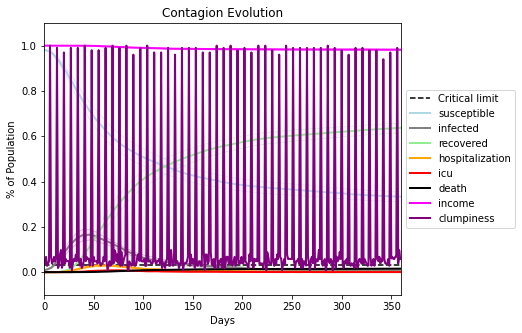

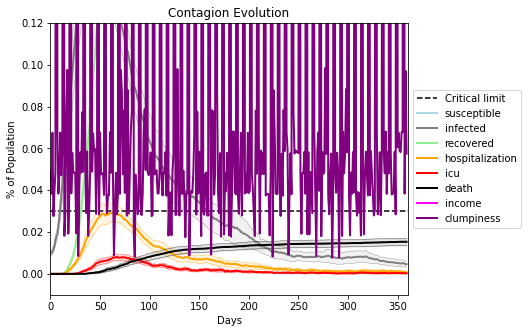

In [11]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[8859, 8752, 585, 3382, 3696, 7895, 3277, 3827, 1368, 7718, 138, 1298, 2697, 9050, 6633, 8704, 5625, 2249, 4592, 9650, 8964, 1898, 1926, 7197, 5948, 2177, 6083, 4286, 2402, 2115]
Average similarity between family members is 0.007846289581941668 at temperature 1
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of si

avg restaurant similarity -0.025332490050441157
avg restaurant similarity 0.09858784091823079
avg restaurant similarity -0.030257686218581256
avg restaurant similarity 0.03959533765304694
avg restaurant similarity -0.0709383145163343
avg restaurant similarity -0.03331724006726259
avg restaurant similarity -0.08544169128799173
avg restaurant similarity 0.0790587388378619
avg restaurant similarity 0.04620240039744216
avg restaurant similarity 0.12132929932549012
avg restaurant similarity 0.03452508128282677
avg restaurant similarity -0.1571115744087543
avg restaurant similarity -0.0020276212675582237
avg restaurant similarity -0.027694369632479617
avg restaurant similarity -0.1002311184150512
avg restaurant similarity 0.023640748160005037
avg restaurant similarity 0.0024553868396664826
avg restaurant similarity -0.08268625993772315
avg restaurant similarity 0.059718753215617607
avg restaurant similarity 0.02939125959872143
avg restaurant similarity -0.07688423652957328
avg restaurant sim

avg restaurant similarity -0.01558447342067477
avg restaurant similarity 0.002030838497502229
avg restaurant similarity -0.04296741276676391
avg restaurant similarity -0.030924087594629977
avg restaurant similarity 0.007197601098799458
avg restaurant similarity 0.12634327317924113
avg restaurant similarity -0.038161517239128834
avg restaurant similarity 0.026730017877335466
avg restaurant similarity -0.2303363508730939
avg restaurant similarity 0.0802734845141802
avg restaurant similarity 0.07920680397088391
avg restaurant similarity 0.18630336204531384
avg restaurant similarity 0.019244592633584846
avg restaurant similarity -0.05044515559883977
avg restaurant similarity 0.08711457621608328
avg restaurant similarity -0.0545750298908118
avg restaurant similarity 0.008541063638923938
avg restaurant similarity -0.06244007994756459
avg restaurant similarity -0.053979422695330716
avg restaurant similarity -0.11742022928438464
avg restaurant similarity -0.06193603875328682
avg restaurant sim

tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset o

avg restaurant similarity 0.14492431040522452
avg restaurant similarity 0.10720985601341533
avg restaurant similarity 0.15305557083732244
avg restaurant similarity 0.14893330238775038
avg restaurant similarity 0.18289687970867785
avg restaurant similarity 0.17405221746072774
avg restaurant similarity 0.13173703543407353
avg restaurant similarity 0.14382371586955736
avg restaurant similarity 0.15525246363228887
avg restaurant similarity 0.15280762009827795
avg restaurant similarity 0.11238835433708347
avg restaurant similarity 0.18464132854539023
avg restaurant similarity 0.12326780694716134
avg restaurant similarity 0.11650078775190864
avg restaurant similarity 0.18501631330326704
avg restaurant similarity 0.22343544274172822
avg restaurant similarity 0.18445896731278197
avg restaurant similarity 0.1590336211568831
avg restaurant similarity 0.20790538901108
avg restaurant similarity 0.14649199414965622
avg restaurant similarity 0.16087200721207265
avg restaurant similarity 0.1034155984

avg restaurant similarity 0.18106629854808665
avg restaurant similarity 0.05250971520469403
avg restaurant similarity 0.1572324949064272
avg restaurant similarity 0.18585828981121533
avg restaurant similarity 0.1545627699781549
avg restaurant similarity 0.18530285635372776
avg restaurant similarity 0.13398612059471005
avg restaurant similarity 0.15820582573060665
avg restaurant similarity 0.1420527355599958
avg restaurant similarity 0.11896898883248917
avg restaurant similarity 0.13453912847061578
avg restaurant similarity 0.21085770597181733
avg restaurant similarity 0.2163728479928685
avg restaurant similarity 0.08711156611655851
avg restaurant similarity 0.16124712714255265
avg restaurant similarity 0.17300966612436797
avg restaurant similarity 0.15013075435378934
avg restaurant similarity 0.1647572791273351
avg restaurant similarity 0.19532988863770734
avg restaurant similarity 0.13323337682603706
avg restaurant similarity 0.17868251954431583
avg restaurant similarity 0.17217800882

tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset o

avg restaurant similarity 0.030442008486751257
avg restaurant similarity 0.037156962935419105
avg restaurant similarity 0.011595853630933958
avg restaurant similarity 0.0013342104017695516
avg restaurant similarity 0.024867791467346596
avg restaurant similarity 0.0005935671041509657
avg restaurant similarity 0.06764080566320428
avg restaurant similarity -0.024391612457610783
avg restaurant similarity 0.010417090782209572
avg restaurant similarity 0.0037752270790292345
avg restaurant similarity 0.015095543000013726
avg restaurant similarity -0.06702166095428287
avg restaurant similarity -0.029419005381658654
avg restaurant similarity -0.05350794255640838
avg restaurant similarity -0.010944369997507917
avg restaurant similarity 0.007967579169239356
avg restaurant similarity 0.018533756160136656
avg restaurant similarity -0.02785286742204696
avg restaurant similarity -0.019757120296828187
avg restaurant similarity 0.0607260251636765
avg restaurant similarity 0.023568454265484033
avg resta

avg restaurant similarity -0.11176006138281908
avg restaurant similarity 0.0005012512605388006
Average similarity between family members is 0.06688531420121006 at temperature 1
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepse

Average friend similarity for adults: 0.11997937372317664 for kids: 0.13455357611770985
run with seed 3382:
avg restaurant similarity 0.08621081013434408
avg restaurant similarity 0.041408795507115265
avg restaurant similarity 0.1340223243892858
avg restaurant similarity 0.1535124728098821
avg restaurant similarity 0.15463890515774073
avg restaurant similarity 0.12694860676889433
avg restaurant similarity 0.06476037503819418
avg restaurant similarity 0.15001999354317436
avg restaurant similarity 0.12716745603937626
avg restaurant similarity 0.14345726579954426
avg restaurant similarity 0.12020561948774533
avg restaurant similarity 0.08873263986027166
avg restaurant similarity 0.2115868860246702
avg restaurant similarity 0.14810199091297693
avg restaurant similarity 0.25157814148741015
avg restaurant similarity -0.035236994965862266
avg restaurant similarity 0.20637035054251662
avg restaurant similarity 0.07779526242407307
avg restaurant similarity 0.05794721051888637
avg restaurant sim

avg restaurant similarity 0.08043668092192509
avg restaurant similarity 0.04037972152833485
avg restaurant similarity 0.10630480017632819
avg restaurant similarity 0.2342223453958902
avg restaurant similarity 0.118505097176684
avg restaurant similarity 0.05798229721852806
avg restaurant similarity 0.11299451438629647
avg restaurant similarity 0.12934131919967584
avg restaurant similarity 0.01678306558181683
avg restaurant similarity 0.19328968108287872
avg restaurant similarity 0.0953029124491336
avg restaurant similarity 0.07315588045495175
avg restaurant similarity 0.11713143719630392
avg restaurant similarity 0.008574581966379238
avg restaurant similarity 0.15429584450966335
avg restaurant similarity 0.15178967544821623
avg restaurant similarity 0.15619887922428144
avg restaurant similarity 0.1679495534384363
avg restaurant similarity 0.057594552820646634
avg restaurant similarity 0.16183346631860554
avg restaurant similarity 0.06693333648011705
avg restaurant similarity 0.096705016

tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset o

avg restaurant similarity 0.159492148256208
avg restaurant similarity 0.15273029498537877
avg restaurant similarity 0.13641627193662398
avg restaurant similarity 0.1106554590801936
avg restaurant similarity 0.0620479065914904
avg restaurant similarity -0.04243117236615809
avg restaurant similarity 0.15890414197705463
avg restaurant similarity 0.0509035270629267
avg restaurant similarity 0.04828760877814939
avg restaurant similarity 0.07246026065905734
avg restaurant similarity 0.09944134257510398
avg restaurant similarity 0.23413327111592086
avg restaurant similarity 0.13420369755319528
avg restaurant similarity 0.052858862687017893
avg restaurant similarity 0.031862378401328426
avg restaurant similarity 0.0903157456893023
avg restaurant similarity 0.11056140907353305
avg restaurant similarity -0.032140408131256265
avg restaurant similarity 0.12546802008913943
avg restaurant similarity 0.06430295039847964
avg restaurant similarity 0.01667683115567218
avg restaurant similarity 0.0843639

avg restaurant similarity 0.13839259919964964
avg restaurant similarity 0.06985930591281726
avg restaurant similarity 0.18805277295719808
avg restaurant similarity 0.10884598104489121
avg restaurant similarity 0.041217348793819907
avg restaurant similarity 0.044766289071129256
avg restaurant similarity 0.12107904594259425
avg restaurant similarity 0.10608230911986498
avg restaurant similarity 0.09982212371709612
avg restaurant similarity 0.07978829542211494
avg restaurant similarity 0.15191766794741596
avg restaurant similarity 0.16669540786444462
avg restaurant similarity 0.07704777303275555
avg restaurant similarity -0.007367442402043602
avg restaurant similarity 0.09035999257288077
avg restaurant similarity 0.2092983946574175
avg restaurant similarity 0.03719743606432358
avg restaurant similarity 0.10127059836109437
avg restaurant similarity 0.016629747348650626
avg restaurant similarity 0.08109223730886596
avg restaurant similarity 0.0781085683530306
avg restaurant similarity 0.178

tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset

avg restaurant similarity 0.09920223046094791
avg restaurant similarity 0.09028368837877437
avg restaurant similarity 0.05647877129988866
avg restaurant similarity 0.09316935560603849
avg restaurant similarity 0.0700130188489933
avg restaurant similarity 0.12333467605880657
avg restaurant similarity 0.17532747902774556
avg restaurant similarity 0.11136743138277928
avg restaurant similarity 0.014906138211117375
avg restaurant similarity 0.06573937202561835
avg restaurant similarity 0.13458989901939686
avg restaurant similarity 0.10248473257737678
avg restaurant similarity 0.0877478786755127
avg restaurant similarity 0.17357204354179054
avg restaurant similarity 0.18218459339546939
avg restaurant similarity 0.21292550206917696
avg restaurant similarity 0.0525651091622774
avg restaurant similarity 0.029015611343270832
avg restaurant similarity 0.08625503654735146
avg restaurant similarity 0.0006691289741359662
avg restaurant similarity 0.09528097000960763
avg restaurant similarity -0.0652

avg restaurant similarity 0.0970987008470051
avg restaurant similarity 0.05749539199160648
avg restaurant similarity 0.09557926565641023
avg restaurant similarity 0.032739341167055146
avg restaurant similarity 0.09182775166686552
avg restaurant similarity 0.06335324904048646
avg restaurant similarity 0.08718146795156043
avg restaurant similarity 0.07600760149074955
avg restaurant similarity 0.06086177305654384
avg restaurant similarity 0.11939268911353997
avg restaurant similarity 0.15805876043780404
avg restaurant similarity 0.14910823888198596
avg restaurant similarity 0.02022067398743301
avg restaurant similarity 0.03414538584967188
avg restaurant similarity 0.06999470664029867
avg restaurant similarity -0.05897084219522709
avg restaurant similarity 0.09291283122063082
avg restaurant similarity 0.07687649954386684
avg restaurant similarity 0.07667844143740737
Average similarity between family members is 0.0661781409546038 at temperature 1
tup_vec1 not in keepset of size 24
tup_vec1 

Average similarity between family and home is 0.9913112011047187 at temperature -1
Average similarity between students and their classroom is 0.1601161131079332 at temperature 1
Average similarity between workers is 0.0892121477103764 at temperature 1
Average friend similarity for adults: 0.12045312136274756 for kids: 0.1321419390891528
run with seed 3277:
avg restaurant similarity 0.01728177512220753
avg restaurant similarity 0.12756853209544222
avg restaurant similarity 0.039117252394394994
avg restaurant similarity 0.01678088980264692
avg restaurant similarity 0.013683795358404112
avg restaurant similarity 0.014489645082911715
avg restaurant similarity 0.048187986300732906
avg restaurant similarity 0.017703862138548344
avg restaurant similarity 0.0445150955094722
avg restaurant similarity 0.099833915600392
avg restaurant similarity 0.04246021946275985
avg restaurant similarity 0.07048765309059188
avg restaurant similarity 0.10969393058234296
avg restaurant similarity 0.1084952055127

avg restaurant similarity 0.07702012689162496
avg restaurant similarity 0.03714800763925583
avg restaurant similarity 0.08828606697716856
avg restaurant similarity 0.1300483645146977
avg restaurant similarity -0.03508967727849032
avg restaurant similarity 0.0801515350958833
avg restaurant similarity 0.034396376457586864
avg restaurant similarity 0.1121684960335608
avg restaurant similarity 0.053170840407255206
avg restaurant similarity 0.07203976665570654
avg restaurant similarity 0.015406604669870476
avg restaurant similarity 0.058127428175199
avg restaurant similarity -0.020416467655230832
avg restaurant similarity 0.02937972275656041
avg restaurant similarity 0.13615601166573071
avg restaurant similarity 0.03111909823932403
avg restaurant similarity -0.002697647130431446
avg restaurant similarity 0.07741426424238532
avg restaurant similarity 0.17094513810244433
avg restaurant similarity 0.09304493633627782
avg restaurant similarity 0.0557768842794077
avg restaurant similarity 0.0390

tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset 

avg restaurant similarity 0.1890338955182009
avg restaurant similarity 0.22449106470308056
avg restaurant similarity 0.19816548637884404
avg restaurant similarity 0.010318784767546838
avg restaurant similarity -0.06882749360398847
avg restaurant similarity 0.10469338391243521
avg restaurant similarity 0.30251980934520084
avg restaurant similarity -0.10007009818243229
avg restaurant similarity 0.17055168874577564
avg restaurant similarity 0.13660868087728223
avg restaurant similarity -0.04863980909823126
avg restaurant similarity 0.3534799843731395
avg restaurant similarity 0.10375878553161166
avg restaurant similarity 0.1272816643760594
avg restaurant similarity 0.11853143182744914
avg restaurant similarity 0.043577064349409285
avg restaurant similarity 0.1504494074186206
avg restaurant similarity -0.07104309629172896
avg restaurant similarity 0.015997414566769612
avg restaurant similarity 0.06305538358121265
avg restaurant similarity 0.06051809698868277
avg restaurant similarity 0.238

avg restaurant similarity 0.14819521221907117
avg restaurant similarity 0.03581402904076885
avg restaurant similarity -0.032244585518237306
avg restaurant similarity 0.07285229759996263
avg restaurant similarity 0.22362277618062743
avg restaurant similarity -0.07873908273328903
avg restaurant similarity 0.1242490901985875
avg restaurant similarity -0.0294496731603462
avg restaurant similarity -0.09708777732517442
avg restaurant similarity 0.3393030086981389
avg restaurant similarity 0.23932917165488868
avg restaurant similarity -0.034639268443470976
avg restaurant similarity 0.07134599358771433
avg restaurant similarity -0.06549167419553698
avg restaurant similarity 0.1433946659693047
avg restaurant similarity 0.019378883796512467
avg restaurant similarity 0.15290075519385404
avg restaurant similarity 0.18525928202621283
avg restaurant similarity 0.0747905921008735
avg restaurant similarity 0.10165223480192843
avg restaurant similarity 0.1320099977366706
avg restaurant similarity 0.243

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset o

avg restaurant similarity 0.253789823597037
avg restaurant similarity 0.2890667186908852
avg restaurant similarity 0.15872332343111767
avg restaurant similarity 0.22880128778235437
avg restaurant similarity 0.1862180359484338
avg restaurant similarity 0.05809542610579702
avg restaurant similarity 0.1899406169045374
avg restaurant similarity 0.09838438634401614
avg restaurant similarity 0.04131762592064792
avg restaurant similarity 0.24093611948147567
avg restaurant similarity 0.13334633486795305
avg restaurant similarity 0.10675078447685983
avg restaurant similarity -0.006437791547282678
avg restaurant similarity 0.0009000357137962101
avg restaurant similarity 0.07510675978362064
avg restaurant similarity 0.23719772681464307
avg restaurant similarity 0.1941695940853397
avg restaurant similarity 0.23603758196732522
avg restaurant similarity 0.09249699174073307
avg restaurant similarity 0.10649116875455295
avg restaurant similarity 0.05487715437779859
avg restaurant similarity 0.24775051

avg restaurant similarity 0.09483373035203499
avg restaurant similarity 0.1467510850537775
avg restaurant similarity 0.09625727967315835
avg restaurant similarity 0.15612870581034777
avg restaurant similarity 0.07528945886686886
avg restaurant similarity 0.06425243017384648
avg restaurant similarity 0.13992331677969694
avg restaurant similarity 0.14262899412807262
avg restaurant similarity 0.14441203437370584
avg restaurant similarity 0.11990354177288468
avg restaurant similarity 0.22099669104662195
avg restaurant similarity 0.21513153063469787
avg restaurant similarity 0.11024573616496348
avg restaurant similarity 0.11919871239884632
avg restaurant similarity 0.10475058754533001
avg restaurant similarity 0.13342099090728823
avg restaurant similarity 0.18182048397413197
avg restaurant similarity 0.22926458091650395
avg restaurant similarity 0.22869755910728912
Average similarity between family members is 0.01696532146482936 at temperature 1
tup_vec1 not in keepset of size 44
tup_vec1 n

tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
Average similarity between family and home is 0.9925206641140494 at temperature -1
Average similarity between students and their classroom is 0.0678944855459536 at temperature 1
Average similarity between workers is 0.05167580776183966 at temperature 1
Average friend similarity for adults: 0.07945074641019371 for kids: 0.11436328347415871
run with seed 7718:
avg restaur

avg restaurant similarity -0.006237392902039049
avg restaurant similarity 0.03877932153277686
avg restaurant similarity -0.037120673039912816
avg restaurant similarity 0.10679443521285
avg restaurant similarity 0.07334250676793205
avg restaurant similarity 0.0043732187891792965
avg restaurant similarity -0.023147334569727864
avg restaurant similarity 0.06835914755152542
avg restaurant similarity 0.08634185870725371
avg restaurant similarity 0.04926568105649329
avg restaurant similarity -0.0021523437429267164
avg restaurant similarity -0.003638332573087168
avg restaurant similarity 0.051850095252948765
avg restaurant similarity 0.024446940189446806
avg restaurant similarity 0.05415054457728871
avg restaurant similarity -0.009451125503634913
avg restaurant similarity -0.12376511382709061
avg restaurant similarity 0.007003693063840574
avg restaurant similarity 0.0346285232926663
avg restaurant similarity 0.002475746449280447
avg restaurant similarity -0.03656463220143272
avg restaurant si

tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of

avg restaurant similarity 0.1658483965689899
avg restaurant similarity 0.12177517134081804
avg restaurant similarity 0.09679895658808946
avg restaurant similarity 0.16739067189890458
avg restaurant similarity 0.11016273322560242
avg restaurant similarity 0.163520892344004
avg restaurant similarity 0.12695914216870444
avg restaurant similarity 0.15863670226531404
avg restaurant similarity 0.1349869953271807
avg restaurant similarity 0.08934528557189786
avg restaurant similarity 0.10650444726456416
avg restaurant similarity 0.10508751286797838
avg restaurant similarity 0.2044578815053391
avg restaurant similarity 0.15615792313728014
avg restaurant similarity 0.11936477433523705
avg restaurant similarity 0.1136717572965492
avg restaurant similarity 0.1731338104124095
avg restaurant similarity 0.1722299105673537
avg restaurant similarity 0.1391975270400102
avg restaurant similarity 0.15613107363720502
avg restaurant similarity 0.14430723749020133
avg restaurant similarity 0.102371921611509

avg restaurant similarity 0.16518897979806652
avg restaurant similarity 0.08856142722576557
avg restaurant similarity 0.2009748300095257
avg restaurant similarity 0.19403189631593956
avg restaurant similarity 0.10856064530912075
avg restaurant similarity 0.19248251394240615
avg restaurant similarity 0.14110607744707612
avg restaurant similarity 0.10702643885652655
avg restaurant similarity 0.05146682830697764
avg restaurant similarity 0.14615381149785564
avg restaurant similarity 0.08068756392601743
avg restaurant similarity 0.07791867240715969
avg restaurant similarity 0.07489775028725662
avg restaurant similarity 0.13736813514994986
avg restaurant similarity 0.23835803846086642
avg restaurant similarity 0.14118335151137043
avg restaurant similarity 0.14933767275962215
avg restaurant similarity 0.17008796153702999
avg restaurant similarity 0.13512756611467594
avg restaurant similarity 0.16952220565100992
avg restaurant similarity 0.08376772004196406
avg restaurant similarity 0.1442066

tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset 

avg restaurant similarity 0.17564018479374247
avg restaurant similarity 0.08700080343666373
avg restaurant similarity 0.053462724846721967
avg restaurant similarity 0.0859564270816763
avg restaurant similarity 0.1255676263239804
avg restaurant similarity 0.07469403004744138
avg restaurant similarity -0.049868571000739895
avg restaurant similarity 0.056666939313389265
avg restaurant similarity 0.04365669603485967
avg restaurant similarity 0.031348453356442596
avg restaurant similarity 0.08253783436380739
avg restaurant similarity 0.1504638198891818
avg restaurant similarity 0.12909102421767946
avg restaurant similarity 0.05256802918182986
avg restaurant similarity 0.14110789917373412
avg restaurant similarity 0.11517536829332772
avg restaurant similarity 0.14998979282080668
avg restaurant similarity 0.06787951576335778
avg restaurant similarity 0.011048342479066662
avg restaurant similarity -0.014058118892226645
avg restaurant similarity 0.06807147587197891
avg restaurant similarity 0.1

avg restaurant similarity 0.047160122107937776
avg restaurant similarity 0.03744441677063293
avg restaurant similarity 0.18636546672410342
avg restaurant similarity 0.10671830316762707
avg restaurant similarity 0.07956693053796932
avg restaurant similarity 0.09310337950249657
avg restaurant similarity 0.12399130484079178
avg restaurant similarity -0.018236867497941504
avg restaurant similarity 0.04179560885267156
avg restaurant similarity -0.022190887906987474
avg restaurant similarity 0.12197617107762734
avg restaurant similarity 0.10513520275731919
avg restaurant similarity 0.024719481928251564
avg restaurant similarity 0.09079381266301559
avg restaurant similarity 0.033649347312398104
avg restaurant similarity 0.028741665885489504
avg restaurant similarity 0.1668798210642707
avg restaurant similarity 0.0862267874415502
avg restaurant similarity 0.10767458392748207
avg restaurant similarity 0.00660155034776773
avg restaurant similarity 0.007834637741229883
avg restaurant similarity 0

Average similarity between family and home is 0.9921497739439148 at temperature -1
Average similarity between students and their classroom is 0.13159673420023332 at temperature 1
Average similarity between workers is 0.08841263498802818 at temperature 1
Average friend similarity for adults: 0.1661706768345253 for kids: 0.16804874002780482
run with seed 2697:
avg restaurant similarity 0.0709827351186167
avg restaurant similarity 0.27371633041233706
avg restaurant similarity 0.2291766160950787
avg restaurant similarity 0.15041103691813698
avg restaurant similarity 0.23356879466142455
avg restaurant similarity 0.034588104833248305
avg restaurant similarity 0.11312464027882442
avg restaurant similarity 0.16819638852114688
avg restaurant similarity 0.1359342706066411
avg restaurant similarity 0.2138805810447408
avg restaurant similarity 0.23786257616720952
avg restaurant similarity 0.07833952842568959
avg restaurant similarity 0.06838763637086452
avg restaurant similarity 0.2129284893165147

avg restaurant similarity 0.0529524341671021
avg restaurant similarity 0.15106171151730266
avg restaurant similarity 0.05042502881473131
avg restaurant similarity 0.0692541627318091
avg restaurant similarity 0.29979381439044395
avg restaurant similarity 0.1502064340722547
avg restaurant similarity 0.08118277179294404
avg restaurant similarity 0.12581006099105838
avg restaurant similarity 0.103793849193853
avg restaurant similarity 0.20602393357118823
avg restaurant similarity 0.15791708074701788
avg restaurant similarity 0.3170879276065069
avg restaurant similarity 0.08794591637138933
avg restaurant similarity 0.08802956632479174
avg restaurant similarity 0.09599186099622271
avg restaurant similarity 0.06894216413309326
avg restaurant similarity 0.13065999146663013
avg restaurant similarity 0.12017591681891414
avg restaurant similarity 0.10534127630008451
avg restaurant similarity 0.2035249468365993
avg restaurant similarity 0.19005041756540422
avg restaurant similarity 0.2504565908909

tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of s

avg restaurant similarity 0.1177099793242149
avg restaurant similarity 0.11604527597905634
avg restaurant similarity 0.19011003848314875
avg restaurant similarity 0.14322390776349525
avg restaurant similarity 0.07546780885247485
avg restaurant similarity 0.09772962277843515
avg restaurant similarity 0.04715525688743851
avg restaurant similarity 0.1849245697263842
avg restaurant similarity 0.1997982329409514
avg restaurant similarity 0.041755889480808765
avg restaurant similarity 0.04936639894744648
avg restaurant similarity 0.07398030200460183
avg restaurant similarity 0.03228031762296179
avg restaurant similarity 0.021540081323029762
avg restaurant similarity 0.12355547334577568
avg restaurant similarity 0.09978600803551248
avg restaurant similarity 0.08883425568933402
avg restaurant similarity 0.05085854639016172
avg restaurant similarity 0.1385841145609388
avg restaurant similarity 0.19690075299310317
avg restaurant similarity 0.10878745515040943
avg restaurant similarity 0.16986787

avg restaurant similarity 0.1743577948029969
avg restaurant similarity 0.19082190466631108
avg restaurant similarity 0.10417170082183362
avg restaurant similarity 0.04815919085471238
avg restaurant similarity 0.13024838095456054
avg restaurant similarity 0.16517917207830973
avg restaurant similarity 0.07718775277463716
avg restaurant similarity 0.11189455139767522
avg restaurant similarity 0.04846859406812693
avg restaurant similarity 0.07408249856329023
avg restaurant similarity 0.18030141865350635
avg restaurant similarity 0.16519012072077385
avg restaurant similarity 0.17461403230445907
avg restaurant similarity 0.02083062898427538
avg restaurant similarity 0.041322040714221034
avg restaurant similarity 0.026777367599732104
avg restaurant similarity 0.20572227616719949
avg restaurant similarity 0.13317946979989162
avg restaurant similarity 0.05698314790117715
avg restaurant similarity 0.26074948418819227
avg restaurant similarity 0.1318014851001515
avg restaurant similarity 0.077909

tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
Average similarity between family and home is 0.993319389626927 at temperature -1
Average similarity between students and their cla

avg restaurant similarity 0.1402753556276264
avg restaurant similarity 0.04465208809263926
avg restaurant similarity -0.02968645629317849
avg restaurant similarity -0.017598601033642042
avg restaurant similarity 0.07857029137026823
avg restaurant similarity 0.02374756767416412
avg restaurant similarity -0.07672464250411484
avg restaurant similarity 0.038143088413074316
avg restaurant similarity 0.01158123354651365
avg restaurant similarity -0.047007602760731855
avg restaurant similarity -0.022739147336041425
avg restaurant similarity -0.034895933133373226
avg restaurant similarity 0.05955197687958067
avg restaurant similarity 0.060320646694737336
avg restaurant similarity 0.08267595251312752
avg restaurant similarity -0.06520516120211854
avg restaurant similarity 0.08181819383740371
avg restaurant similarity -0.02833576235358503
avg restaurant similarity 0.053852745084039484
avg restaurant similarity 0.055375033852900976
avg restaurant similarity 0.03837846111792925
avg restaurant simi

tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of 

avg restaurant similarity 0.11448663241512919
avg restaurant similarity 0.13992091032544882
avg restaurant similarity 0.12250153368627952
avg restaurant similarity 0.08654894424403774
avg restaurant similarity 0.1334201257892991
avg restaurant similarity 0.04213296881859898
avg restaurant similarity 0.14783011621935827
avg restaurant similarity 0.13306145452819013
avg restaurant similarity 0.12693114187464963
avg restaurant similarity 0.10091749416006889
avg restaurant similarity 0.15092284768847175
avg restaurant similarity 0.10073771939991454
avg restaurant similarity 0.04957883190160462
avg restaurant similarity 0.22789340913068318
avg restaurant similarity 0.11265217268180165
avg restaurant similarity 0.14361231805157113
avg restaurant similarity 0.09315188420709256
avg restaurant similarity 0.13637038611306568
avg restaurant similarity 0.03661346891946886
avg restaurant similarity 0.15180096868805074
avg restaurant similarity 0.07122562835052136
avg restaurant similarity -0.008658

avg restaurant similarity 0.1768857958219239
avg restaurant similarity 0.08186334667385463
avg restaurant similarity 0.1559467048675844
avg restaurant similarity 0.14429151263968135
avg restaurant similarity 0.2033133383727486
avg restaurant similarity 0.12230273612193927
avg restaurant similarity 0.17709912482389845
avg restaurant similarity 0.16167982275756873
avg restaurant similarity 0.16581539659866898
avg restaurant similarity 0.16768963551281305
avg restaurant similarity 0.18706188384780129
avg restaurant similarity 0.11781223742486364
avg restaurant similarity 0.16404909401513276
avg restaurant similarity 0.21475066296699005
avg restaurant similarity 0.16550292324742305
avg restaurant similarity 0.0584039231389356
avg restaurant similarity 0.14017599970678649
avg restaurant similarity 0.09407238092929122
avg restaurant similarity 0.1715380837464461
avg restaurant similarity 0.14740142498519151
avg restaurant similarity 0.07534252856114361
avg restaurant similarity 0.25667872274

tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of

avg restaurant similarity 0.1122036141652932
avg restaurant similarity 0.1097084774350261
avg restaurant similarity 0.023420396580485926
avg restaurant similarity 0.04173410970451399
avg restaurant similarity -0.047522494688986984
avg restaurant similarity 0.028978330936938194
avg restaurant similarity 0.1222969406129482
avg restaurant similarity -0.04617158106587236
avg restaurant similarity -0.020116355211267138
avg restaurant similarity 0.06525538584433302
avg restaurant similarity 0.19097835500855004
avg restaurant similarity 0.20759921036993126
avg restaurant similarity 0.0908140959702616
avg restaurant similarity -0.08884508816546198
avg restaurant similarity 0.08730833998364775
avg restaurant similarity 0.19336470474482872
avg restaurant similarity 0.010817143936991305
avg restaurant similarity -0.09389397631863873
avg restaurant similarity 0.08508274767570374
avg restaurant similarity 0.15487030553594291
avg restaurant similarity -0.09443219958660382
avg restaurant similarity 0

avg restaurant similarity 0.05696590566001726
avg restaurant similarity -0.01602483179812876
avg restaurant similarity 0.023145199852113944
avg restaurant similarity 0.1230341353847815
avg restaurant similarity 0.048858808053816205
avg restaurant similarity 0.15549259875705868
avg restaurant similarity 0.0712935749646151
avg restaurant similarity 0.08421727588447626
avg restaurant similarity 0.09108289378880532
avg restaurant similarity -0.13765907636637845
avg restaurant similarity 0.11115325875880502
avg restaurant similarity -0.04595705494053601
avg restaurant similarity 0.04312021642744734
avg restaurant similarity 0.05135651380073044
avg restaurant similarity 0.06959545522504527
avg restaurant similarity 0.08227680685881726
avg restaurant similarity 0.146258575544651
avg restaurant similarity -0.027225503023692123
avg restaurant similarity -0.0010150175109010177
avg restaurant similarity 0.08021953350723177
avg restaurant similarity 0.006466945378568573
avg restaurant similarity 0

tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 38
Average similarity between family and home is 0.9934897184416234 at temperature -1
Average similarity between students and their classroom is 0.11556464747330472 at temperature 1
Average similarity between workers is 0.07095361757180192 at temperature 1
Average friend similarity for adults: 0.16649573444494645 for kids: 0.15439096096865312
run with seed 2249:
avg restaurant similarity 0.1282875563433502
avg restaurant similarity 0.06896889329132926
avg restaurant similarity 0.08526840020858036
avg restaurant similarity 0.12113234836729203
avg restaurant similarity 0.13122448283462604
avg restaurant similarity 0.0686036200659703
avg restaurant similarity 0.0986777177374467
avg restaurant similarity 0.09704636088964641
avg restaurant similarity 0.13852280015429413
avg restaurant similarity 0.07543579579312888
avg restaurant similarity 0.1423770528214

avg restaurant similarity 0.08245561450298247
avg restaurant similarity 0.08257406750550715
avg restaurant similarity 0.1623507415511937
avg restaurant similarity 0.12934260143678974
avg restaurant similarity 0.0933391180903878
avg restaurant similarity 0.014722659237881824
avg restaurant similarity -0.01618588318008997
avg restaurant similarity 0.1665617276365598
avg restaurant similarity 0.053528468867650766
avg restaurant similarity 0.13316736271532156
avg restaurant similarity 0.17726731708136742
avg restaurant similarity 0.10863454030898519
avg restaurant similarity 0.18520664829296501
avg restaurant similarity 0.18803090743166573
avg restaurant similarity 0.1782140867249883
avg restaurant similarity 0.04264216314735409
avg restaurant similarity 0.11344307820214869
avg restaurant similarity 0.2129190771277343
avg restaurant similarity 0.12151670705526803
avg restaurant similarity 0.04038952578755763
avg restaurant similarity 0.046209047678611594
avg restaurant similarity 0.1380091

tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 76
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of

avg restaurant similarity 0.02906065860198418
avg restaurant similarity 0.08207015548850369
avg restaurant similarity 0.062094363141041185
avg restaurant similarity -0.060558475863980915
avg restaurant similarity -0.10223495217092012
avg restaurant similarity 0.043311744705062286
avg restaurant similarity -0.047239258508177055
avg restaurant similarity 0.023226862717141743
avg restaurant similarity 0.00669115936392988
avg restaurant similarity -0.027883715984215948
avg restaurant similarity 0.09924193130225481
avg restaurant similarity -0.056736508874165974
avg restaurant similarity -0.04244014753269207
avg restaurant similarity 0.04652614405338549
avg restaurant similarity 0.210846779334619
avg restaurant similarity 0.061784659703086754
avg restaurant similarity 0.001905002758591291
avg restaurant similarity 0.03409371482784697
avg restaurant similarity 0.12873787018948163
avg restaurant similarity 0.07140603385903575
avg restaurant similarity 0.03363186885370487
avg restaurant simila

avg restaurant similarity 0.010531777960308257
avg restaurant similarity 0.023187642844185043
avg restaurant similarity 0.05400613987559737
avg restaurant similarity -0.07167543412367626
avg restaurant similarity 0.02773638975323513
avg restaurant similarity -0.0017286746173994017
avg restaurant similarity 0.020093202985660908
avg restaurant similarity 0.04911964505260205
avg restaurant similarity 0.012152551185629369
avg restaurant similarity 0.008941849961483107
avg restaurant similarity 0.03935448917214525
avg restaurant similarity -0.05739205742998986
avg restaurant similarity -0.04476495545818707
avg restaurant similarity 0.006554666521370507
avg restaurant similarity 0.04083797925695864
avg restaurant similarity 0.0058594345688456504
avg restaurant similarity -0.08376193577091953
avg restaurant similarity 0.09899362214802464
avg restaurant similarity 0.10883560284748524
avg restaurant similarity -0.023904768681428733
avg restaurant similarity 0.18646990448331346
avg restaurant si

tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset

avg restaurant similarity 0.1775791803934949
avg restaurant similarity 0.15055561351753063
avg restaurant similarity 0.18579149358720473
avg restaurant similarity 0.21197473928686245
avg restaurant similarity 0.2196630230991831
avg restaurant similarity 0.21233137322538048
avg restaurant similarity 0.10816391073252249
avg restaurant similarity 0.21628825916033612
avg restaurant similarity 0.16474667691676825
avg restaurant similarity 0.12855893928899798
avg restaurant similarity 0.12798755486116878
avg restaurant similarity 0.16741119920434805
avg restaurant similarity 0.26973566406009586
avg restaurant similarity 0.15801826887945916
avg restaurant similarity 0.2188336634108257
avg restaurant similarity 0.14338990041363894
avg restaurant similarity 0.188447443409205
avg restaurant similarity 0.16807829895039705
avg restaurant similarity 0.123187336281303
avg restaurant similarity 0.12918989355137528
avg restaurant similarity 0.11859500755455327
avg restaurant similarity 0.1598356638277

avg restaurant similarity 0.10355548592214318
avg restaurant similarity 0.1319708856914209
avg restaurant similarity 0.13330642410812482
avg restaurant similarity 0.15093895072879035
avg restaurant similarity 0.23817261917039853
avg restaurant similarity 0.20620741462635545
avg restaurant similarity 0.2340061267116707
avg restaurant similarity 0.15515456506470782
avg restaurant similarity 0.19624122283286904
avg restaurant similarity 0.1920772817337209
avg restaurant similarity 0.11013636478965926
avg restaurant similarity 0.16781231882239575
avg restaurant similarity 0.21139958550978952
avg restaurant similarity 0.08592286422968647
avg restaurant similarity 0.20000277086179746
avg restaurant similarity 0.13103183477376423
avg restaurant similarity 0.1857671136359083
avg restaurant similarity 0.15132968372989408
avg restaurant similarity 0.18368494772974137
avg restaurant similarity 0.18792026644773108
avg restaurant similarity 0.16423582200780862
avg restaurant similarity 0.1669368604

tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset o

avg restaurant similarity 0.0024425012883139406
avg restaurant similarity 0.06918128325186922
avg restaurant similarity -0.014176943566164734
avg restaurant similarity -0.024291614146826093
avg restaurant similarity 0.1419683796393296
avg restaurant similarity 0.12961841951625624
avg restaurant similarity 0.010606581414714357
avg restaurant similarity -0.02990365297793211
avg restaurant similarity 0.1133740319842985
avg restaurant similarity 0.05688095699507817
avg restaurant similarity -0.10901231283340292
avg restaurant similarity -0.039165776229604425
avg restaurant similarity 0.08438488213669998
avg restaurant similarity -0.024712015949797127
avg restaurant similarity -0.06319539396342734
avg restaurant similarity 0.10181185261763837
avg restaurant similarity -0.06559356544891294
avg restaurant similarity -0.002829271353696755
avg restaurant similarity -0.053603030762736176
avg restaurant similarity 0.05321597566063785
avg restaurant similarity 0.11221600534259388
avg restaurant si

avg restaurant similarity 0.12710917257452717
avg restaurant similarity -0.015248340906087024
avg restaurant similarity -0.05131703907196678
avg restaurant similarity 0.05455339718687309
avg restaurant similarity 0.000983857509248858
avg restaurant similarity -0.036827450822810685
avg restaurant similarity 0.046234061216623365
avg restaurant similarity 0.07129503809043042
avg restaurant similarity 0.12486022339857894
avg restaurant similarity 0.02145675081866025
avg restaurant similarity 0.004776043901917067
avg restaurant similarity -0.018917067768809134
avg restaurant similarity 0.0409538343637242
avg restaurant similarity -0.0035662005303355748
avg restaurant similarity 0.07548601357944805
avg restaurant similarity 0.07456381934271601
avg restaurant similarity 0.0602904298814426
avg restaurant similarity 0.06149670305306337
avg restaurant similarity 0.013636071676864243
avg restaurant similarity 0.0759501687994825
avg restaurant similarity 0.0535191139737854
avg restaurant similarit

tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 39
Average similarity between family and home is 0.9904466394008838 at temperature -1
Average sim

avg restaurant similarity 0.08777624423226385
avg restaurant similarity 0.06435613485978957
avg restaurant similarity 0.07062492665648074
avg restaurant similarity 0.10551634177985497
avg restaurant similarity 0.007364849220561711
avg restaurant similarity 0.05404798907174922
avg restaurant similarity 0.11840146401898104
avg restaurant similarity 0.15903132032520673
avg restaurant similarity 0.13522385803903664
avg restaurant similarity 0.01929655514155531
avg restaurant similarity 0.09950269619329957
avg restaurant similarity 0.10937898140126527
avg restaurant similarity 0.10829953511100451
avg restaurant similarity 0.0658775023607828
avg restaurant similarity 0.10480395308799233
avg restaurant similarity 0.0972819259633957
avg restaurant similarity 0.13115962356915162
avg restaurant similarity 0.06075885318519163
avg restaurant similarity 0.08814276898328778
avg restaurant similarity 0.2428733592906531
avg restaurant similarity 0.09632247240797069
avg restaurant similarity 0.17847269

tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 76
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset 

avg restaurant similarity 0.1279882327379369
avg restaurant similarity 0.22863947289164557
avg restaurant similarity 0.08440732590720586
avg restaurant similarity 0.2255458311268689
avg restaurant similarity 0.13761995654581632
avg restaurant similarity 0.17971589527754395
avg restaurant similarity 0.057528249806235755
avg restaurant similarity 0.13262274296837337
avg restaurant similarity 0.12841047383920562
avg restaurant similarity 0.13465911093335142
avg restaurant similarity 0.2609182148276339
avg restaurant similarity 0.2359281576840588
avg restaurant similarity 0.24583379847533646
avg restaurant similarity 0.14422846900585568
avg restaurant similarity 0.20323567824579397
avg restaurant similarity 0.13663771271505798
avg restaurant similarity 0.18838191892747808
avg restaurant similarity 0.08925835228172925
avg restaurant similarity 0.23867729235328433
avg restaurant similarity 0.1515080345708398
avg restaurant similarity 0.17171623593396604
avg restaurant similarity 0.0912964139

avg restaurant similarity 0.15209555583262677
avg restaurant similarity 0.1293623805985667
avg restaurant similarity 0.15700518773552755
avg restaurant similarity 0.12305013940979509
avg restaurant similarity 0.17591776799241376
avg restaurant similarity 0.17091831087611914
avg restaurant similarity 0.1969036350484369
avg restaurant similarity 0.23267985514284037
avg restaurant similarity 0.2662017064864283
avg restaurant similarity 0.1666292377261602
avg restaurant similarity 0.1357881929297246
avg restaurant similarity 0.17524312068885234
avg restaurant similarity 0.25183591325430127
avg restaurant similarity 0.23472340162100155
avg restaurant similarity 0.18523281469110464
avg restaurant similarity 0.11251542838498137
avg restaurant similarity 0.22298155864617045
avg restaurant similarity 0.1997330802169781
avg restaurant similarity 0.18338192998838648
avg restaurant similarity 0.2508811359134097
avg restaurant similarity 0.1711236491605503
avg restaurant similarity 0.15684796800675

tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset 

avg restaurant similarity 0.017585638028400723
avg restaurant similarity -0.04675431808960059
avg restaurant similarity 0.02020731039334877
avg restaurant similarity -0.010196810229109279
avg restaurant similarity 0.08180461849588423
avg restaurant similarity 0.02934481929456772
avg restaurant similarity 0.028672386143398707
avg restaurant similarity 0.08414533865941251
avg restaurant similarity 0.014592377496838612
avg restaurant similarity 0.005980360846956176
avg restaurant similarity 0.03609355724293778
avg restaurant similarity -0.01270408275742124
avg restaurant similarity 0.009656475207176664
avg restaurant similarity 0.05962038623720551
avg restaurant similarity 0.026624188629824352
avg restaurant similarity 0.0339430657095481
avg restaurant similarity -0.04103925824671931
avg restaurant similarity -0.036001741555922374
avg restaurant similarity 0.09732506843272648
avg restaurant similarity 0.0520838107545259
avg restaurant similarity 0.07585022528746811
avg restaurant similari

avg restaurant similarity 0.007494970023557402
avg restaurant similarity 0.06612560925076366
avg restaurant similarity -0.004394128048653763
avg restaurant similarity -0.016918176330202008
avg restaurant similarity 0.07323391254818823
avg restaurant similarity -0.03970130650301994
avg restaurant similarity -0.05525869456144734
avg restaurant similarity 0.111914549195764
avg restaurant similarity -0.000613665493041995
avg restaurant similarity -0.03802974042794045
avg restaurant similarity 0.07779552027777079
avg restaurant similarity 0.003525754618623228
avg restaurant similarity 0.017104758263640402
avg restaurant similarity -0.01978869875970673
avg restaurant similarity -0.005357468578766402
avg restaurant similarity 0.07053542806853572
avg restaurant similarity 0.0835197145982907
avg restaurant similarity 0.02359077042223415
avg restaurant similarity 0.013490474372193027
avg restaurant similarity 0.08000485692092862
avg restaurant similarity 0.0667842453312645
avg restaurant similar

tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
Average similarity between family and home is 0.9931126092020428 at temperature -1
Average similarity between students and their classroom is 0.22764585546506763 at temperature 1
Average similarity between workers is 0.17048602337234628 at temperature 1
Average friend similarity for adults: 0.21299488569646294 for kids: 0.25426025480256337
run with seed 5948:
avg restaurant similarity 0.07517475222781356
avg restaurant similarity 0.14291493058905289
avg restaurant similarity

avg restaurant similarity 0.1360021921686597
avg restaurant similarity 0.1540377353706191
avg restaurant similarity 0.07301381681616816
avg restaurant similarity 0.10551508478742554
avg restaurant similarity 0.08325187485856049
avg restaurant similarity 0.10189952961821723
avg restaurant similarity 0.12328584310591197
avg restaurant similarity -0.0719605689734483
avg restaurant similarity -0.006747169125234241
avg restaurant similarity 0.16697720034875954
avg restaurant similarity 0.0720348108614453
avg restaurant similarity 0.17641580418620204
avg restaurant similarity 0.20978124761411598
avg restaurant similarity 0.09107497633145376
avg restaurant similarity 0.09921991767570085
avg restaurant similarity 0.08101474752737191
avg restaurant similarity 0.10749745360545955
avg restaurant similarity 0.11757891190342998
avg restaurant similarity 0.06604733525503309
avg restaurant similarity 0.22472962121036757
avg restaurant similarity 0.10336815329077692
avg restaurant similarity 0.0351515

tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of

avg restaurant similarity 0.1096985526498659
avg restaurant similarity 0.10036451023891593
avg restaurant similarity 0.02718477321322291
avg restaurant similarity 0.1090119280094583
avg restaurant similarity 0.05726747332934793
avg restaurant similarity 0.022507216240262955
avg restaurant similarity 0.009602264649372347
avg restaurant similarity -0.015205690350515636
avg restaurant similarity -0.02971830409511685
avg restaurant similarity -0.03467817729114619
avg restaurant similarity 0.02969548805064578
avg restaurant similarity 0.05101361716319633
avg restaurant similarity 0.0869062590651877
avg restaurant similarity 0.11893177344539128
avg restaurant similarity 0.05327681093397896
avg restaurant similarity 0.07629196196575538
avg restaurant similarity -0.028735156211700277
avg restaurant similarity 0.044393178655632935
avg restaurant similarity -0.06672337146408613
avg restaurant similarity 0.047949686684380925
avg restaurant similarity -0.021743604102791952
avg restaurant similarit

avg restaurant similarity 0.013117908220309555
avg restaurant similarity 0.04990292867393301
avg restaurant similarity 0.15120097772902036
avg restaurant similarity -0.03648558980051093
avg restaurant similarity -0.009827251510603454
avg restaurant similarity -0.003318736960945544
avg restaurant similarity 0.011692234517138887
avg restaurant similarity 0.03985724408907039
avg restaurant similarity 0.06945167832877641
avg restaurant similarity -0.020623241833853254
avg restaurant similarity -0.01596770244876509
avg restaurant similarity 0.11338468712796664
avg restaurant similarity 0.09188562086496736
avg restaurant similarity 0.1040266936664532
avg restaurant similarity 0.023896089033024506
avg restaurant similarity 0.01056892630190866
avg restaurant similarity -0.006551682004499879
avg restaurant similarity 0.07746517303052265
avg restaurant similarity 0.04898051000188372
avg restaurant similarity 0.007729784153744437
avg restaurant similarity 0.0011058932014074558
avg restaurant simi

tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of 

avg restaurant similarity 0.20112897854714196
avg restaurant similarity 0.11839662288818509
avg restaurant similarity 0.38489504490298376
avg restaurant similarity 0.13035325563403016
avg restaurant similarity 0.13098330327257
avg restaurant similarity 0.09543505433287597
avg restaurant similarity 0.19194494096740372
avg restaurant similarity 0.18585653468815802
avg restaurant similarity 0.1566110992562016
avg restaurant similarity 0.12069233648287386
avg restaurant similarity 0.20184733353615153
avg restaurant similarity 0.15709657991600628
avg restaurant similarity 0.32049821014871627
avg restaurant similarity 0.10967407688618261
avg restaurant similarity 0.14568591209623788
avg restaurant similarity 0.18480978102512824
avg restaurant similarity 0.1936153308171152
avg restaurant similarity 0.15866443887618512
avg restaurant similarity 0.1477804356895783
avg restaurant similarity 0.1935425339173552
avg restaurant similarity 0.17971755309286377
avg restaurant similarity 0.2341875110431

avg restaurant similarity 0.17171638407551784
avg restaurant similarity 0.16099251146221807
avg restaurant similarity 0.23248476780233726
avg restaurant similarity 0.2122806643184803
avg restaurant similarity 0.13060239389112008
avg restaurant similarity 0.11176427108398385
avg restaurant similarity 0.22730118351906345
avg restaurant similarity 0.15943377759820251
avg restaurant similarity 0.11528018854153659
avg restaurant similarity 0.148058004972068
avg restaurant similarity 0.2745554755489864
avg restaurant similarity 0.20973540769712737
avg restaurant similarity 0.2665704111004802
avg restaurant similarity 0.11710822910430642
avg restaurant similarity 0.224361330220939
avg restaurant similarity 0.27893381504239967
avg restaurant similarity 0.2189754415916671
avg restaurant similarity 0.04160305867496568
avg restaurant similarity 0.126101089045831
avg restaurant similarity 0.19931347458784116
avg restaurant similarity 0.15607914728681027
avg restaurant similarity 0.0978588848276359

tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset o

avg restaurant similarity 0.08670179924805063
avg restaurant similarity -0.01019080188601081
avg restaurant similarity 0.020263862976538555
avg restaurant similarity 0.002867301004135996
avg restaurant similarity 0.1467679658255438
avg restaurant similarity 0.05212633848363503
avg restaurant similarity 0.07228785631764277
avg restaurant similarity 0.052171075938052154
avg restaurant similarity 0.14876788297524032
avg restaurant similarity 0.07276020514258101
avg restaurant similarity 0.047668959182640185
avg restaurant similarity 0.08632409111915089
avg restaurant similarity 0.08979839098246986
avg restaurant similarity 0.12742271643078945
avg restaurant similarity 0.07353414373123454
avg restaurant similarity 0.06767644538194618
avg restaurant similarity 0.044717078152002376
avg restaurant similarity 0.10762206246853404
avg restaurant similarity 0.062180005140364245
avg restaurant similarity 0.02379988762967037
avg restaurant similarity 0.05909746512489759
avg restaurant similarity 0.

avg restaurant similarity 0.013191260506794863
avg restaurant similarity 0.09161949033297166
avg restaurant similarity 0.04970717232546067
avg restaurant similarity 0.06605278317767643
avg restaurant similarity 0.03948606213626514
avg restaurant similarity 0.0984519130440529
Average similarity between family members is 0.11854832021320487 at temperature 1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in

Average similarity between students and their classroom is 0.188591055516364 at temperature 1
Average similarity between workers is 0.07727841640278309 at temperature 1
Average friend similarity for adults: 0.16450074821383537 for kids: 0.18874748956904183
run with seed 2402:
avg restaurant similarity 0.14475191251936742
avg restaurant similarity 0.1841698122214495
avg restaurant similarity 0.1584360729169851
avg restaurant similarity 0.21486316031719993
avg restaurant similarity 0.07233655522434457
avg restaurant similarity 0.16840600952495863
avg restaurant similarity 0.17005692378174744
avg restaurant similarity 0.13062684534044172
avg restaurant similarity 0.10693228507446102
avg restaurant similarity 0.19006489779892607
avg restaurant similarity 0.18066033204590914
avg restaurant similarity 0.13500903965945985
avg restaurant similarity 0.1837604863540133
avg restaurant similarity 0.1815789168840981
avg restaurant similarity 0.10143565214441942
avg restaurant similarity 0.221840693

avg restaurant similarity 0.2010018516971682
avg restaurant similarity 0.05271284274464654
avg restaurant similarity 0.1400650636280905
avg restaurant similarity 0.2122726003096644
avg restaurant similarity 0.10693694772726613
avg restaurant similarity 0.24200151879395845
avg restaurant similarity 0.2085647996197766
avg restaurant similarity 0.17298319844090054
avg restaurant similarity 0.19626325926369032
avg restaurant similarity 0.18604179936518325
avg restaurant similarity 0.15934830011839743
avg restaurant similarity 0.11605850031329162
avg restaurant similarity 0.1081359160298813
avg restaurant similarity 0.1862776903012928
avg restaurant similarity 0.18297934693684564
avg restaurant similarity 0.2120961706441394
avg restaurant similarity 0.11590606393120605
avg restaurant similarity 0.1699898855256052
avg restaurant similarity 0.035721472628701546
avg restaurant similarity 0.16259337339098023
avg restaurant similarity 0.22733042409641915
avg restaurant similarity 0.1165349154204

tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of

avg restaurant similarity 0.17114162938630365
avg restaurant similarity 0.1407747006304937
avg restaurant similarity 0.14170980713440276
avg restaurant similarity 0.19114068218792518
avg restaurant similarity 0.07734186228854503
avg restaurant similarity 0.06423839380490386
avg restaurant similarity 0.04402143553908298
avg restaurant similarity 0.11066247880188392
avg restaurant similarity 0.09291536092824644
avg restaurant similarity 0.22452898125400897
avg restaurant similarity 0.21169037525615156
avg restaurant similarity 0.11030199876373356
avg restaurant similarity 0.2260009399398932
avg restaurant similarity 0.2557272889027447
avg restaurant similarity 0.19100637694964523
avg restaurant similarity 0.127785420328337
avg restaurant similarity 0.09092057342696644
avg restaurant similarity 0.22450906224941297
avg restaurant similarity 0.18641082892678454
avg restaurant similarity 0.11823640246812518
avg restaurant similarity 0.1908286852748669
avg restaurant similarity 0.188086730496

avg restaurant similarity 0.08539160926746393
avg restaurant similarity 0.1339453301408571
avg restaurant similarity 0.09691543103777071
avg restaurant similarity 0.1478592117157701
avg restaurant similarity 0.0122437101924193
avg restaurant similarity 0.08617370379968242
avg restaurant similarity 0.10818588836201712
avg restaurant similarity 0.04838114897264519
avg restaurant similarity 0.15644030674599277
avg restaurant similarity 0.21267160418792713
avg restaurant similarity 0.1044163360646337
avg restaurant similarity 0.03843088080195057
avg restaurant similarity 0.06019777942727748
avg restaurant similarity 0.015744291477195152
avg restaurant similarity 0.11880877507773199
avg restaurant similarity 0.1817807388451159
avg restaurant similarity 0.055879855654999006
avg restaurant similarity 0.08142679191398705
avg restaurant similarity 0.17221919142256029
avg restaurant similarity 0.06856907466954856
avg restaurant similarity 0.05564082944643012
avg restaurant similarity 0.091510075

(<function dict.items>, <function dict.items>, <function dict.items>)

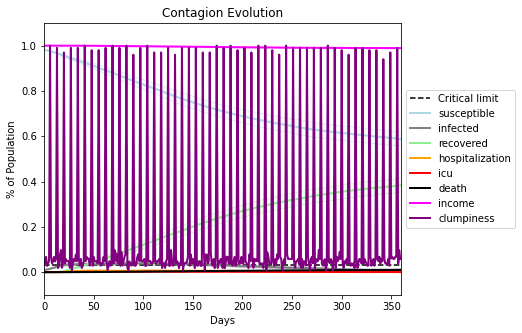

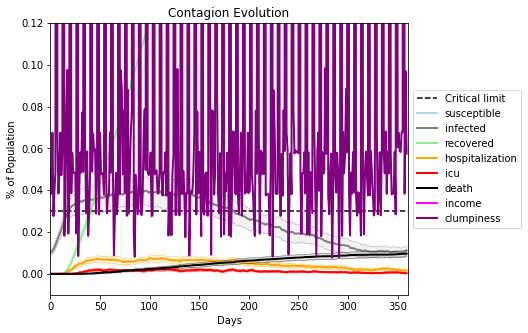

In [12]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[9740, 393, 8268, 389, 2234, 7589, 8317, 3821, 6861, 2555, 6765, 9192, 9709, 3491, 9471, 4013, 2639, 1961, 6480, 151, 2374, 2282, 9599, 7199, 2202, 1825, 3173, 208, 5809, 270]
Average similarity between family members is 0.294436035191434 at temperature 0
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
t

Average similarity between students and their classroom is 0.3771330429800803 at temperature 0
Average similarity between workers is 0.31614018137297434 at temperature 0
Average friend similarity for adults: 0.32477207300795236 for kids: 0.35398315579943646
run with seed 9740:
avg restaurant similarity 0.19857328623030127
avg restaurant similarity 0.2510791431953317
avg restaurant similarity 0.24356048771740355
avg restaurant similarity 0.1757775113570648
avg restaurant similarity 0.2106604064567831
avg restaurant similarity 0.1643061483138851
avg restaurant similarity 0.12225624581443094
avg restaurant similarity 0.15204065878317874
avg restaurant similarity 0.13408888560633253
avg restaurant similarity 0.1618246820049855
avg restaurant similarity 0.23448305730194838
avg restaurant similarity 0.2098155991891435
avg restaurant similarity 0.06393696126920763
avg restaurant similarity 0.19931732662580706
avg restaurant similarity 0.16507949746467615
avg restaurant similarity 0.2079808210

avg restaurant similarity 0.1643177843515062
avg restaurant similarity 0.1653475462728085
avg restaurant similarity 0.09336258294097209
avg restaurant similarity 0.1599006294606944
avg restaurant similarity 0.2620099323115634
avg restaurant similarity 0.21266057387890064
avg restaurant similarity 0.11971825305678223
avg restaurant similarity 0.13077383077038746
avg restaurant similarity 0.12120933224778398
avg restaurant similarity 0.12103803524472007
avg restaurant similarity 0.19077023896370607
avg restaurant similarity 0.1563143492363924
avg restaurant similarity 0.1291137409341337
avg restaurant similarity 0.2613189823792829
avg restaurant similarity 0.19413627146601362
avg restaurant similarity 0.06930725979496684
avg restaurant similarity 0.21761826810522142
avg restaurant similarity 0.2681531885543753
avg restaurant similarity 0.15074173743498473
avg restaurant similarity 0.11816722630032479
avg restaurant similarity 0.12692477921395742
avg restaurant similarity 0.12308167911109

tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset o

avg restaurant similarity 0.16821257948436608
avg restaurant similarity 0.0875408271206631
avg restaurant similarity 0.10962994544092554
avg restaurant similarity 0.2152035162419507
avg restaurant similarity 0.028222279084748177
avg restaurant similarity 0.29734641854215443
avg restaurant similarity 0.08479923125448106
avg restaurant similarity 0.10836237863549877
avg restaurant similarity 0.108208760573334
avg restaurant similarity 0.09476804238029637
avg restaurant similarity 0.12980521543343237
avg restaurant similarity 0.11863194474747378
avg restaurant similarity 0.025238419653750007
avg restaurant similarity 0.09491727857501417
avg restaurant similarity -0.03036901522070431
avg restaurant similarity 0.09438902064126113
avg restaurant similarity 0.07766660876873586
avg restaurant similarity 0.11330485138898524
avg restaurant similarity 0.001806460808547716
avg restaurant similarity 0.08963604882099131
avg restaurant similarity 0.06907113443230874
avg restaurant similarity 0.035664

avg restaurant similarity 0.08387188332363851
avg restaurant similarity 0.07917336689623926
avg restaurant similarity 0.1438119887143806
avg restaurant similarity 0.09492890939855624
avg restaurant similarity 0.05976425196430104
avg restaurant similarity 0.13272934453854687
avg restaurant similarity 0.14429474893788985
avg restaurant similarity -0.009672540419798396
avg restaurant similarity 0.13943448486098473
avg restaurant similarity 0.1254139403373157
avg restaurant similarity 0.044740383357257794
avg restaurant similarity 0.18804483828136173
avg restaurant similarity 0.07670316804247834
avg restaurant similarity -0.004584671124490768
avg restaurant similarity 0.21591757628756175
avg restaurant similarity 0.04787997194872969
avg restaurant similarity 0.1154821024784564
avg restaurant similarity 0.09859032846162327
avg restaurant similarity 0.1658580116191183
avg restaurant similarity -0.008046463555211563
avg restaurant similarity 0.0065434833293848745
avg restaurant similarity 0.1

tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset 

avg restaurant similarity -0.00021402369055679936
avg restaurant similarity 0.06303571023502706
avg restaurant similarity 0.09893708603444495
avg restaurant similarity 0.053084805734937915
avg restaurant similarity 0.1532187927337945
avg restaurant similarity 0.07795500544738589
avg restaurant similarity 0.07234239866718685
avg restaurant similarity 0.07963682756350583
avg restaurant similarity 0.037503147781876855
avg restaurant similarity 0.13923538778702885
avg restaurant similarity 0.11546171741283934
avg restaurant similarity -0.04071532450053964
avg restaurant similarity 0.11383266508113409
avg restaurant similarity 0.10077938694298394
avg restaurant similarity -0.00046362567985874217
avg restaurant similarity 0.06245417647899945
avg restaurant similarity 0.033447206698912615
avg restaurant similarity 0.08231758989871943
avg restaurant similarity 0.08710098593830373
avg restaurant similarity 0.0732408560839957
avg restaurant similarity 0.07921479485780676
avg restaurant similarit

avg restaurant similarity 0.18030915967665476
avg restaurant similarity 0.014778048144140892
avg restaurant similarity 0.05027429260254225
avg restaurant similarity 0.11495968382754826
avg restaurant similarity 0.025999649029254498
avg restaurant similarity 0.08128252307526963
avg restaurant similarity 0.12504919952337004
avg restaurant similarity 0.15809459236557494
avg restaurant similarity 0.166695830554493
avg restaurant similarity 0.21883949574057124
avg restaurant similarity -0.010731792079723964
avg restaurant similarity 0.020502698175313982
avg restaurant similarity 0.11800326583923004
avg restaurant similarity 0.044473047934024686
avg restaurant similarity 0.1007099563914168
avg restaurant similarity 0.018897143808534536
avg restaurant similarity 0.08833264936399651
avg restaurant similarity 0.0237815978101282
avg restaurant similarity 0.11378827273567257
avg restaurant similarity 0.036879111894962825
Average similarity between family members is 0.29625681429880246 at temperat

Average similarity between students and their classroom is 0.33575155655355776 at temperature 0
Average similarity between workers is 0.2828558719231027 at temperature 0
Average friend similarity for adults: 0.32458901349389996 for kids: 0.34704817032950613
run with seed 389:
avg restaurant similarity 0.12305286427866362
avg restaurant similarity 0.07190077815030567
avg restaurant similarity 0.08832532042248878
avg restaurant similarity 0.25007626201779837
avg restaurant similarity 0.4083826299061657
avg restaurant similarity 0.20414925879644705
avg restaurant similarity 0.12714861371877134
avg restaurant similarity -0.049335592624843695
avg restaurant similarity 0.17304158212239723
avg restaurant similarity 0.1700271697458072
avg restaurant similarity 0.19814912773590704
avg restaurant similarity 0.0599445066513864
avg restaurant similarity 0.168186702793119
avg restaurant similarity 0.19755370377103484
avg restaurant similarity 0.0729086298809753
avg restaurant similarity 0.108007207

avg restaurant similarity 0.2482963380162784
avg restaurant similarity 0.16634528422310807
avg restaurant similarity 0.03881053850478749
avg restaurant similarity 0.10051105323062323
avg restaurant similarity 0.07142201731880667
avg restaurant similarity 0.03585769346775484
avg restaurant similarity 0.21603685864126526
avg restaurant similarity 0.2569041696600338
avg restaurant similarity 0.21912509396735558
avg restaurant similarity -0.04265791773942959
avg restaurant similarity -0.0038788846183497503
avg restaurant similarity 0.14018502587686157
avg restaurant similarity 0.08772753008905435
avg restaurant similarity 0.26263300608174195
avg restaurant similarity 0.05457217023538115
avg restaurant similarity 0.3337650867913729
avg restaurant similarity 0.1793232822066097
avg restaurant similarity 0.40006083901132933
avg restaurant similarity 0.19393200665403834
avg restaurant similarity 0.20773482741824428
avg restaurant similarity 0.10044264227517737
avg restaurant similarity 0.066890

tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset o

avg restaurant similarity 0.1427609006167982
avg restaurant similarity 0.1951049327740063
avg restaurant similarity 0.20488075350161253
avg restaurant similarity 0.2207567153628793
avg restaurant similarity 0.24331411196490854
avg restaurant similarity 0.1516074730126934
avg restaurant similarity 0.11304309977296938
avg restaurant similarity 0.24455480736819402
avg restaurant similarity 0.16067318723495574
avg restaurant similarity 0.23550088642499467
avg restaurant similarity 0.19128579233116777
avg restaurant similarity 0.21553122651075982
avg restaurant similarity 0.23276021270282973
avg restaurant similarity 0.2586525499965093
avg restaurant similarity 0.23633076146382542
avg restaurant similarity 0.19212507413986243
avg restaurant similarity 0.16468708564672116
avg restaurant similarity 0.20483162606657845
avg restaurant similarity 0.25278523209548254
avg restaurant similarity 0.2138611570614236
avg restaurant similarity 0.17152353865636227
avg restaurant similarity 0.199426690746

avg restaurant similarity 0.20055369820652574
avg restaurant similarity 0.17801513842944924
avg restaurant similarity 0.1712386589683011
avg restaurant similarity 0.14226714874025342
avg restaurant similarity 0.23823025295739161
avg restaurant similarity 0.2261190607682271
avg restaurant similarity 0.2022523177265975
avg restaurant similarity 0.13029678570035055
avg restaurant similarity 0.17197944249112457
avg restaurant similarity 0.19260549350970457
avg restaurant similarity 0.2395771616989074
avg restaurant similarity 0.17694245602926173
avg restaurant similarity 0.2093650527978038
avg restaurant similarity 0.22939509804786168
avg restaurant similarity 0.2543573349884111
avg restaurant similarity 0.20704149586832132
avg restaurant similarity 0.2102378627789755
avg restaurant similarity 0.14551945291697432
avg restaurant similarity 0.28379431202353267
avg restaurant similarity 0.27052438729377115
avg restaurant similarity 0.17943353930829103
avg restaurant similarity 0.2133140494781

tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
Average similarity between family and home is 0.9914066167172236 at temperature -1
Average similarity between students and their classroom is 0.3422372969510317 at temperature 0
Average similarity between workers is 0.3111457101478395 at temperature 0
Average friend similarity for adults: 0.3178691102182403 for kids: 0.3455099499936147
run with seed 7589:
avg restaurant similarity 0.12002275182370711
avg restaurant similarity 0.09129474235557629
avg restaurant similarity 0

avg restaurant similarity 0.18218093675170097
avg restaurant similarity 0.1724945767170292
avg restaurant similarity 0.09416174826401828
avg restaurant similarity 0.1379494835627992
avg restaurant similarity 0.17108768558985063
avg restaurant similarity 0.17427175025394084
avg restaurant similarity 0.039335541725221
avg restaurant similarity 0.23774989787878945
avg restaurant similarity 0.2520613762332004
avg restaurant similarity 0.21738183737628375
avg restaurant similarity 0.13456677413238535
avg restaurant similarity 0.2521379664164772
avg restaurant similarity 0.25749061306546334
avg restaurant similarity 0.17661014628226235
avg restaurant similarity 0.0921886195861656
avg restaurant similarity 0.19499959818758975
avg restaurant similarity 0.08628368739872737
avg restaurant similarity 0.20772916043787867
avg restaurant similarity 0.11194953920472718
avg restaurant similarity 0.037743549479709475
avg restaurant similarity 0.11095884701007759
avg restaurant similarity 0.152451455795

tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of 

avg restaurant similarity 0.06872495217261115
avg restaurant similarity 0.1390547570474064
avg restaurant similarity 0.21814021581013165
avg restaurant similarity 0.24728156168860382
avg restaurant similarity 0.2481522760177836
avg restaurant similarity 0.16066427785529622
avg restaurant similarity 0.17826705387345987
avg restaurant similarity 0.10943348665292588
avg restaurant similarity 0.21124141560828286
avg restaurant similarity 0.2246872186771254
avg restaurant similarity 0.09741106992305551
avg restaurant similarity 0.1550481976191632
avg restaurant similarity 0.10014247710083449
avg restaurant similarity 0.14710505937823246
avg restaurant similarity 0.12001464843481954
avg restaurant similarity 0.10404855611683624
avg restaurant similarity 0.20493486677207048
avg restaurant similarity 0.23179220547570017
avg restaurant similarity 0.20783004160061253
avg restaurant similarity 0.25923920373686254
avg restaurant similarity 0.17054938068897602
avg restaurant similarity 0.1094313617

avg restaurant similarity 0.17775310930497154
avg restaurant similarity 0.13703500064018545
avg restaurant similarity 0.1704147352260697
avg restaurant similarity 0.18617298358673856
avg restaurant similarity 0.0796387195056335
avg restaurant similarity 0.19845090185750222
avg restaurant similarity 0.14629819266530805
avg restaurant similarity 0.08047176970754666
avg restaurant similarity 0.12948775061288542
avg restaurant similarity 0.12273235729248888
avg restaurant similarity 0.16788551820186992
avg restaurant similarity 0.20220035402834616
avg restaurant similarity 0.18307660938755016
avg restaurant similarity 0.15671504559946484
avg restaurant similarity 0.1908180702891415
avg restaurant similarity 0.1707160087289326
avg restaurant similarity 0.29235584263000625
avg restaurant similarity 0.18895098493137288
avg restaurant similarity 0.20071175330741972
avg restaurant similarity 0.2044767692849446
avg restaurant similarity 0.13861178244269198
avg restaurant similarity 0.17480305467

tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 62
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset o

avg restaurant similarity 0.3028625784537275
avg restaurant similarity 0.2526807449020843
avg restaurant similarity 0.20175013877597914
avg restaurant similarity 0.2016306057251864
avg restaurant similarity 0.22808473441351448
avg restaurant similarity 0.1653847139439278
avg restaurant similarity 0.14879925082259396
avg restaurant similarity 0.16746826799470638
avg restaurant similarity 0.14096664339570236
avg restaurant similarity 0.26816541057813964
avg restaurant similarity 0.1475859930518337
avg restaurant similarity 0.29395752267940556
avg restaurant similarity 0.20614595097403696
avg restaurant similarity 0.20313943060155407
avg restaurant similarity 0.20353252075809253
avg restaurant similarity 0.19818640838420729
avg restaurant similarity 0.10551860914981823
avg restaurant similarity 0.29916173254542705
avg restaurant similarity 0.21887855275187348
avg restaurant similarity 0.22648856948206367
avg restaurant similarity 0.2834012466887564
avg restaurant similarity 0.140988814918

tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset

avg restaurant similarity 0.1148474534472177
avg restaurant similarity 0.039874132965572906
avg restaurant similarity 0.1139363625521891
avg restaurant similarity 0.07175177374920372
avg restaurant similarity 0.12791919029641027
avg restaurant similarity 0.1693059663256502
avg restaurant similarity 0.11594946684492285
avg restaurant similarity 0.022565865185957365
avg restaurant similarity 0.11052719953316999
avg restaurant similarity 0.065181023965259
avg restaurant similarity 0.08351461572579087
avg restaurant similarity 0.12549756468116266
avg restaurant similarity 0.040927157273900096
avg restaurant similarity 0.03734512865464599
avg restaurant similarity 0.1295183616185264
avg restaurant similarity 0.06988665522083794
avg restaurant similarity 0.04664323977846116
avg restaurant similarity 0.08968340646300624
avg restaurant similarity 0.10349762539897085
avg restaurant similarity 0.021924219589610876
avg restaurant similarity 0.004379104984293277
avg restaurant similarity 0.2037987

avg restaurant similarity 0.16361327186105556
avg restaurant similarity 0.08722271712536844
avg restaurant similarity 0.10950611758398489
avg restaurant similarity 0.07942607563884807
avg restaurant similarity 0.0937835276973805
avg restaurant similarity 0.011793078895690918
avg restaurant similarity 0.06697535136908946
avg restaurant similarity 0.10767601325006848
avg restaurant similarity 0.13821477576696425
avg restaurant similarity 0.1828770221845974
avg restaurant similarity 0.1613168689199405
avg restaurant similarity 0.19182804145416302
avg restaurant similarity 0.08736279893984528
avg restaurant similarity 0.07658831248380876
avg restaurant similarity 0.08288370967585085
avg restaurant similarity 0.12366836359841048
avg restaurant similarity 0.0435843463811679
avg restaurant similarity 0.0712195934586389
avg restaurant similarity 0.17468906642370366
avg restaurant similarity 0.06097808566984445
avg restaurant similarity 0.10381586202458307
avg restaurant similarity 0.0629645821

tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 62
tup_vec1 not in keepset 

avg restaurant similarity 0.19296166808566015
avg restaurant similarity 0.3182349673323381
avg restaurant similarity 0.19474718361888213
avg restaurant similarity 0.21230268652927578
avg restaurant similarity 0.1357033454865743
avg restaurant similarity 0.23140251827738592
avg restaurant similarity 0.2411013422128174
avg restaurant similarity 0.2923274678047119
avg restaurant similarity 0.21141819960181685
avg restaurant similarity 0.2901028978339762
avg restaurant similarity 0.2749097225994548
avg restaurant similarity 0.18822069532760624
avg restaurant similarity 0.09987183794491807
avg restaurant similarity 0.17657621073167948
avg restaurant similarity 0.16786672954488116
avg restaurant similarity 0.24058117351169903
avg restaurant similarity 0.16047741515417796
avg restaurant similarity 0.12311150456328444
avg restaurant similarity 0.2974228661099611
avg restaurant similarity 0.2272568981240534
avg restaurant similarity 0.27449820341796405
avg restaurant similarity 0.27589513202436

avg restaurant similarity 0.18358696970387658
avg restaurant similarity 0.2010411202520418
avg restaurant similarity 0.27067490726395643
avg restaurant similarity 0.26887379208536155
avg restaurant similarity 0.18433572982253782
avg restaurant similarity 0.2845330000519818
avg restaurant similarity 0.1279070019127326
avg restaurant similarity 0.2620457049996599
avg restaurant similarity 0.3823534228712492
avg restaurant similarity 0.18419975449858147
avg restaurant similarity 0.29445505701897673
avg restaurant similarity 0.27576715103964816
avg restaurant similarity 0.16147709438487218
avg restaurant similarity 0.21431363725209304
avg restaurant similarity 0.15640336237997388
avg restaurant similarity 0.1808597031795085
avg restaurant similarity 0.24589055737631235
avg restaurant similarity 0.2105623959522432
avg restaurant similarity 0.16891765922489402
avg restaurant similarity 0.04662583474418547
avg restaurant similarity 0.17855291143934854
avg restaurant similarity 0.2923864173047

tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
Average similarity between family and home is 0.9925826994342943 at temperature -1
Average similarity between students and their classroom is 0.37067350016493583 at temperature 0
Average similarity between workers is 0.3208550087039476 at temperature 0
Average friend similarity for adults: 0.3589443318693097 for kids: 0.38426399475721906
run with seed 6765:
avg restauran

avg restaurant similarity 0.1209562719239941
avg restaurant similarity 0.28291716251149523
avg restaurant similarity 0.1211864614526379
avg restaurant similarity 0.018184252360426412
avg restaurant similarity 0.21505965391137627
avg restaurant similarity 0.14272225299258057
avg restaurant similarity 0.1259283344436419
avg restaurant similarity 0.19792063844329755
avg restaurant similarity 0.1679107699363071
avg restaurant similarity 0.06100474457497169
avg restaurant similarity 0.14864666033603013
avg restaurant similarity 0.18990629915249224
avg restaurant similarity -0.014361084841057085
avg restaurant similarity 0.1212157982269665
avg restaurant similarity 0.1585615236712277
avg restaurant similarity 0.2468189938734984
avg restaurant similarity 0.1565291661067831
avg restaurant similarity 0.038525131818700216
avg restaurant similarity 0.14507099646604896
avg restaurant similarity 0.10406086642095325
avg restaurant similarity 0.15717211922934657
avg restaurant similarity 0.2064349283

tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset 

avg restaurant similarity 0.13669680820929084
avg restaurant similarity 0.16205323665831775
avg restaurant similarity 0.06844035461489208
avg restaurant similarity 0.12034470327639211
avg restaurant similarity 0.07177617637234124
avg restaurant similarity 0.12662725479540848
avg restaurant similarity 0.16656308120372082
avg restaurant similarity 0.06528482892032597
avg restaurant similarity 0.09569220595507419
avg restaurant similarity 0.21619992233252494
avg restaurant similarity 0.197005466258683
avg restaurant similarity 0.08890172967496074
avg restaurant similarity 0.10073681817384592
avg restaurant similarity 0.1074672708957123
avg restaurant similarity 0.07074157787289105
avg restaurant similarity 0.19014495531437334
avg restaurant similarity 0.09421105871963495
avg restaurant similarity 0.1007851756817214
avg restaurant similarity -0.022818716890304774
avg restaurant similarity 0.15904141192532323
avg restaurant similarity 0.21065849738212644
avg restaurant similarity 0.05152000

avg restaurant similarity 0.13454064307886496
avg restaurant similarity 0.14811756825239425
avg restaurant similarity 0.1043498461803034
avg restaurant similarity 0.09508243760604332
avg restaurant similarity 0.1557487783632438
avg restaurant similarity 0.1873312025043547
avg restaurant similarity 0.135461457137677
avg restaurant similarity 0.10339982823689436
avg restaurant similarity 0.11294288990382159
avg restaurant similarity 0.10865579667128387
avg restaurant similarity 0.16274543244295775
avg restaurant similarity 0.2013163126503657
avg restaurant similarity 0.22383456573576782
avg restaurant similarity 0.11899902825784393
avg restaurant similarity 0.08501863825170626
avg restaurant similarity 0.10511972074125776
avg restaurant similarity 0.08987089958353486
avg restaurant similarity 0.20778074424198098
avg restaurant similarity 0.14836296216250786
avg restaurant similarity 0.1730443821979692
avg restaurant similarity 0.07337111399271394
avg restaurant similarity 0.1181249711472

tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 62
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset o

avg restaurant similarity 0.18014235754194238
avg restaurant similarity 0.1360369956476019
avg restaurant similarity 0.20362106490809564
avg restaurant similarity 0.1369641746521423
avg restaurant similarity 0.15178821297856715
avg restaurant similarity 0.1919264176305552
avg restaurant similarity 0.21534111483892618
avg restaurant similarity 0.10040413905074078
avg restaurant similarity 0.1368159472405637
avg restaurant similarity 0.10156971734863002
avg restaurant similarity 0.24203596960804466
avg restaurant similarity 0.04659835803191335
avg restaurant similarity 0.18160757310441195
avg restaurant similarity 0.03499451132352743
avg restaurant similarity 0.17501389940094406
avg restaurant similarity 0.22967939176023044
avg restaurant similarity 0.16089511115387584
avg restaurant similarity 0.045532768277132644
avg restaurant similarity 0.08798396228273686
avg restaurant similarity 0.09032312065049526
avg restaurant similarity 0.143604344761437
avg restaurant similarity 0.10862038061

avg restaurant similarity 0.17543454132224076
avg restaurant similarity 0.10960504603465718
avg restaurant similarity 0.09561277502369739
avg restaurant similarity 0.23407555972442373
avg restaurant similarity 0.10490130242371005
avg restaurant similarity 0.1943359062019443
avg restaurant similarity 0.12836152667816392
avg restaurant similarity 0.12076048378253822
avg restaurant similarity 0.147463131823482
avg restaurant similarity 0.16289195280389573
avg restaurant similarity 0.1121190852863012
avg restaurant similarity 0.09590734347620244
avg restaurant similarity 0.26920979248500865
avg restaurant similarity 0.14557264860685581
avg restaurant similarity 0.2409301496809265
avg restaurant similarity 0.17318642090953984
avg restaurant similarity 0.13255017354248985
avg restaurant similarity 0.13961401240518215
avg restaurant similarity 0.12533478698348097
avg restaurant similarity 0.17204811494333863
avg restaurant similarity 0.12423464900292927
avg restaurant similarity 0.05095087992

Average similarity between students and their classroom is 0.36899265875516757 at temperature 0
Average similarity between workers is 0.27934476796292945 at temperature 0
Average friend similarity for adults: 0.2927988743830223 for kids: 0.3233524216312177
run with seed 3491:
avg restaurant similarity 0.06715253003327462
avg restaurant similarity 0.049731317938290075
avg restaurant similarity 0.08180650953738194
avg restaurant similarity 0.002527600262809823
avg restaurant similarity 0.1121087868145627
avg restaurant similarity 0.13220052284672085
avg restaurant similarity 0.08262459529250105
avg restaurant similarity 0.11154349300139514
avg restaurant similarity 0.03521463171435954
avg restaurant similarity 0.1378722952879405
avg restaurant similarity -0.0555360551957479
avg restaurant similarity 0.1290416065522321
avg restaurant similarity 0.13982845155393958
avg restaurant similarity 0.18243446155916765
avg restaurant similarity 0.07818500531488462
avg restaurant similarity 0.081669

avg restaurant similarity 0.0750215273576696
avg restaurant similarity 0.08766441837616563
avg restaurant similarity 0.2203550425066997
avg restaurant similarity 0.10581498283763068
avg restaurant similarity 0.12242932156559608
avg restaurant similarity 0.06681940425328982
avg restaurant similarity 0.01589089090730042
avg restaurant similarity -0.0198654912290136
avg restaurant similarity 0.041085304542353485
avg restaurant similarity -0.043583212227996125
avg restaurant similarity 0.017054481677043987
avg restaurant similarity 0.08922084678462817
avg restaurant similarity 0.07145245337277692
avg restaurant similarity 0.06475232611773421
avg restaurant similarity -0.09878885543349782
avg restaurant similarity 0.17028860843817417
avg restaurant similarity 0.05582623694977826
avg restaurant similarity 0.04698467687949163
avg restaurant similarity 0.055562972984156724
avg restaurant similarity 0.11322919012020988
avg restaurant similarity 0.12969508676348715
avg restaurant similarity 0.13

tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of

avg restaurant similarity 0.06841310631833214
avg restaurant similarity 0.0435774995295425
avg restaurant similarity 0.08892863703402341
avg restaurant similarity 0.11534750270229059
avg restaurant similarity 0.10248312228517885
avg restaurant similarity 0.0913205880562424
avg restaurant similarity 0.0520056546048305
avg restaurant similarity 0.06599093679032826
avg restaurant similarity 0.042128787956194465
avg restaurant similarity 0.10054833244734221
avg restaurant similarity 0.0904971408560571
avg restaurant similarity 0.14150644574656449
avg restaurant similarity 0.004591245345011735
avg restaurant similarity 0.06954156814970315
avg restaurant similarity 0.09254823649392768
avg restaurant similarity 0.06479361822789902
avg restaurant similarity 0.15586798374537758
avg restaurant similarity 0.1339567589136337
avg restaurant similarity 0.07688984628572941
avg restaurant similarity 0.09121822756792132
avg restaurant similarity 0.13724201914187184
avg restaurant similarity 0.148151957

avg restaurant similarity 0.12268936822887427
avg restaurant similarity 0.1400741361279583
avg restaurant similarity 0.21666374640552521
avg restaurant similarity 0.15179447427971798
avg restaurant similarity 0.1863015489806012
avg restaurant similarity 0.100815416313473
avg restaurant similarity 0.09179661879876543
avg restaurant similarity 0.13587105120233878
avg restaurant similarity 0.1307819761711827
avg restaurant similarity 0.1405643885622786
avg restaurant similarity 0.1545070606214865
avg restaurant similarity 0.017095352375073116
avg restaurant similarity 0.1041373909759476
avg restaurant similarity 0.1548484113783318
avg restaurant similarity 0.09521831076266041
avg restaurant similarity 0.1897922144692977
avg restaurant similarity 0.14727093073587552
avg restaurant similarity 0.05630815821030025
avg restaurant similarity 0.0972078107384311
avg restaurant similarity 0.10795527208477135
avg restaurant similarity 0.11292801081825471
avg restaurant similarity 0.0930481720709475

tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset 

avg restaurant similarity 0.09757737576644399
avg restaurant similarity 0.16195497544475226
avg restaurant similarity 0.09908278573838372
avg restaurant similarity 0.011611472250376046
avg restaurant similarity 0.3912375370022556
avg restaurant similarity 0.19957690752764287
avg restaurant similarity 0.12069866650611796
avg restaurant similarity -0.019321718357185647
avg restaurant similarity -0.0888536943042624
avg restaurant similarity 0.10656031307631732
avg restaurant similarity 0.09732512713266077
avg restaurant similarity -0.09169827050925466
avg restaurant similarity 0.2772652052617886
avg restaurant similarity 0.1589788385853582
avg restaurant similarity 0.27595554840586284
avg restaurant similarity 0.0334619343480746
avg restaurant similarity 0.24701342908805848
avg restaurant similarity 0.07912316851375399
avg restaurant similarity 0.1423659345058218
avg restaurant similarity 0.16062811073721206
avg restaurant similarity 0.24727638610024655
avg restaurant similarity 0.0573856

tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset

avg restaurant similarity 0.15436971844359976
avg restaurant similarity 0.1599786186100029
avg restaurant similarity 0.19951089304359784
avg restaurant similarity -0.023632648936409675
avg restaurant similarity 0.16397189690903358
avg restaurant similarity 0.15341030316109794
avg restaurant similarity 0.08212703219676208
avg restaurant similarity 0.22978169104315327
avg restaurant similarity 0.4118609203922227
avg restaurant similarity 0.20387024434700887
avg restaurant similarity 0.06832039903195221
avg restaurant similarity 0.09838296782472414
avg restaurant similarity 0.18719566902638413
avg restaurant similarity 0.14408687343595158
avg restaurant similarity 0.05597479886506427
avg restaurant similarity 0.22590143529340395
avg restaurant similarity 0.1813162561916226
avg restaurant similarity 0.20275413988826432
avg restaurant similarity 0.14421471557471505
avg restaurant similarity 0.17317413320091146
avg restaurant similarity 0.30771711901871995
avg restaurant similarity 0.1787322

avg restaurant similarity 0.0744494538924888
avg restaurant similarity 0.18718803373162798
avg restaurant similarity 0.056587109062357824
avg restaurant similarity 0.12032416333852476
avg restaurant similarity 0.05648564567861514
avg restaurant similarity 0.21968327957092962
avg restaurant similarity 0.19155332315280138
avg restaurant similarity 0.16977082254528952
avg restaurant similarity 0.13954340852200198
avg restaurant similarity 0.10481084465190695
avg restaurant similarity 0.06981923908858693
avg restaurant similarity 0.16150727350447783
avg restaurant similarity 0.1220383824708463
avg restaurant similarity 0.12425136766208338
avg restaurant similarity 0.04494861207256369
avg restaurant similarity 0.21311479791761218
avg restaurant similarity 0.10195355478747387
avg restaurant similarity 0.28250954250302457
avg restaurant similarity 0.08793349106835151
avg restaurant similarity 0.1456247193199841
avg restaurant similarity 0.07370961423447343
avg restaurant similarity 0.21194298

tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset 

avg restaurant similarity 0.11956616851299365
avg restaurant similarity 0.2959285688991139
avg restaurant similarity 0.08208870067470399
avg restaurant similarity -0.014077292147526524
avg restaurant similarity 0.20105524199812316
avg restaurant similarity 0.10543587614506858
avg restaurant similarity 0.19967414025743999
avg restaurant similarity 0.2461615474146036
avg restaurant similarity 0.3116663279668213
avg restaurant similarity 0.11721012024641954
avg restaurant similarity 0.20284180779037803
avg restaurant similarity 0.3266815349836045
avg restaurant similarity 0.02272454421274645
avg restaurant similarity 0.10335500087510101
avg restaurant similarity 0.06506658222400305
avg restaurant similarity 0.12134338012530035
avg restaurant similarity 0.22031415687331615
avg restaurant similarity 0.0799121266165558
avg restaurant similarity 0.09430421842455225
avg restaurant similarity 0.38422093654199174
avg restaurant similarity 0.13755833117997968
avg restaurant similarity 0.079541612

avg restaurant similarity 0.08299489230404625
avg restaurant similarity 0.06211158324238605
avg restaurant similarity 0.13981986613751704
avg restaurant similarity 0.11543447990954894
avg restaurant similarity 0.17564569586326592
avg restaurant similarity 0.17267659689214057
avg restaurant similarity 0.07739438793716333
avg restaurant similarity 0.09808596082524926
avg restaurant similarity 0.07786897784742788
avg restaurant similarity 0.29522299702008736
avg restaurant similarity 0.16936876115761915
avg restaurant similarity 0.09835447135144817
avg restaurant similarity 0.34262180753804194
avg restaurant similarity 0.10968520563797376
avg restaurant similarity 0.36174427144469046
avg restaurant similarity 0.15629774910024055
avg restaurant similarity 0.14713882417559535
avg restaurant similarity 0.1961029417459558
avg restaurant similarity 0.05782645923386038
avg restaurant similarity 0.1358846193557316
avg restaurant similarity 0.08215772444212038
avg restaurant similarity 0.13136674

tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset o

avg restaurant similarity 0.12137724023656991
avg restaurant similarity 0.04897826591500647
avg restaurant similarity 0.10360944447958388
avg restaurant similarity 0.023248906843971073
avg restaurant similarity 0.027338295806174882
avg restaurant similarity 0.20711826143579826
avg restaurant similarity 0.13564290071959698
avg restaurant similarity 0.09314593868562465
avg restaurant similarity 0.15246408509626141
avg restaurant similarity 0.055391622821196355
avg restaurant similarity 0.04270239262697608
avg restaurant similarity 0.16984199226102192
avg restaurant similarity 0.05057805922581041
avg restaurant similarity 0.24736064782265477
avg restaurant similarity 0.1727567870312595
avg restaurant similarity -0.009724195266183946
avg restaurant similarity 0.11025713617715543
avg restaurant similarity 0.2216098997876521
avg restaurant similarity 0.13798880215916373
avg restaurant similarity 0.023103279328144325
avg restaurant similarity 0.05247041941154473
avg restaurant similarity -0.0

avg restaurant similarity 0.10966103179796652
avg restaurant similarity 0.03610170403848116
avg restaurant similarity 0.1064469433594469
avg restaurant similarity 0.06696349082631557
avg restaurant similarity 0.1451036951064872
avg restaurant similarity 0.19016363867945194
avg restaurant similarity 0.11291138012348396
avg restaurant similarity 0.14318005107868995
avg restaurant similarity 0.09850225379567498
avg restaurant similarity 0.14429526456271588
avg restaurant similarity -0.008220355230695522
avg restaurant similarity 0.18551639289806796
avg restaurant similarity 0.10538073642323455
avg restaurant similarity 0.0902856065197853
avg restaurant similarity 0.0631226543746899
avg restaurant similarity 0.11600540541302451
avg restaurant similarity 0.04888957850871169
Average similarity between family members is 0.3179277044621052 at temperature 0
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50


Average similarity between family and home is 0.9913172343893433 at temperature -1
Average similarity between students and their classroom is 0.3940462948698604 at temperature 0
Average similarity between workers is 0.3214822115567486 at temperature 0
Average friend similarity for adults: 0.35247834592209315 for kids: 0.3842614749760129
run with seed 151:
avg restaurant similarity 0.17678611748717565
avg restaurant similarity 0.2576972177183447
avg restaurant similarity 0.18373973812599506
avg restaurant similarity 0.19723062328072027
avg restaurant similarity 0.42851271987769574
avg restaurant similarity 0.18580110079635834
avg restaurant similarity 0.14520224191626943
avg restaurant similarity 0.1507827909816568
avg restaurant similarity 0.21041591795858725
avg restaurant similarity 0.2748452211096691
avg restaurant similarity 0.24091009033449418
avg restaurant similarity 0.26193433629977864
avg restaurant similarity 0.23480857596172758
avg restaurant similarity 0.34018749060368125
a

avg restaurant similarity 0.2858285059231308
avg restaurant similarity 0.2179163792613694
avg restaurant similarity 0.11628629047510268
avg restaurant similarity 0.15176786153777475
avg restaurant similarity 0.2666493245879084
avg restaurant similarity 0.24789526961254912
avg restaurant similarity 0.3337907758600627
avg restaurant similarity 0.2107396711565849
avg restaurant similarity 0.20824401538423748
avg restaurant similarity 0.19642977723988106
avg restaurant similarity 0.23885211161317907
avg restaurant similarity 0.20721668937818513
avg restaurant similarity 0.25475310389672
avg restaurant similarity 0.1917432394596919
avg restaurant similarity 0.1631861396689578
avg restaurant similarity 0.251017129293754
avg restaurant similarity 0.21312622737039347
avg restaurant similarity 0.18485290546141744
avg restaurant similarity 0.28122219691547
avg restaurant similarity 0.2440904296108176
avg restaurant similarity 0.31258354446410047
avg restaurant similarity 0.2984918443527588
avg r

tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of

avg restaurant similarity 0.21282868631169122
avg restaurant similarity 0.12985729706456792
avg restaurant similarity 0.17276571938139731
avg restaurant similarity 0.06558734795354795
avg restaurant similarity 0.15942811259602635
avg restaurant similarity 0.2018226809011302
avg restaurant similarity 0.2501778150882086
avg restaurant similarity 0.18922877108915404
avg restaurant similarity 0.22904434127498657
avg restaurant similarity 0.32823474367045957
avg restaurant similarity 0.228684800931854
avg restaurant similarity 0.18789232583241933
avg restaurant similarity 0.12704724083535068
avg restaurant similarity 0.16639696293665812
avg restaurant similarity 0.23321362084639607
avg restaurant similarity 0.15320634648881323
avg restaurant similarity 0.1397723861807697
avg restaurant similarity 0.22428138819862714
avg restaurant similarity 0.06116156986084958
avg restaurant similarity 0.3279752101999995
avg restaurant similarity 0.22492767626125196
avg restaurant similarity 0.323551402082

avg restaurant similarity 0.12737659229973858
avg restaurant similarity 0.2403245211747672
avg restaurant similarity 0.14838134651451734
avg restaurant similarity 0.2581610289682263
avg restaurant similarity 0.24321595608003274
avg restaurant similarity 0.19114337765497913
avg restaurant similarity 0.023244662176561723
avg restaurant similarity 0.3003668004153108
avg restaurant similarity 0.19624563895831074
avg restaurant similarity 0.26743138540562844
avg restaurant similarity 0.21856846021207524
avg restaurant similarity 0.24165627089338337
avg restaurant similarity 0.2505346109159132
avg restaurant similarity 0.16511786341476875
avg restaurant similarity 0.11956325749524978
avg restaurant similarity 0.1299732512373658
avg restaurant similarity 0.10850716878663332
avg restaurant similarity 0.32192785723468065
avg restaurant similarity 0.22793353127342972
avg restaurant similarity 0.12733565676782704
avg restaurant similarity 0.25556815664433885
avg restaurant similarity 0.1376033641

tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset o

avg restaurant similarity 0.043981472122953766
avg restaurant similarity 0.17325493774659612
avg restaurant similarity 0.17056662360682884
avg restaurant similarity 0.23686800036471595
avg restaurant similarity 0.09955681835719334
avg restaurant similarity 0.08941184229855684
avg restaurant similarity 0.1161405554013184
avg restaurant similarity 0.09598884748279086
avg restaurant similarity 0.06423344996324921
avg restaurant similarity 0.13760865347674367
avg restaurant similarity 0.15815832151749912
avg restaurant similarity 0.24755849028928245
avg restaurant similarity 0.19776625451293794
avg restaurant similarity 0.2981329932895565
avg restaurant similarity 0.09669271676298441
avg restaurant similarity 0.24126130808372853
avg restaurant similarity 0.21864437281038543
avg restaurant similarity 0.10578930347522077
avg restaurant similarity 0.05835309233931743
avg restaurant similarity 0.16274160334249907
avg restaurant similarity 0.21472141272170636
avg restaurant similarity 0.1526575

avg restaurant similarity 0.18314034275711083
Average similarity between family members is 0.31212512505374745 at temperature 0
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
t

Average similarity between students and their classroom is 0.35246491755739046 at temperature 0
Average similarity between workers is 0.3200212270188592 at temperature 0
Average friend similarity for adults: 0.3234391912776484 for kids: 0.34794356833666307
run with seed 9599:
avg restaurant similarity 0.26330979364151813
avg restaurant similarity 0.28918380789069087
avg restaurant similarity 0.19172980023134384
avg restaurant similarity 0.2403557852181225
avg restaurant similarity 0.23366607262255176
avg restaurant similarity 0.18001612795760344
avg restaurant similarity 0.12900781797835892
avg restaurant similarity 0.2521012980765975
avg restaurant similarity 0.12662709360177557
avg restaurant similarity 0.14036842523721263
avg restaurant similarity 0.2750143099670315
avg restaurant similarity 0.24648113127392696
avg restaurant similarity 0.16935965074972398
avg restaurant similarity 0.17221867824210113
avg restaurant similarity 0.2606040192104546
avg restaurant similarity 0.314208615

avg restaurant similarity 0.21530592722345906
avg restaurant similarity 0.1688069349776434
avg restaurant similarity 0.1760416423658763
avg restaurant similarity 0.2592350343976331
avg restaurant similarity 0.2550015791503047
avg restaurant similarity 0.12007117460934731
avg restaurant similarity 0.13463949729376778
avg restaurant similarity 0.11960650255464741
avg restaurant similarity 0.18097521741698533
avg restaurant similarity 0.2717728368115444
avg restaurant similarity 0.22588147989105448
avg restaurant similarity 0.15785225522793095
avg restaurant similarity 0.2301368853863528
avg restaurant similarity 0.25387688077120735
avg restaurant similarity 0.21813303931495895
avg restaurant similarity 0.1566088461355721
avg restaurant similarity 0.1295721112787412
avg restaurant similarity 0.16880458171185836
avg restaurant similarity 0.08917152724244293
avg restaurant similarity 0.13660266619762992
avg restaurant similarity 0.2450466582359093
avg restaurant similarity 0.266798263874953

tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of 

avg restaurant similarity 0.19097309480714714
avg restaurant similarity 0.10321267670975921
avg restaurant similarity 0.1542148729740547
avg restaurant similarity 0.1457086290081562
avg restaurant similarity 0.17574572554607407
avg restaurant similarity 0.0725673174571599
avg restaurant similarity 0.18939270990524062
avg restaurant similarity 0.11863273382403879
avg restaurant similarity 0.17454135635640386
avg restaurant similarity 0.13090747336551212
avg restaurant similarity 0.11983290982735015
avg restaurant similarity 0.09774118548025863
avg restaurant similarity 0.1171181040043851
avg restaurant similarity 0.14529926501797005
avg restaurant similarity 0.06461262230540102
avg restaurant similarity 0.1022891268430708
avg restaurant similarity 0.10122462819995663
avg restaurant similarity 0.05349624081593406
avg restaurant similarity 0.14868668738712076
avg restaurant similarity 0.15238602672221555
avg restaurant similarity 0.0909492614614013
avg restaurant similarity 0.100480580692

avg restaurant similarity 0.10198366778511703
avg restaurant similarity 0.12582766976574838
avg restaurant similarity 0.06789671717618645
avg restaurant similarity 0.14719412437325388
avg restaurant similarity 0.20732958717002972
avg restaurant similarity 0.07232680184903025
avg restaurant similarity 0.15504837598009327
avg restaurant similarity 0.1500481737871207
avg restaurant similarity 0.17512633928731314
avg restaurant similarity 0.20816751636109826
avg restaurant similarity 0.08992565431361188
avg restaurant similarity 0.13794670808307338
avg restaurant similarity 0.13544052203151355
avg restaurant similarity 0.08476581095038725
avg restaurant similarity 0.03567694818394932
avg restaurant similarity 0.1923838330349466
avg restaurant similarity 0.15456435061676543
avg restaurant similarity 0.09702435831429253
avg restaurant similarity 0.19375164431003095
avg restaurant similarity 0.13570287312430138
avg restaurant similarity 0.17810420678908814
avg restaurant similarity 0.11442006

tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of

avg restaurant similarity 0.4589018984084215
avg restaurant similarity 0.3101000150644273
avg restaurant similarity -0.030852369342645243
avg restaurant similarity -0.009014164836154685
avg restaurant similarity 0.05530920806503979
avg restaurant similarity 0.1674674101834599
avg restaurant similarity 0.14320518963856582
avg restaurant similarity 0.07548535331015456
avg restaurant similarity 0.13429700827045424
avg restaurant similarity -0.17388622694916608
avg restaurant similarity 0.0008527436026447506
avg restaurant similarity 0.20779775103044448
avg restaurant similarity 0.053052198623125706
avg restaurant similarity 0.061072441048764976
avg restaurant similarity 0.0829446568335469
avg restaurant similarity 0.22870310289926496
avg restaurant similarity 0.2161606229735252
avg restaurant similarity 0.08303868158911888
avg restaurant similarity 0.019822874153900293
avg restaurant similarity -0.09245663748355211
avg restaurant similarity 0.19254845007071356
avg restaurant similarity 0.

tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 62
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of 

avg restaurant similarity 0.15865875587926176
avg restaurant similarity 0.26941490980519
avg restaurant similarity 0.2371555792093661
avg restaurant similarity 0.1808020879443669
avg restaurant similarity 0.3539195868849893
avg restaurant similarity 0.1768275298018919
avg restaurant similarity 0.1540279590492897
avg restaurant similarity 0.2645559080831949
avg restaurant similarity 0.22393115393636734
avg restaurant similarity 0.17517313842036236
avg restaurant similarity 0.2022245968561387
avg restaurant similarity 0.21289675065388133
avg restaurant similarity 0.2115946479487944
avg restaurant similarity 0.26670205242830763
avg restaurant similarity 0.23969443174503788
avg restaurant similarity 0.32256041821800857
avg restaurant similarity 0.24511604543768728
avg restaurant similarity 0.2070496636701834
avg restaurant similarity 0.20114635054601607
avg restaurant similarity 0.17426614407686558
avg restaurant similarity 0.18631801493176434
avg restaurant similarity 0.21811517507684597


avg restaurant similarity 0.26633345226575506
avg restaurant similarity 0.1599394418194223
avg restaurant similarity 0.1498561197933453
avg restaurant similarity 0.20484603035997487
avg restaurant similarity 0.22856066707468964
avg restaurant similarity 0.24579149133801387
avg restaurant similarity 0.15977647028594794
avg restaurant similarity 0.20101219022002872
avg restaurant similarity 0.12723659103146104
avg restaurant similarity 0.11630772829894295
avg restaurant similarity 0.31946710677005713
avg restaurant similarity 0.15370273888266697
avg restaurant similarity 0.1785100700266313
avg restaurant similarity 0.18343534742805742
avg restaurant similarity 0.14684628938527847
avg restaurant similarity 0.11362193589685554
avg restaurant similarity 0.23862918456115065
avg restaurant similarity 0.17469958173886477
avg restaurant similarity 0.2166513254173156
avg restaurant similarity 0.2842880913393405
avg restaurant similarity 0.17843258127468123
avg restaurant similarity 0.18142385248

tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset

avg restaurant similarity 0.1911875712836858
avg restaurant similarity 0.20545665343201863
avg restaurant similarity 0.20724501744866908
avg restaurant similarity 0.18115852192567486
avg restaurant similarity 0.17540164495012747
avg restaurant similarity 0.15720208811295946
avg restaurant similarity 0.18389094695814742
avg restaurant similarity 0.1711525423632073
avg restaurant similarity 0.20161584405888983
avg restaurant similarity 0.3514658974551696
avg restaurant similarity 0.163145779310475
avg restaurant similarity 0.19677516759806854
avg restaurant similarity 0.06087932789699096
avg restaurant similarity 0.18385104283910603
avg restaurant similarity 0.18480205941859446
avg restaurant similarity 0.21874336363619665
avg restaurant similarity 0.08178728571031227
avg restaurant similarity 0.13360171291955963
avg restaurant similarity 0.15433105453834023
avg restaurant similarity 0.16677449395453997
avg restaurant similarity 0.13906930373878193
avg restaurant similarity 0.18458207515

avg restaurant similarity 0.21510259705274304
avg restaurant similarity 0.10014135944560429
avg restaurant similarity 0.20996729614581902
avg restaurant similarity 0.1422241167488149
avg restaurant similarity 0.20561205982171274
avg restaurant similarity 0.01429926626866353
avg restaurant similarity 0.12197880806682806
avg restaurant similarity 0.10378681785292422
avg restaurant similarity 0.12962913795950473
avg restaurant similarity 0.1881124031230962
avg restaurant similarity 0.1412844687481622
avg restaurant similarity 0.17041353622749922
avg restaurant similarity 0.20743496581744417
avg restaurant similarity 0.15149806394847307
avg restaurant similarity 0.23299254744244174
avg restaurant similarity 0.09193615507273721
avg restaurant similarity 0.17716435489161075
avg restaurant similarity 0.1359110339680989
avg restaurant similarity 0.16854768934719197
avg restaurant similarity 0.20490301961185095
avg restaurant similarity 0.11485565526065089
avg restaurant similarity 0.1759146870

tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset

avg restaurant similarity 0.16233893105305763
avg restaurant similarity 0.12100525215545017
avg restaurant similarity 0.17346576495754962
avg restaurant similarity 0.15609818385160107
avg restaurant similarity 0.24551389352574673
avg restaurant similarity 0.14765376026184412
avg restaurant similarity 0.2275374627341735
avg restaurant similarity 0.1826272368671313
avg restaurant similarity 0.16907647401689405
avg restaurant similarity 0.13316984875697024
avg restaurant similarity 0.2211389958468776
avg restaurant similarity 0.09184712832714718
avg restaurant similarity 0.12665546560228874
avg restaurant similarity 0.18448639306283143
avg restaurant similarity 0.21107182529391016
avg restaurant similarity 0.21220710916933755
avg restaurant similarity 0.03544550044825565
avg restaurant similarity 0.1290406502579157
avg restaurant similarity 0.18831735944117453
avg restaurant similarity 0.09327122090862795
avg restaurant similarity 0.12897504752818187
avg restaurant similarity 0.2130576241

avg restaurant similarity 0.19589853926740514
avg restaurant similarity 0.11951475645352866
avg restaurant similarity 0.17927164357280329
avg restaurant similarity 0.1294390609693053
avg restaurant similarity 0.13761488264389538
avg restaurant similarity 0.10574491946012736
avg restaurant similarity 0.1872565589639119
avg restaurant similarity 0.2366843965601157
avg restaurant similarity 0.13728370043494617
avg restaurant similarity 0.20681218687099273
avg restaurant similarity 0.2056735585000147
Average similarity between family members is 0.291315414677951 at temperature 0
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30


Average similarity between family and home is 0.9925925560974326 at temperature -1
Average similarity between students and their classroom is 0.39536450827681635 at temperature 0
Average similarity between workers is 0.31305936695834113 at temperature 0
Average friend similarity for adults: 0.3236356200340256 for kids: 0.36937373050669325
run with seed 5809:
avg restaurant similarity 0.10238056702856907
avg restaurant similarity 0.33125999055981636
avg restaurant similarity 0.07080436550546422
avg restaurant similarity 0.21364758014460575
avg restaurant similarity 0.0894163359831905
avg restaurant similarity 0.17687834938576194
avg restaurant similarity 0.2406690214935822
avg restaurant similarity 0.18982282938132963
avg restaurant similarity 0.26133471123867474
avg restaurant similarity 0.12708935197711854
avg restaurant similarity 0.23041828764481662
avg restaurant similarity 0.25202951655456357
avg restaurant similarity 0.22586223861071858
avg restaurant similarity 0.204968412624821

avg restaurant similarity 0.24399166825072724
avg restaurant similarity 0.12517513757685447
avg restaurant similarity 0.17613340465998098
avg restaurant similarity 0.2862095680197345
avg restaurant similarity 0.2067705115576353
avg restaurant similarity 0.27574113477640333
avg restaurant similarity 0.20081283775085534
avg restaurant similarity 0.24933360531988302
avg restaurant similarity 0.18280912024561705
avg restaurant similarity 0.2252118661359616
avg restaurant similarity 0.22144447414529161
avg restaurant similarity 0.3398476428493064
avg restaurant similarity 0.24568524731914676
avg restaurant similarity 0.19178234148897416
avg restaurant similarity 0.23516788311499964
avg restaurant similarity 0.1514924032723931
avg restaurant similarity 0.16861471483538334
avg restaurant similarity 0.2141155898294602
avg restaurant similarity 0.16586024195134838
avg restaurant similarity 0.33047392860325964
avg restaurant similarity 0.25526288279847303
avg restaurant similarity 0.239454977029

tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset o

avg restaurant similarity 0.105447369580661
avg restaurant similarity 0.11614591232696636
avg restaurant similarity 0.06042588876597699
avg restaurant similarity 0.028037227816611783
avg restaurant similarity 0.17506126142331233
avg restaurant similarity 0.09880426369002573
avg restaurant similarity 0.055321589956035165
avg restaurant similarity 0.09883596718007404
avg restaurant similarity 0.06726944101395771
avg restaurant similarity 0.04436447428338506
avg restaurant similarity -0.02416271391487373
avg restaurant similarity 0.18048675876655002
avg restaurant similarity -0.000983548268117145
avg restaurant similarity 0.13886888826954016
avg restaurant similarity 0.1637089206360947
avg restaurant similarity 0.032309073175339945
avg restaurant similarity 0.1603049776440311
avg restaurant similarity 0.15452271194017364
avg restaurant similarity 0.1339016304754432
avg restaurant similarity 0.3191837389693198
avg restaurant similarity 0.3880491994442123
avg restaurant similarity 0.1692857

avg restaurant similarity 0.12882831078237206
avg restaurant similarity 0.16402336745472734
avg restaurant similarity 0.1167231939512947
avg restaurant similarity 0.08996563854804612
avg restaurant similarity 0.16520475259418807
avg restaurant similarity 0.06752628702418981
avg restaurant similarity 0.2423383602722092
avg restaurant similarity 0.19831975716257794
avg restaurant similarity 0.11044589040160013
avg restaurant similarity 0.08667421794775912
avg restaurant similarity 0.05544584745312597
avg restaurant similarity 0.14945951807813185
avg restaurant similarity -0.08960438972409168
avg restaurant similarity 0.10376249910957669
avg restaurant similarity 0.08445397506812831
avg restaurant similarity 0.11718424992297563
avg restaurant similarity 0.04316370200779486
avg restaurant similarity 0.0886212968333536
avg restaurant similarity 0.2248501359333003
avg restaurant similarity 0.07045931302121304
avg restaurant similarity 0.11337318049286431
avg restaurant similarity -0.16788036

(<function dict.items>, <function dict.items>, <function dict.items>)

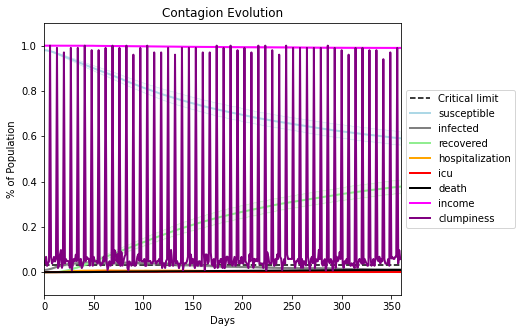

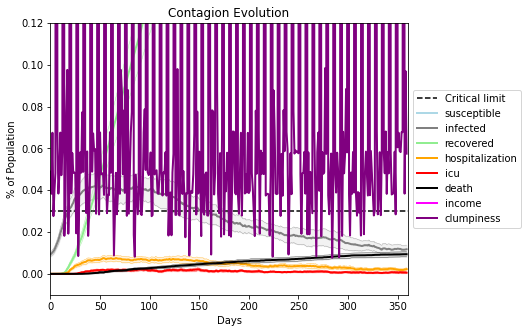

In [13]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 0
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])

Save these seeds if you want to rerun a scenario
[3956, 462, 1497, 2126, 9010, 1969, 7883, 1097, 4149, 1862, 2551, 9169, 3116, 9154, 2111, 6222, 2133, 2110, 7031, 3507, 4994, 7553, 709, 7941, 2461, 1320, 3475, 2139, 944, 4628]
Average similarity between family members is 0.6816078217491167 at temperature -0.9
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of 

avg restaurant similarity 0.23326229943726282
avg restaurant similarity 0.17911161452032537
avg restaurant similarity 0.23600403285675178
avg restaurant similarity 0.2340433039806985
avg restaurant similarity 0.31607025483942797
avg restaurant similarity 0.18571490671325422
avg restaurant similarity 0.08682746913046706
avg restaurant similarity 0.2053995004922036
avg restaurant similarity 0.22681927407304303
avg restaurant similarity 0.18226870030231362
avg restaurant similarity 0.17544165293085015
avg restaurant similarity 0.08460106944471145
avg restaurant similarity 0.28047906338952205
avg restaurant similarity 0.08904900575761099
avg restaurant similarity 0.2908363826193443
avg restaurant similarity 0.20774047255905967
avg restaurant similarity 0.40622231946159487
avg restaurant similarity 0.24260334041183243
avg restaurant similarity 0.20141034801790764
avg restaurant similarity 0.2584370397099854
avg restaurant similarity 0.2136196272223326
avg restaurant similarity 0.13354761255

avg restaurant similarity 0.036489343791350486
avg restaurant similarity 0.34418806658082557
avg restaurant similarity 0.2845241748992215
avg restaurant similarity 0.2811972028994981
avg restaurant similarity 0.3332602584867318
avg restaurant similarity 0.25198399930489007
avg restaurant similarity 0.2286068906465259
avg restaurant similarity 0.2790919472633215
avg restaurant similarity 0.00812826082817085
avg restaurant similarity 0.3390603842515313
avg restaurant similarity 0.16150413118204032
avg restaurant similarity 0.35289710187483525
avg restaurant similarity 0.22652727741805712
avg restaurant similarity 0.11127769646809454
avg restaurant similarity 0.3416748918078544
avg restaurant similarity 0.15139747167245274
avg restaurant similarity 0.29816324629129876
avg restaurant similarity 0.21465031284501235
avg restaurant similarity 0.12099002584455318
avg restaurant similarity 0.13867826218297497
avg restaurant similarity 0.3251252297651803
avg restaurant similarity 0.2230820777577

tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 76
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset o

avg restaurant similarity 0.10997689742424123
avg restaurant similarity 0.11116258761047759
avg restaurant similarity 0.05409617970579892
avg restaurant similarity 0.009722412799188975
avg restaurant similarity -0.03835604472386403
avg restaurant similarity -0.0004577804663732826
avg restaurant similarity 0.23583922893326795
avg restaurant similarity -0.0611508432531306
avg restaurant similarity 0.0961155629589382
avg restaurant similarity 0.024876586923372714
avg restaurant similarity 0.09187427730928065
avg restaurant similarity -0.07860918914639706
avg restaurant similarity 0.20279035516919475
avg restaurant similarity 0.0427024839101876
avg restaurant similarity 0.052287120179785054
avg restaurant similarity -0.03125203181105388
avg restaurant similarity 0.18338351557276525
avg restaurant similarity 0.1235920285478163
avg restaurant similarity 0.03821732407935163
avg restaurant similarity 0.27280385934760976
avg restaurant similarity 0.08954810096795317
avg restaurant similarity 0.

avg restaurant similarity 0.17797606251862647
avg restaurant similarity 0.10430334551253687
avg restaurant similarity 0.060019334552771954
avg restaurant similarity 0.1607768160551375
avg restaurant similarity -0.0014500404993385433
avg restaurant similarity 0.13514447688838285
avg restaurant similarity 0.23107219736359824
avg restaurant similarity 0.06337402762749329
avg restaurant similarity 0.10398259662046837
avg restaurant similarity 0.08105948480530284
avg restaurant similarity 0.022975924064074078
avg restaurant similarity 0.09825706535330292
avg restaurant similarity 0.11882239569435775
Average similarity between family members is 0.6811020446657509 at temperature -0.9
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21


tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
Average similarity between family and home is 0.9916542417292546 at temperature -1
Average similarity between students and their classroom is 0.41134945142754886 at temperature -0.9
Average similarity between workers is 0.3985018098139612 at temperature -0.9
Average fr

avg restaurant similarity 0.050216333167926556
avg restaurant similarity 0.1626313414732658
avg restaurant similarity 0.14602622995332315
avg restaurant similarity 0.043756290758436275
avg restaurant similarity 0.22539271069226835
avg restaurant similarity 0.07195616309365928
avg restaurant similarity 0.06167646112521652
avg restaurant similarity 0.15804378007047568
avg restaurant similarity 0.1839133911357871
avg restaurant similarity 0.14504893267532537
avg restaurant similarity 0.2332195004866032
avg restaurant similarity 0.1535922956654995
avg restaurant similarity 0.10015479862903391
avg restaurant similarity 0.05913573056336867
avg restaurant similarity 0.06889952664106003
avg restaurant similarity 0.08500405532295045
avg restaurant similarity 0.09410205867732672
avg restaurant similarity 0.1378708736834526
avg restaurant similarity 0.07357067016121956
avg restaurant similarity 0.05169897831186489
avg restaurant similarity 0.1598236350109454
avg restaurant similarity 0.1784642001

tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 83
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset o

avg restaurant similarity 0.20125993027674421
avg restaurant similarity 0.1531898224114947
avg restaurant similarity 0.2697257657608915
avg restaurant similarity 0.1758377648498319
avg restaurant similarity 0.1418799703513679
avg restaurant similarity 0.28157421411476774
avg restaurant similarity 0.08714888653736273
avg restaurant similarity 0.1512100672269125
avg restaurant similarity 0.06025680932541077
avg restaurant similarity 0.1306990198330224
avg restaurant similarity 0.13680196106598677
avg restaurant similarity 0.208747720285528
avg restaurant similarity 0.12245063927035142
avg restaurant similarity 0.15412043621016203
avg restaurant similarity 0.14386633684718142
avg restaurant similarity 0.15194966836915333
avg restaurant similarity 0.05632825179122706
avg restaurant similarity 0.15600915230530324
avg restaurant similarity 0.20375404703737
avg restaurant similarity 0.17557310476031834
avg restaurant similarity 0.16191403505620636
avg restaurant similarity 0.09017516146837452

avg restaurant similarity 0.2773062372888127
avg restaurant similarity 0.06578003249986152
avg restaurant similarity 0.1294352907291592
avg restaurant similarity 0.060908536810912656
avg restaurant similarity 0.2294940803090893
avg restaurant similarity 0.1969688006258084
avg restaurant similarity 0.20469487781799242
avg restaurant similarity 0.2862627644585293
avg restaurant similarity 0.20986213267104484
avg restaurant similarity 0.2236627625256065
avg restaurant similarity 0.11331980148696465
avg restaurant similarity 0.23344845019047314
avg restaurant similarity 0.24277472819326082
avg restaurant similarity 0.22285392422431805
avg restaurant similarity 0.2846406665537744
avg restaurant similarity 0.2008770945622492
avg restaurant similarity 0.26534845421648806
avg restaurant similarity 0.14186538881590255
avg restaurant similarity 0.14881146309971469
avg restaurant similarity 0.3161044152513947
avg restaurant similarity 0.2060112513315265
avg restaurant similarity 0.176551471934755

tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
Average similarity between family and home is 0.9917506800668574 at temperature -1
Average similarity between students and their classroom is 0.44771301502110034 at temperature -0.9
Average similarity between workers is 0.43353909099129523 at temperature -0.9
Average friend similarity for adults: 0.6976507555054435 for kids: 0.5766285214506423
run with seed 9010:
avg restaurant similarity 0.15922911681420124
avg restaurant similarity 0.23155569956556096
avg restaurant similarity 0.2178919594594369
avg restaurant similarity 0.14666417837426937
avg restaurant similarity 0.26947131314582984
avg restaurant simil

avg restaurant similarity 0.2778081758647857
avg restaurant similarity 0.3351468503416843
avg restaurant similarity 0.13878028906594567
avg restaurant similarity 0.12168925164730363
avg restaurant similarity 0.20378673043373752
avg restaurant similarity 0.09545880766023421
avg restaurant similarity 0.1483002870272212
avg restaurant similarity 0.19940783367132273
avg restaurant similarity 0.12728859173616408
avg restaurant similarity 0.15924527072991154
avg restaurant similarity 0.16190456271055495
avg restaurant similarity 0.1621390968549726
avg restaurant similarity 0.12242393294534434
avg restaurant similarity 0.20520604600653095
avg restaurant similarity 0.19944455085647753
avg restaurant similarity 0.30634143115620993
avg restaurant similarity 0.17257767200410384
avg restaurant similarity 0.17237613805188712
avg restaurant similarity 0.22804924840105764
avg restaurant similarity 0.18482804676191905
avg restaurant similarity 0.20096152818721028
avg restaurant similarity 0.2260495794

tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset o

avg restaurant similarity -0.005899954467586567
avg restaurant similarity 0.056562191149522885
avg restaurant similarity -0.028178511072644064
avg restaurant similarity -0.00643334793187429
avg restaurant similarity -0.06606616632032719
avg restaurant similarity 0.08649166222360917
avg restaurant similarity -0.0017083084504940925
avg restaurant similarity 0.04466117838469125
avg restaurant similarity -0.08500784991059672
avg restaurant similarity -0.042353435444508605
avg restaurant similarity 0.057833782751511555
avg restaurant similarity 0.12219615093891521
avg restaurant similarity 0.025609489692250888
avg restaurant similarity -0.032921097552737144
avg restaurant similarity -0.08808506713289113
avg restaurant similarity -0.1674343613553518
avg restaurant similarity -0.05153499572248636
avg restaurant similarity 0.04491770457632095
avg restaurant similarity -0.04319716073848184
avg restaurant similarity -0.06317017113259048
avg restaurant similarity 0.010293153385703085
avg restaura

avg restaurant similarity 0.026331881398903162
avg restaurant similarity -0.04172863238934532
avg restaurant similarity -0.018221405773605755
avg restaurant similarity -0.0026934861810894144
avg restaurant similarity -0.09661384028337694
avg restaurant similarity 0.0397558802442235
avg restaurant similarity -0.029408058118134146
avg restaurant similarity -0.147777944810205
avg restaurant similarity -0.017271709163188344
avg restaurant similarity -0.09648292235308599
avg restaurant similarity -0.09497531597572353
avg restaurant similarity 0.014268887576428428
avg restaurant similarity 0.048078484421881444
avg restaurant similarity 0.01251448523770878
avg restaurant similarity -0.09521500712749646
avg restaurant similarity -0.08768069429415179
avg restaurant similarity 0.020631819177464924
avg restaurant similarity -0.09435007683715017
avg restaurant similarity 0.01827876530299704
avg restaurant similarity -0.02885780375879538
avg restaurant similarity 0.014383111920339421
avg restaurant

tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset o

avg restaurant similarity 0.24103067241462928
avg restaurant similarity 0.2451196644622478
avg restaurant similarity 0.2324089114116437
avg restaurant similarity 0.3773723882703576
avg restaurant similarity 0.2475223879969534
avg restaurant similarity 0.08964745551652929
avg restaurant similarity 0.20672404115347712
avg restaurant similarity 0.26995790019507265
avg restaurant similarity 0.17264288928531965
avg restaurant similarity 0.3361865372679223
avg restaurant similarity 0.17443676093337257
avg restaurant similarity 0.38403212918125706
avg restaurant similarity 0.3277622047369099
avg restaurant similarity 0.3090420334194433
avg restaurant similarity 0.249787506736628
avg restaurant similarity 0.24365953128951817
avg restaurant similarity 0.4071567248890427
avg restaurant similarity 0.30388363837883386
avg restaurant similarity 0.2433059320635595
avg restaurant similarity 0.29564421219717657
avg restaurant similarity 0.2880079535403986
avg restaurant similarity 0.2824227617480917
a

avg restaurant similarity 0.2627927565724781
avg restaurant similarity 0.20238890539739976
avg restaurant similarity 0.24493119867397187
avg restaurant similarity 0.35638753448553795
avg restaurant similarity 0.35250976040199195
avg restaurant similarity 0.3516396243517131
Average similarity between family members is 0.682286537579496 at temperature -0.9
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in 

Average similarity between family and home is 0.9919010297186928 at temperature -1
Average similarity between students and their classroom is 0.48623753184315555 at temperature -0.9
Average similarity between workers is 0.40731195994014735 at temperature -0.9
Average friend similarity for adults: 0.6891452947398581 for kids: 0.5555934340355817
run with seed 1097:
avg restaurant similarity 0.23979852342010174
avg restaurant similarity 0.24978534851021156
avg restaurant similarity 0.23191961992252352
avg restaurant similarity 0.26368654498189326
avg restaurant similarity 0.32202906834137274
avg restaurant similarity 0.22635114291619038
avg restaurant similarity 0.1499715330262097
avg restaurant similarity 0.3076657626342109
avg restaurant similarity 0.16177206410131373
avg restaurant similarity 0.23848280995465795
avg restaurant similarity 0.2575259725385435
avg restaurant similarity 0.2478512920962042
avg restaurant similarity 0.15368976378058835
avg restaurant similarity 0.183980624005

avg restaurant similarity 0.13608956419577806
avg restaurant similarity 0.25971695930706695
avg restaurant similarity 0.2788604228889741
avg restaurant similarity 0.27514604222759637
avg restaurant similarity 0.388265135167144
avg restaurant similarity 0.2395569630609624
avg restaurant similarity 0.2087551964253279
avg restaurant similarity 0.2162062138300021
avg restaurant similarity 0.20900428655546782
avg restaurant similarity 0.17046906475558068
avg restaurant similarity 0.14756219029137643
avg restaurant similarity 0.15224350860388797
avg restaurant similarity 0.13041726611196536
avg restaurant similarity 0.1826774006079682
avg restaurant similarity 0.30619661459271236
avg restaurant similarity 0.2796754681143562
avg restaurant similarity 0.08528761900868559
avg restaurant similarity 0.2311721306550282
avg restaurant similarity 0.19808574104244595
avg restaurant similarity 0.17854133691008509
avg restaurant similarity 0.2037822464190055
avg restaurant similarity 0.3303874647319701

tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of 

avg restaurant similarity 0.15685920019649247
avg restaurant similarity 0.06944973861061354
avg restaurant similarity 0.1835790286225536
avg restaurant similarity 0.11105774424277727
avg restaurant similarity 0.1666657192438174
avg restaurant similarity 0.1744069321163785
avg restaurant similarity -0.0011234335763400957
avg restaurant similarity 0.3171633039319082
avg restaurant similarity 0.2020724145102141
avg restaurant similarity 0.26595368552038146
avg restaurant similarity 0.13890909916954539
avg restaurant similarity 0.3541168109678853
avg restaurant similarity -0.008588569546232015
avg restaurant similarity 0.36945821534166623
avg restaurant similarity 0.11711398784202229
avg restaurant similarity 0.33983884602905945
avg restaurant similarity 0.17100491972208337
avg restaurant similarity 0.20127136603178306
avg restaurant similarity 0.2845740474304082
avg restaurant similarity 0.133322797239453
avg restaurant similarity 0.29969858662386895
avg restaurant similarity -0.037681450

avg restaurant similarity 0.3594208338731446
avg restaurant similarity 0.009639119706933695
avg restaurant similarity -0.08884764095507246
avg restaurant similarity 0.20785787575678139
avg restaurant similarity 0.24599566664154318
avg restaurant similarity 0.11957395016748026
avg restaurant similarity 0.11945313105357729
avg restaurant similarity 0.22664161077764253
avg restaurant similarity 0.28208833817746637
avg restaurant similarity 0.11450233373275803
avg restaurant similarity 0.009456446350222867
avg restaurant similarity 0.249198081604443
avg restaurant similarity 0.19648811874681107
avg restaurant similarity 0.07595295425609254
avg restaurant similarity 0.18119611550419185
avg restaurant similarity 0.23198281644133606
avg restaurant similarity 0.14642670153790213
avg restaurant similarity 0.11495904174812652
avg restaurant similarity 0.22516643673550452
avg restaurant similarity 0.13943991785908755
avg restaurant similarity 0.251003628910201
avg restaurant similarity 0.13411389

Average similarity between family and home is 0.9921576464622865 at temperature -1
Average similarity between students and their classroom is 0.48295869332349994 at temperature -0.9
Average similarity between workers is 0.44292743675347535 at temperature -0.9
Average friend similarity for adults: 0.6929918483905583 for kids: 0.559871768335409
run with seed 1862:
avg restaurant similarity 0.21207747834283483
avg restaurant similarity 0.18167891691277593
avg restaurant similarity 0.17630368462950632
avg restaurant similarity 0.23002048276068102
avg restaurant similarity 0.26804451152882447
avg restaurant similarity 0.18609504590152415
avg restaurant similarity 0.19265783948093568
avg restaurant similarity 0.262732636031754
avg restaurant similarity 0.17035321090753913
avg restaurant similarity 0.2825997360125294
avg restaurant similarity 0.21555074153826226
avg restaurant similarity 0.07974513197966292
avg restaurant similarity 0.4758387686096334
avg restaurant similarity 0.2427648521920

avg restaurant similarity 0.12047950729009095
avg restaurant similarity 0.13671133327941967
avg restaurant similarity 0.05674123274730616
avg restaurant similarity 0.19970541547413204
avg restaurant similarity 0.1821802112823179
avg restaurant similarity 0.16824077844425664
avg restaurant similarity 0.14523498216623604
avg restaurant similarity 0.11484202364794073
avg restaurant similarity 0.24085637818010305
avg restaurant similarity 0.20669301825681197
avg restaurant similarity 0.1317882752610024
avg restaurant similarity 0.29913109324868503
avg restaurant similarity 0.15713270220197437
avg restaurant similarity 0.033558595921436604
avg restaurant similarity 0.2101490009176884
avg restaurant similarity 0.13657484398042025
avg restaurant similarity 0.13620728757096331
avg restaurant similarity 0.07156100294297582
avg restaurant similarity 0.2042807104159323
avg restaurant similarity 0.33097278294714244
avg restaurant similarity 0.3075848782139871
avg restaurant similarity 0.3165984918

tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset o

avg restaurant similarity -0.16153510775145463
avg restaurant similarity -0.15757171768916942
avg restaurant similarity -0.03276947886354337
avg restaurant similarity -0.08041277069027185
avg restaurant similarity -0.11053078151000321
avg restaurant similarity -0.0362021996686336
avg restaurant similarity -0.005829973194317134
avg restaurant similarity 0.11250040510798497
avg restaurant similarity -0.11136013969535169
avg restaurant similarity 0.12282485907606908
avg restaurant similarity 0.3282105280413719
avg restaurant similarity -0.017509375499390287
avg restaurant similarity -0.04568053316077021
avg restaurant similarity 0.3410653935095234
avg restaurant similarity -0.14140886008252979
avg restaurant similarity -0.22700494385700468
avg restaurant similarity -0.054360906490862254
avg restaurant similarity 0.10586377237934716
avg restaurant similarity 0.1469981275045474
avg restaurant similarity 0.2298164804462316
avg restaurant similarity -0.11130592143115811
avg restaurant similar

avg restaurant similarity 0.2561947260035283
avg restaurant similarity -0.010594033212035744
avg restaurant similarity 0.03624992180136668
avg restaurant similarity 0.23189559530837328
avg restaurant similarity -0.16753315906133745
avg restaurant similarity 0.21750251196482698
avg restaurant similarity -0.034985975934203425
avg restaurant similarity 0.04544706642845321
avg restaurant similarity -0.09041252014900716
avg restaurant similarity -0.04776890865656454
avg restaurant similarity -0.21610946024236463
avg restaurant similarity -0.1672449617282803
avg restaurant similarity -0.028412470790535098
avg restaurant similarity 0.25839513618289556
avg restaurant similarity 0.10788047466414878
avg restaurant similarity -0.1412328493710223
avg restaurant similarity 0.02458976363379904
avg restaurant similarity 0.013910380429638361
avg restaurant similarity -0.05135251072266114
avg restaurant similarity 0.2608199498728535
avg restaurant similarity 0.03581003639067405
avg restaurant similarit

tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset 

avg restaurant similarity 0.36606873909801546
avg restaurant similarity 0.1416089557544157
avg restaurant similarity 0.21970421517733604
avg restaurant similarity 0.30671825482521037
avg restaurant similarity 0.3430614730247361
avg restaurant similarity 0.2231940584213989
avg restaurant similarity 0.4305415984324466
avg restaurant similarity 0.3109059026174718
avg restaurant similarity 0.21670161616768757
avg restaurant similarity 0.2842983950998828
avg restaurant similarity 0.2096085498159127
avg restaurant similarity 0.23684945361155865
avg restaurant similarity 0.38415724180862126
avg restaurant similarity 0.3980099313600293
avg restaurant similarity 0.29543338222039334
avg restaurant similarity 0.39371661071855724
avg restaurant similarity 0.40137711608827986
avg restaurant similarity 0.2964005737737262
avg restaurant similarity 0.15328262967954498
avg restaurant similarity 0.33366299239764047
avg restaurant similarity 0.27781090576130213
avg restaurant similarity 0.204976224720299

tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset o

avg restaurant similarity 0.022658604113154065
avg restaurant similarity 0.025907275572492488
avg restaurant similarity 0.13492755737027634
avg restaurant similarity 0.030064362516833597
avg restaurant similarity 0.012717155100786465
avg restaurant similarity 0.024710785920859454
avg restaurant similarity 0.07081489647975715
avg restaurant similarity 0.09426780768509575
avg restaurant similarity -0.005408827908854652
avg restaurant similarity 0.2420449777967937
avg restaurant similarity 0.08443973801258661
avg restaurant similarity 0.041225201244998136
avg restaurant similarity 0.03668689859483416
avg restaurant similarity -0.0033862119906872914
avg restaurant similarity 0.06336611800985138
avg restaurant similarity 0.017360457611761564
avg restaurant similarity -0.07531346289052525
avg restaurant similarity 0.09914065224597936
avg restaurant similarity 0.06645478213263878
avg restaurant similarity 0.016724729912553454
avg restaurant similarity 0.018991851143297697
avg restaurant simil

avg restaurant similarity 0.08217934248926251
avg restaurant similarity 0.10218977806361963
avg restaurant similarity 0.05197284255031387
avg restaurant similarity 0.011040127434923573
avg restaurant similarity 0.09014800251000615
avg restaurant similarity -0.030251472496713203
avg restaurant similarity 0.13170924911008108
avg restaurant similarity 0.0953289433872821
avg restaurant similarity 0.011932197743892323
avg restaurant similarity -0.008616476078413586
avg restaurant similarity 0.14639818331803278
avg restaurant similarity 0.007776068914217424
avg restaurant similarity 0.0277747430729926
avg restaurant similarity 0.03738008712354391
avg restaurant similarity 0.1107547275325181
avg restaurant similarity 0.04782434700076175
avg restaurant similarity -0.029698238341591084
avg restaurant similarity 0.11043614955648544
avg restaurant similarity 0.1521199863264938
avg restaurant similarity -0.018657762187146265
avg restaurant similarity -0.022174977852483638
avg restaurant similarity

tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset 

avg restaurant similarity 0.020806072085037187
avg restaurant similarity 0.13944102377897602
avg restaurant similarity 0.13067063176024832
avg restaurant similarity 0.2859257374754359
avg restaurant similarity 0.24981354434345118
avg restaurant similarity 0.17555303303825487
avg restaurant similarity 0.2855460188237474
avg restaurant similarity 0.17870274839101938
avg restaurant similarity 0.21046852392047072
avg restaurant similarity 0.1282513577577731
avg restaurant similarity 0.21469295004067793
avg restaurant similarity 0.23401160267432716
avg restaurant similarity 0.048516816670927
avg restaurant similarity 0.37023544269949094
avg restaurant similarity 0.1340956659170861
avg restaurant similarity 0.11533309316069225
avg restaurant similarity 0.3948385315842522
avg restaurant similarity -0.025253370286380812
avg restaurant similarity -0.09813868190738236
avg restaurant similarity 0.027540206191651918
avg restaurant similarity 0.1358182208585008
avg restaurant similarity 0.164016923

avg restaurant similarity 0.17945136521205485
avg restaurant similarity 0.16733915621548287
avg restaurant similarity 0.1806444543711802
avg restaurant similarity 0.05350749415947731
avg restaurant similarity 0.09036086128829775
avg restaurant similarity 0.09192296070674577
avg restaurant similarity 0.13152020683393478
avg restaurant similarity 0.05975290262621133
avg restaurant similarity 0.18539546099917217
avg restaurant similarity 0.1661699222872637
avg restaurant similarity 0.23652994116625492
avg restaurant similarity 0.006073623549115373
avg restaurant similarity 0.2804594685728419
avg restaurant similarity 0.23687762073922672
avg restaurant similarity 0.1255268891413209
avg restaurant similarity 0.22976667589812566
avg restaurant similarity 0.14095471563016693
avg restaurant similarity 0.18839606543403484
avg restaurant similarity 0.0573477550554171
avg restaurant similarity 0.07985652834009054
avg restaurant similarity 0.0450072971698276
avg restaurant similarity 0.15196274250

tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset o

avg restaurant similarity 0.02632387523348806
avg restaurant similarity 0.05571540439080392
avg restaurant similarity 0.17430243759281192
avg restaurant similarity 0.12729484322532267
avg restaurant similarity 0.21893871653261887
avg restaurant similarity 0.02800030104244547
avg restaurant similarity 0.03016886145907649
avg restaurant similarity 0.15142161661759862
avg restaurant similarity 0.14078357801402025
avg restaurant similarity 0.22254811592803497
avg restaurant similarity 0.11093444547700096
avg restaurant similarity 0.07052795349768974
avg restaurant similarity 0.24227494655092593
avg restaurant similarity 0.2900954587766801
avg restaurant similarity 0.14238308402457092
avg restaurant similarity 0.10022359031859675
avg restaurant similarity 0.1053475696756643
avg restaurant similarity 0.053697273975663935
avg restaurant similarity 0.0973198480883128
avg restaurant similarity 0.20220928069146488
avg restaurant similarity 0.09453612763772243
avg restaurant similarity 0.09237377

avg restaurant similarity 0.1699897073702442
avg restaurant similarity 0.07863126713213231
avg restaurant similarity 0.1579774226336972
avg restaurant similarity 0.12341078132544471
avg restaurant similarity 0.11904527156033405
avg restaurant similarity 0.08106916220689209
avg restaurant similarity 0.09493404044846797
avg restaurant similarity 0.10716287524539406
avg restaurant similarity 0.16281777148477292
avg restaurant similarity 0.08325282906516333
avg restaurant similarity 0.06484598991791582
avg restaurant similarity 0.1825565485646553
avg restaurant similarity 0.16892229902256586
avg restaurant similarity 0.10425101908927359
avg restaurant similarity 0.06152672086753285
avg restaurant similarity 0.11489237230093988
avg restaurant similarity 0.2405707045216439
avg restaurant similarity 0.18264620456363898
avg restaurant similarity 0.26701030441992357
avg restaurant similarity 0.10382523005486326
avg restaurant similarity 0.3181566874607697
avg restaurant similarity 0.11323294934

tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
Average similarity between family and home is 0.9922480783064984 at temperature -1
Average similarity between students and their classroom is 0.39278814198569406 at temperature -0.9
Average similarity between workers is 0.43057560241983917 at temperature -0.9
Average friend similarity for adults: 0.6827108296238176 for kids: 0.5399727314600222
run with seed 6222:
avg restaurant similarity 0.11284305338877516
avg restaurant similarity 0.3411289870090368
avg restaurant similarity 0.19730049327255164
avg restaurant similarity 0.246278633246468
avg restaurant similarity 0.1806251279636628
avg restaurant similarity 0.17930494596074242
avg restaurant similarity 0.17960723861426278
avg restaurant similarity 0.2534229595473676
avg restaurant similarity 0.27133812616648456
avg restaurant similarity 0.15721176106430163
avg restaurant similarity 0.2011469734360561
avg restaurant similarity 0.23185081454524992
avg restaurant sim

avg restaurant similarity 0.18513156439398412
avg restaurant similarity 0.2941544591639264
avg restaurant similarity 0.2637146632252735
avg restaurant similarity 0.1189519979098647
avg restaurant similarity 0.17293919778894093
avg restaurant similarity 0.19604321904253738
avg restaurant similarity 0.19672569961092715
avg restaurant similarity 0.2072762422495901
avg restaurant similarity 0.20436647148634468
avg restaurant similarity 0.2525367906222977
avg restaurant similarity 0.26550806451067743
avg restaurant similarity 0.26896521398111933
avg restaurant similarity 0.18120323653048281
avg restaurant similarity 0.19618504928312192
avg restaurant similarity 0.3294339821202641
avg restaurant similarity 0.3307776392411353
avg restaurant similarity 0.10381687234724499
avg restaurant similarity 0.19090743094015192
avg restaurant similarity 0.19532024983630092
avg restaurant similarity 0.19612053124881104
avg restaurant similarity 0.26762910408914775
avg restaurant similarity 0.2384971514247

tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 80
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset 

avg restaurant similarity 0.20365020405805284
avg restaurant similarity 0.09801616279240488
avg restaurant similarity 0.08205903006858387
avg restaurant similarity 0.18400887342450423
avg restaurant similarity 0.15272953682528453
avg restaurant similarity 0.11933890423172887
avg restaurant similarity 0.17090526497685662
avg restaurant similarity 0.21087214301888782
avg restaurant similarity 0.2079707396414117
avg restaurant similarity 0.12091943452531645
avg restaurant similarity 0.09993294382496624
avg restaurant similarity 0.13407741317993332
avg restaurant similarity 0.17478267290414057
avg restaurant similarity 0.23716771169492618
avg restaurant similarity 0.22531740498109523
avg restaurant similarity 0.16683605393124154
avg restaurant similarity 0.17817066161959552
avg restaurant similarity 0.15358008066304885
avg restaurant similarity 0.15291133163141613
avg restaurant similarity 0.1815890113657177
avg restaurant similarity 0.10367057407338447
avg restaurant similarity 0.15943112

avg restaurant similarity 0.16752366754397988
avg restaurant similarity 0.16700640661703703
avg restaurant similarity 0.2143975788079179
avg restaurant similarity 0.13224986688213963
avg restaurant similarity 0.1800855949337524
avg restaurant similarity 0.16510153713111078
avg restaurant similarity 0.18271523482911553
avg restaurant similarity 0.18819209133453926
avg restaurant similarity 0.14457373040937174
avg restaurant similarity 0.1704995772444162
avg restaurant similarity 0.14359852863630623
avg restaurant similarity 0.15709302076054335
avg restaurant similarity 0.13167062391553672
avg restaurant similarity 0.0857457641236116
avg restaurant similarity 0.17615152488210925
avg restaurant similarity 0.2171349662710734
avg restaurant similarity 0.0925796538390101
avg restaurant similarity 0.16766554936801306
avg restaurant similarity 0.1652050916005929
avg restaurant similarity 0.19307408891350555
avg restaurant similarity 0.16716327240480816
avg restaurant similarity 0.1620059294572

tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of

avg restaurant similarity 0.19627925358734175
avg restaurant similarity 0.14498445575605934
avg restaurant similarity 0.15466927163381153
avg restaurant similarity 0.21852199298049488
avg restaurant similarity 0.11245147103582347
avg restaurant similarity 0.16060697597331539
avg restaurant similarity 0.11107709877470255
avg restaurant similarity 0.11713749576089526
avg restaurant similarity 0.16386393025968457
avg restaurant similarity 0.15689260121487075
avg restaurant similarity 0.03688753503609845
avg restaurant similarity 0.06596609187973368
avg restaurant similarity 0.18484312646217704
avg restaurant similarity 0.11570663126527744
avg restaurant similarity 0.21708338039824618
avg restaurant similarity 0.0735296479954713
avg restaurant similarity 0.08292617147309636
avg restaurant similarity 0.10003977618559809
avg restaurant similarity 0.19182107682308047
avg restaurant similarity 0.16303423953697802
avg restaurant similarity 0.012102396033743202
avg restaurant similarity 0.117794

avg restaurant similarity 0.19960416341536338
avg restaurant similarity 0.06260891943300508
avg restaurant similarity 0.21770775821892577
avg restaurant similarity 0.1581041107395291
avg restaurant similarity 0.13619541791333517
avg restaurant similarity 0.10076592989928396
avg restaurant similarity 0.1592172187584008
avg restaurant similarity 0.15297993154108938
avg restaurant similarity 0.09526061653647509
avg restaurant similarity 0.08614524250918504
avg restaurant similarity 0.202442064377317
avg restaurant similarity 0.11631665004748726
avg restaurant similarity 0.17249082227084728
avg restaurant similarity 0.08244883278264856
avg restaurant similarity 0.3683494417426629
avg restaurant similarity 0.21252949115399827
avg restaurant similarity 0.10437381899547156
avg restaurant similarity 0.14145172647381107
avg restaurant similarity 0.00870250458877206
avg restaurant similarity -0.029154461061478256
avg restaurant similarity 0.05531052039318426
avg restaurant similarity 0.074813675

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
Average similarity between family and home is 0.9927129245431392 at temperature -1
Average similarity between students and their classroom is 0.4848899248097881 at temperature -0.9
Average similarity between workers is 0.4993829347946571 at temperature -0.9
Average friend similarity for adults: 0.7274020809424233 for kids: 0.63910000145

avg restaurant similarity 0.06633116830570344
avg restaurant similarity 0.08621712639162815
avg restaurant similarity -0.024609244163889488
avg restaurant similarity 0.1685328773173582
avg restaurant similarity 0.14887291053229396
avg restaurant similarity 0.12731131992322725
avg restaurant similarity 0.10199483803142906
avg restaurant similarity 0.13797731904588062
avg restaurant similarity 0.2030780571914877
avg restaurant similarity 0.12399117631813633
avg restaurant similarity -0.07132290519030765
avg restaurant similarity 0.2464267342688001
avg restaurant similarity 0.10751055258469333
avg restaurant similarity 0.06108757493204183
avg restaurant similarity 0.13316582984870867
avg restaurant similarity 0.08461831315540844
avg restaurant similarity -0.00938638380113919
avg restaurant similarity 0.23374422939140835
avg restaurant similarity 0.296789302546645
avg restaurant similarity 0.09670273880700128
avg restaurant similarity 0.11695949360556178
avg restaurant similarity 0.0167581

tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of

avg restaurant similarity 0.16828003277615142
avg restaurant similarity 0.0854381776083364
avg restaurant similarity 0.2857027528296664
avg restaurant similarity 0.23338277979045596
avg restaurant similarity 0.19703886462399087
avg restaurant similarity 0.06910244297201246
avg restaurant similarity 0.15360921854748225
avg restaurant similarity 0.14157537653858754
avg restaurant similarity 0.16757393851764896
avg restaurant similarity 0.1462658627338634
avg restaurant similarity 0.16785491724519977
avg restaurant similarity 0.1485934863238984
avg restaurant similarity 0.2435268934994414
avg restaurant similarity 0.1418109661892367
avg restaurant similarity 0.1458052414279379
avg restaurant similarity -0.027948936271853617
avg restaurant similarity 0.22953769223021742
avg restaurant similarity 0.09808046761286757
avg restaurant similarity 0.23826620195486922
avg restaurant similarity 0.24515570039073445
avg restaurant similarity 0.3638609405048022
avg restaurant similarity 0.299285317262

avg restaurant similarity 0.04873550022571009
avg restaurant similarity 0.14429843055448305
avg restaurant similarity 0.19430668586380198
avg restaurant similarity 0.3128389188425298
avg restaurant similarity 0.16098903504016837
avg restaurant similarity 0.2986604483151845
avg restaurant similarity 0.1926183350427874
avg restaurant similarity 0.30527938598540333
avg restaurant similarity 0.29313708892811224
avg restaurant similarity 0.1458329055189188
avg restaurant similarity 0.13760228269306668
avg restaurant similarity 0.16865251322249855
avg restaurant similarity 0.15854018961368455
avg restaurant similarity 0.21463914398394818
avg restaurant similarity 0.3284377673536376
avg restaurant similarity 0.2321197175099481
avg restaurant similarity 0.32160264107778147
avg restaurant similarity 0.21820211076860843
avg restaurant similarity 0.12197964057356436
avg restaurant similarity 0.1674470377250182
avg restaurant similarity -0.01117844814888365
avg restaurant similarity 0.171314455013

tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset o

avg restaurant similarity 0.3201922659077758
avg restaurant similarity 0.30168675398427336
avg restaurant similarity 0.31782928570402647
avg restaurant similarity 0.2426460021719445
avg restaurant similarity 0.1638925275860877
avg restaurant similarity 0.2007147522635869
avg restaurant similarity 0.23546120829426676
avg restaurant similarity 0.31725663667841764
avg restaurant similarity 0.18735244274987695
avg restaurant similarity 0.28028136830896405
avg restaurant similarity 0.2428156671496713
avg restaurant similarity 0.29773950746559946
avg restaurant similarity 0.23833224741895262
avg restaurant similarity 0.17424706311756097
avg restaurant similarity 0.22088161274151474
avg restaurant similarity 0.12757482098530099
avg restaurant similarity 0.22959764120377943
avg restaurant similarity 0.24441017401276138
avg restaurant similarity 0.15196474100525972
avg restaurant similarity 0.15600173278780624
avg restaurant similarity 0.29108748579094085
avg restaurant similarity 0.21709469294

avg restaurant similarity 0.1524047369550784
avg restaurant similarity 0.28108783239850277
avg restaurant similarity 0.31134157613704894
avg restaurant similarity 0.21889223940570948
avg restaurant similarity 0.12931228455930302
avg restaurant similarity 0.09226494889784663
avg restaurant similarity 0.20289204980893877
avg restaurant similarity 0.28193862487381094
avg restaurant similarity 0.2262770354945236
avg restaurant similarity 0.17366450597320074
avg restaurant similarity 0.31067362994941694
avg restaurant similarity 0.20940694185132142
avg restaurant similarity 0.20498956509406893
avg restaurant similarity 0.3126948664991923
avg restaurant similarity 0.25566091493527227
avg restaurant similarity 0.244939196047314
avg restaurant similarity 0.25914805085463205
avg restaurant similarity 0.16583314714908712
avg restaurant similarity 0.21776885833554394
avg restaurant similarity 0.19202339135373725
avg restaurant similarity 0.19429880721162038
avg restaurant similarity 0.14606878285

Average similarity between students and their classroom is 0.378595148390623 at temperature -0.9
Average similarity between workers is 0.4248081712575514 at temperature -0.9
Average friend similarity for adults: 0.6713698769026692 for kids: 0.5514171266362109
run with seed 7553:
avg restaurant similarity 0.19910989721403577
avg restaurant similarity 0.0658087095868025
avg restaurant similarity 0.09673062972084692
avg restaurant similarity 0.19017948408283702
avg restaurant similarity 0.1381455585168492
avg restaurant similarity 0.0909404277342555
avg restaurant similarity 0.08667988738260092
avg restaurant similarity 0.07850869785330364
avg restaurant similarity 0.09081078878086786
avg restaurant similarity 0.160345453454561
avg restaurant similarity 0.1521249301108914
avg restaurant similarity 0.12118875194487468
avg restaurant similarity -0.010673178918684037
avg restaurant similarity 0.025246781347526958
avg restaurant similarity 0.1981072618911811
avg restaurant similarity 0.062532

avg restaurant similarity 0.20469735616267845
avg restaurant similarity 0.017266311585860623
avg restaurant similarity -0.010960044207054088
avg restaurant similarity 0.12285879113689424
avg restaurant similarity 0.04275163818070815
avg restaurant similarity 0.20407497795950832
avg restaurant similarity 0.013190462215336238
avg restaurant similarity -0.0011369809632224524
avg restaurant similarity 0.12264216294633357
avg restaurant similarity 0.22013254477803548
avg restaurant similarity 0.11801443789917132
avg restaurant similarity 0.16337588876208647
avg restaurant similarity 0.12646019741572292
avg restaurant similarity 0.12853241162425433
avg restaurant similarity 0.13838383484931002
avg restaurant similarity 0.03842902671258204
avg restaurant similarity 0.0581017197108471
avg restaurant similarity 0.16855662158926674
avg restaurant similarity 0.12513277876336673
avg restaurant similarity 0.028050703851054574
avg restaurant similarity 0.12899609669649667
avg restaurant similarity 0

tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of 

avg restaurant similarity 0.11006333365724641
avg restaurant similarity 0.18252523290378656
avg restaurant similarity 0.12660785904784225
avg restaurant similarity 0.13218454538100385
avg restaurant similarity 0.28124927899217067
avg restaurant similarity 0.21481787306054986
avg restaurant similarity 0.15440169966361228
avg restaurant similarity 0.025607244297360235
avg restaurant similarity 0.08962391838235265
avg restaurant similarity 0.1891698762480441
avg restaurant similarity 0.1948633527852696
avg restaurant similarity 0.17821303629092186
avg restaurant similarity 0.16017122272221743
avg restaurant similarity 0.0666185556289724
avg restaurant similarity 0.14835157601664786
avg restaurant similarity 0.19104331642662867
avg restaurant similarity 0.153837501250469
avg restaurant similarity 0.13235101302290433
avg restaurant similarity 0.13957723011744877
avg restaurant similarity 0.1623682368978932
avg restaurant similarity 0.19545188857252035
avg restaurant similarity 0.25754476990

avg restaurant similarity 0.35860709656574324
avg restaurant similarity 0.16001167942187755
avg restaurant similarity 0.21924145959156927
avg restaurant similarity 0.12495040389931077
avg restaurant similarity 0.14398529747899383
avg restaurant similarity 0.11706230621557556
avg restaurant similarity 0.20640709946915847
avg restaurant similarity 0.2542707810641772
avg restaurant similarity 0.210402091923234
avg restaurant similarity 0.1702686175063256
avg restaurant similarity 0.11463886195249277
avg restaurant similarity 0.19121470830159423
avg restaurant similarity 0.14838075620155725
avg restaurant similarity 0.08024172319495781
avg restaurant similarity 0.24541888554413077
avg restaurant similarity 0.25782811180520254
avg restaurant similarity -0.018735417141706994
avg restaurant similarity 0.1976614738321467
avg restaurant similarity 0.06646528725950068
avg restaurant similarity 0.22619319670980872
avg restaurant similarity 0.10775845329638663
avg restaurant similarity 0.152538818

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of

avg restaurant similarity 0.17966577168461859
avg restaurant similarity 0.10202218573593266
avg restaurant similarity 0.1443975445014408
avg restaurant similarity 0.27935427881821323
avg restaurant similarity 0.2783015223595887
avg restaurant similarity 0.12158752054212564
avg restaurant similarity 0.06854095599790269
avg restaurant similarity 0.1893411773752398
avg restaurant similarity 0.34138830318786517
avg restaurant similarity 0.21604940438963915
avg restaurant similarity 0.25917189786883443
avg restaurant similarity 0.14352745595088465
avg restaurant similarity 0.22634119658440827
avg restaurant similarity 0.15940870059934675
avg restaurant similarity 0.19524062124332534
avg restaurant similarity 0.1669910114285213
avg restaurant similarity 0.25916869743437104
avg restaurant similarity 0.21665818252349078
avg restaurant similarity 0.14949988424740515
avg restaurant similarity 0.1955268155953005
avg restaurant similarity 0.22793946574136464
avg restaurant similarity 0.38039434664

avg restaurant similarity 0.2144116150787049
avg restaurant similarity 0.143710068256976
avg restaurant similarity 0.19296113388427766
avg restaurant similarity -0.019725379095637794
avg restaurant similarity 0.2517805885431871
avg restaurant similarity 0.25485029743610993
avg restaurant similarity 0.19055618305652972
avg restaurant similarity 0.14159346121038127
avg restaurant similarity 0.08522014877914126
avg restaurant similarity 0.27279543742256135
avg restaurant similarity 0.22914849253917202
avg restaurant similarity 0.22040160902023864
avg restaurant similarity 0.16375105148127161
avg restaurant similarity 0.09057474625049917
Average similarity between family members is 0.6844293096448493 at temperature -0.9
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of siz

tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 39
Average similarity between family and home is 0.9931395602518558 at temperature -1
Average similarity between students and their classroom is 0.47279148149903116 at temperature -0.9
Average similarity between workers is 0.4888688325506099 at temperature -0.9
Average friend similarity for adults: 0.7044702234316192 for kids: 0.5727051526606279
run with seed 2461:
avg restaurant similarity -0.057287329260720284
avg restaurant similarity -0.05153027789424161
avg restaurant similarity 0.18068825826928595
avg re

avg restaurant similarity 0.1866191145773825
avg restaurant similarity 0.1493061504545507
avg restaurant similarity 0.20870902404180297
avg restaurant similarity 0.1145415978041589
avg restaurant similarity 0.20172878974384628
avg restaurant similarity 0.14921206626930683
avg restaurant similarity 0.23172975727828904
avg restaurant similarity -0.025634703617744937
avg restaurant similarity 0.13525332855985497
avg restaurant similarity 0.12350081717422803
avg restaurant similarity 0.08684747026470419
avg restaurant similarity 0.31988981691802254
avg restaurant similarity 0.09215517716681239
avg restaurant similarity 0.2050239534185323
avg restaurant similarity 0.3037976426049199
avg restaurant similarity 0.18595657181813655
avg restaurant similarity 0.16215844289641226
avg restaurant similarity 0.13864195461665255
avg restaurant similarity 0.007009669956177363
avg restaurant similarity 0.14457367066983995
avg restaurant similarity 0.2332793411900839
avg restaurant similarity 0.170121435

tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset o

avg restaurant similarity 0.21420847628190584
avg restaurant similarity 0.1625246204649949
avg restaurant similarity 0.2745744305105688
avg restaurant similarity 0.07385825997530482
avg restaurant similarity 0.30681264561291416
avg restaurant similarity 0.2166092331744254
avg restaurant similarity 0.30411834217181777
avg restaurant similarity 0.31310310237308364
avg restaurant similarity 0.13936901546772176
avg restaurant similarity 0.29356832227372875
avg restaurant similarity 0.32335946265334664
avg restaurant similarity 0.4377255217238783
avg restaurant similarity 0.2618991489352714
avg restaurant similarity 0.11844233262237164
avg restaurant similarity 0.2150438457334002
avg restaurant similarity 0.2897511873168103
avg restaurant similarity 0.19356826531427365
avg restaurant similarity 0.2728306082955061
avg restaurant similarity 0.18343317099869322
avg restaurant similarity 0.2528502092489259
avg restaurant similarity 0.32820312332674817
avg restaurant similarity 0.295821923926115

avg restaurant similarity 0.2345877520111306
avg restaurant similarity 0.27837906219678904
avg restaurant similarity 0.21427529274136528
avg restaurant similarity 0.1437497971780006
avg restaurant similarity 0.40917939222302246
avg restaurant similarity 0.3251836808668412
avg restaurant similarity 0.2513757143160268
avg restaurant similarity 0.20079659483477516
avg restaurant similarity 0.15632006482744507
avg restaurant similarity 0.2767171343289555
avg restaurant similarity 0.22215280639853693
avg restaurant similarity 0.13977184088216452
avg restaurant similarity 0.19805684855526048
avg restaurant similarity 0.13010576893096862
avg restaurant similarity 0.2392396847949978
avg restaurant similarity 0.17818093090668746
avg restaurant similarity 0.15568098224933433
avg restaurant similarity 0.2287676635441994
avg restaurant similarity 0.17477256896593302
avg restaurant similarity 0.36551943882557186
avg restaurant similarity 0.3003294677834093
avg restaurant similarity 0.33473626665815

tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of

avg restaurant similarity 0.13719000288570296
avg restaurant similarity 0.23677709850211678
avg restaurant similarity 0.17259108297566764
avg restaurant similarity 0.23354948457709154
avg restaurant similarity 0.29194836643669064
avg restaurant similarity 0.2822237422002159
avg restaurant similarity 0.2347979099619884
avg restaurant similarity 0.16234901043416197
avg restaurant similarity 0.22310990374924705
avg restaurant similarity 0.27530694002725764
avg restaurant similarity 0.2606134394955837
avg restaurant similarity 0.2647517460337918
avg restaurant similarity 0.2222639222521449
avg restaurant similarity 0.2230382509548345
avg restaurant similarity 0.21962947515150422
avg restaurant similarity 0.2503159690950103
avg restaurant similarity 0.23639787150989666
avg restaurant similarity 0.2721375611023272
avg restaurant similarity 0.2446143696568017
avg restaurant similarity 0.1694890162319843
avg restaurant similarity 0.2017932963829095
avg restaurant similarity 0.3004734901576221


avg restaurant similarity 0.2793788557024584
avg restaurant similarity 0.27851853677514377
avg restaurant similarity 0.3075697862690535
avg restaurant similarity 0.18480309486071086
avg restaurant similarity 0.211200894276035
avg restaurant similarity 0.22198099545547365
avg restaurant similarity 0.2155992332020345
avg restaurant similarity 0.26882956274675096
avg restaurant similarity 0.11614366510804787
avg restaurant similarity 0.13783944160580486
avg restaurant similarity 0.2688829623000156
avg restaurant similarity 0.24844596756452958
avg restaurant similarity 0.17515500078997104
avg restaurant similarity 0.18288587710254092
avg restaurant similarity 0.20319933286634204
avg restaurant similarity 0.23435865069691114
avg restaurant similarity 0.2660990549251126
avg restaurant similarity 0.21420857086083508
avg restaurant similarity 0.2768813525616248
avg restaurant similarity 0.2677157872009935
Average similarity between family members is 0.6636082477566052 at temperature -0.9
tup_v

Average similarity between family and home is 0.9910311924825523 at temperature -1
Average similarity between students and their classroom is 0.3516523424247758 at temperature -0.9
Average similarity between workers is 0.43482754134947976 at temperature -0.9
Average friend similarity for adults: 0.6662380916509918 for kids: 0.5196469248829791
run with seed 2139:
avg restaurant similarity 0.06840876010226264
avg restaurant similarity 0.03877774234670037
avg restaurant similarity 0.1329588878792497
avg restaurant similarity 0.18917450532798918
avg restaurant similarity 0.11159844847383314
avg restaurant similarity 0.12059988390713776
avg restaurant similarity -0.005233118461772415
avg restaurant similarity 0.17516033673609832
avg restaurant similarity -0.015418203103461727
avg restaurant similarity -0.06283106612572113
avg restaurant similarity 0.14660539242614537
avg restaurant similarity 0.054447312315786006
avg restaurant similarity 0.10722998651413912
avg restaurant similarity -0.096

avg restaurant similarity -0.045472042580280404
avg restaurant similarity 0.09339739880908086
avg restaurant similarity 0.07459840292320867
avg restaurant similarity 0.07473562257954194
avg restaurant similarity 0.15177089946984607
avg restaurant similarity 0.06266199244023139
avg restaurant similarity 0.062379935620674135
avg restaurant similarity 0.24635465814357885
avg restaurant similarity 0.11132298479415635
avg restaurant similarity 0.14463124999006638
avg restaurant similarity 0.15396099560530171
avg restaurant similarity -0.017271516393773452
avg restaurant similarity 0.1744250466137695
avg restaurant similarity -0.12082787912315507
avg restaurant similarity 0.11015841807168542
avg restaurant similarity 0.13649476708589564
avg restaurant similarity -0.04032709628350343
avg restaurant similarity 0.1969354179100948
avg restaurant similarity 0.01655188444860696
avg restaurant similarity 0.14961663682000842
avg restaurant similarity 0.1592750958094571
avg restaurant similarity 0.15

tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset o

avg restaurant similarity 0.21101605598923362
avg restaurant similarity 0.1513396628077202
avg restaurant similarity 0.09118661752782645
avg restaurant similarity 0.15071667184801693
avg restaurant similarity 0.15946797819272676
avg restaurant similarity -0.010385683522667178
avg restaurant similarity 0.002119431466264172
avg restaurant similarity 0.15251350980666145
avg restaurant similarity 0.356749006287706
avg restaurant similarity 0.22919646899949506
avg restaurant similarity 0.2638836495031646
avg restaurant similarity 0.23148219390031113
avg restaurant similarity 0.242722045733457
avg restaurant similarity 0.09346367265526904
avg restaurant similarity 0.20528763271257747
avg restaurant similarity 0.04967797332597153
avg restaurant similarity 0.18212509177496838
avg restaurant similarity 0.14929935431254876
avg restaurant similarity 0.07717619819806375
avg restaurant similarity 0.2072970537097372
avg restaurant similarity 0.18253799464300272
avg restaurant similarity 0.0450116013

avg restaurant similarity 0.11484631218056256
avg restaurant similarity 0.009169088153965374
avg restaurant similarity 0.17757220926368056
avg restaurant similarity 0.1989572043590058
avg restaurant similarity 0.08437143016132792
avg restaurant similarity 0.23611614441643913
avg restaurant similarity 0.09661032338088443
avg restaurant similarity 0.13733705040390104
avg restaurant similarity 0.156136658963227
avg restaurant similarity 0.0994655790378624
avg restaurant similarity 0.23321710361297038
avg restaurant similarity 0.16380876334108851
avg restaurant similarity 0.20851723582962556
avg restaurant similarity 0.09498689987398812
avg restaurant similarity 0.14274697431813008
avg restaurant similarity 0.13029904263436445
avg restaurant similarity 0.14777684318871365
avg restaurant similarity 0.22734216780509783
avg restaurant similarity 0.1308071635849934
avg restaurant similarity 0.25534392973065184
avg restaurant similarity 0.18753452084666142
avg restaurant similarity 0.1440050180

tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset 

avg restaurant similarity 0.20479196016517992
avg restaurant similarity 0.09797862573718089
avg restaurant similarity 0.2673689937195816
avg restaurant similarity 0.17598360755731124
avg restaurant similarity 0.2516661572350257
avg restaurant similarity 0.19549961600938046
avg restaurant similarity 0.20569808612811347
avg restaurant similarity 0.09287911266924392
avg restaurant similarity 0.05892277676415688
avg restaurant similarity 0.18500918256156748
avg restaurant similarity 0.20225615680600106
avg restaurant similarity 0.2226920834281423
avg restaurant similarity 0.19248029609287445
avg restaurant similarity 0.14814480785300213
avg restaurant similarity 0.2851709127566954
avg restaurant similarity 0.18438020998711777
avg restaurant similarity 0.06441838701534261
avg restaurant similarity 0.1921128065595933
avg restaurant similarity 0.13113722863349092
avg restaurant similarity 0.1550342286650086
avg restaurant similarity 0.1535727370184865
avg restaurant similarity 0.1042461048328

avg restaurant similarity 0.22501638217954573
avg restaurant similarity 0.1230299859804207
avg restaurant similarity 0.15371980633141022
avg restaurant similarity 0.12476014493255887
avg restaurant similarity 0.2634643167447894
avg restaurant similarity 0.22893242387516438
avg restaurant similarity 0.22736459571566278
avg restaurant similarity 0.12662841987933382
avg restaurant similarity 0.22533549133596975
avg restaurant similarity 0.044063379005342414
avg restaurant similarity 0.2554181219999006
avg restaurant similarity 0.19160338899471724
avg restaurant similarity 0.2187302607433643
avg restaurant similarity 0.10741847580131526
avg restaurant similarity 0.2192273392959146
avg restaurant similarity 0.280531363420702
avg restaurant similarity 0.13275564527049383
avg restaurant similarity 0.25258260933912896
using average of time series:
stats on susceptible:
data: [0.5061188811188811, 0.5269916666666666, 0.6811638888888889, 0.6569388888888889, 0.5683027777777778, 0.6771444444444444,

(<function dict.items>, <function dict.items>, <function dict.items>)

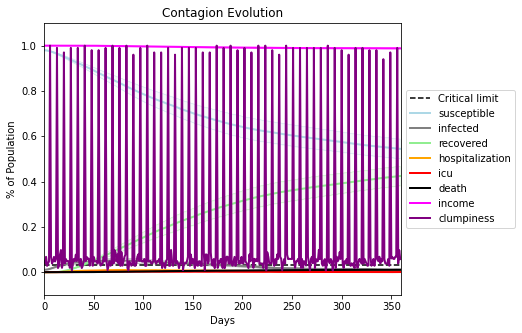

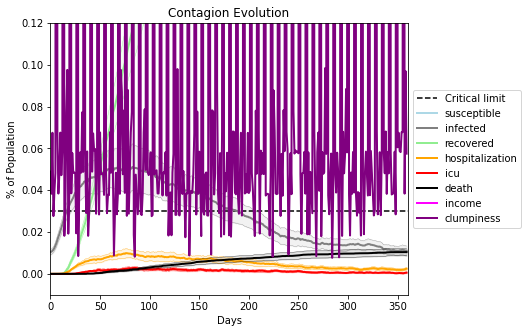

In [14]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]])